In [1]:
import pickle
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns

# Content

In [2]:
tt_datadir = "./tiktok-opinion-dynamics/src/tiktok_opinion_dynamics/data/search/creators/"
yt_datadir = "./youtube/data/"

In [3]:
dictionary_channelid = {"unclimatechange": "UCuLEr-GWiwCBB6zBDX3elOQ",
                        #"natgeo": "UCpVm7bg6pXKo1Pr6k5kxG9A",
                        #"nbcnews": "UCeY0bbntWzzVIaj2z3QigXg",
                        "bbcnews": "UC16niRr50-MSBwiO3YDb3RA",
                        "climateadam": "UCCu5wtZ5uOWZp_roz7wHPfg",
                        "drgilbz": "UCjaBxCyjLpIRyKOd8uw_S4w",
                        "dwplaneta": "UCb72Gn5LXaLEcsOuPKGfQOg",
                        "extinctionrebellionxr": "UCYThdLKE6TDwBJh-qDC6ICA",
                        "greenpeace_international": "UCTDTSx8kbxGECZJxOa9mIKA",
                        "guardian": "UCHpw8xwDNhU9gdohEcJu4aA",
                        "ourchangingclimate": "UCNXvxXpDJXp-mZu3pFMzYHQ",
                        "ted": "UCAuUUnT6oDeKwE6v1NGQxug"} 

dictionary_channelid_2 = {"juststopoil": "UC-t4U1Azf8AOkCBJILSNBmw",
                        "minuteearth": "UCeiYXex_fwgYDonaTcSIk6w",
                        "metoffices": "UC40Tw2tFuMzK305mi7nj8rg",
                        "zahrabiabani": "UCuRimTRSnyVlSrN4aQVCCkA",   
                        #"declareemergency": "UCi2pVvNv5s_Nh4KipoGQXxQ",
                        #"thereviveseries": "UCvpfvQqheuQRZiVjiSh71sw",
                        #"climatt": "UCoSRNBi6F4jN0CYq-sRcOHQ",
                        "rupertread": "UCm7-jS-VzbR3xEqpBGYDPcQ",
                        "friendsoftheearth": "UC9qqyIuIUoRKTG6sE5rVlhg",
                        "parleychannel": "UCieB62vq-5QByMIcq-LMntg",
                        "actionfortheclimate": "UCbewlkCKbV1B3xmKwXa1qsA",
                        "piqueaction": "UCNf0NVrB9U8YF5sFpbsME4A",
                        "margreen": "UCUDFVYGkosHtan3lGnQttew",
                        "nowthisearth": "UCFH5dQAkGIqzcFYmM4tNtXw"}  

# merge dictionaries
dictionary_channelid.update(dictionary_channelid_2) 

In [4]:
list_creators = list(dictionary_channelid.keys())

In [5]:
dict_differences_content = {}   # key: creator, value: list of differences
# ignore warnings
warnings.filterwarnings("ignore")
for creator in list_creators:

    print("Creator: ", creator)
    
    # open tt and yt withemo files
    with open(tt_datadir+"all_keywords_"+creator+"_clean_withmetrics_2021-2023.pkl", "rb") as f:
        tt_withemo = pickle.load(f)

    with open(yt_datadir+creator+"_transcript_clean_withmetrics_2021-2023_newdata.pkl", "rb") as f:
        yt_withemo = pickle.load(f) 

    #replace "" with 0
    tt_withemo = tt_withemo.replace("", 0)
    yt_withemo = yt_withemo.replace("", 0)

    # compute average value of all emotions and assign to new column
    tt_withemo["avg_emotion"] = tt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)
    yt_withemo["avg_emotion"] = yt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)

    diff_anger = tt_withemo["anger"].mean() - yt_withemo["anger"].mean()
    diff_disgust = tt_withemo["disgust"].mean() - yt_withemo["disgust"].mean()
    diff_fear = tt_withemo["fear"].mean() - yt_withemo["fear"].mean()
    diff_joy = tt_withemo["joy"].mean() - yt_withemo["joy"].mean()
    diff_sadness = tt_withemo["sadness"].mean() - yt_withemo["sadness"].mean()
    diff_surprise = tt_withemo["surprise"].mean() - yt_withemo["surprise"].mean()
    diff_avg_emotion = tt_withemo["avg_emotion"].mean() - yt_withemo["avg_emotion"].mean()
    diff_negative = tt_withemo["negative"].mean() - yt_withemo["negative"].mean()
    diff_positive = tt_withemo["positive"].mean() - yt_withemo["positive"].mean()

    diff_avg_I_we = tt_withemo["I_we"].mean() - yt_withemo["I_we"].mean()
    diff_avg_I_other = tt_withemo["I_other"].mean() - yt_withemo["I_other"].mean()

    # moral foundations
    diff_care = tt_withemo["moral_care_rfreq"].mean() - yt_withemo["moral_care_rfreq"].mean()
    diff_fairness = tt_withemo["moral_care_rfreq"].mean() - yt_withemo["moral_care_rfreq"].mean()
    diff_loyalty = tt_withemo["moral_loyalty_rfreq"].mean() - yt_withemo["moral_loyalty_rfreq"].mean()
    diff_authority = tt_withemo["moral_authority_rfreq"].mean() - yt_withemo["moral_authority_rfreq"].mean()
    diff_purity = tt_withemo["moral_purity_rfreq"].mean() - yt_withemo["moral_purity_rfreq"].mean()

    # LIWC categories
    category_interest = ['affect (Affect)', 'posemo (Positive Emotions)', 'negemo (Negative Emotions)', 'anx (Anx)', 
                     'anger (Anger)', 'sad (Sad)', 'social (Social)', 'affiliation (Affiliation)', 'achieve (Achievement)', 
                     'power (Power)', 'reward (Reward)', 'risk (Risk)', 'focuspast (Past Focus)', 'focuspresent (Present Focus)', 
                     'focusfuture (Future Focus)', 'informal (Informal Language)']
    
    dict_differences_content[creator] = [diff_anger, diff_disgust, diff_fear, diff_joy, diff_sadness, diff_surprise, diff_avg_emotion, diff_negative, diff_positive, diff_avg_I_we, diff_avg_I_other,
                                         diff_care, diff_fairness, diff_loyalty, diff_authority, diff_purity]

    for cat in category_interest:
        diff = tt_withemo[cat+" rfreq"].mean() - yt_withemo[cat+" rfreq"].mean()
        dict_differences_content[creator].append(diff)

    # new metric as compound score between posemo and negemo
    # compund sentiment score
    tt_withemo["compound_sentimentality"] = tt_withemo["posemo (Positive Emotions) rfreq"] + tt_withemo["negemo (Negative Emotions) rfreq"]
    yt_withemo["compound_sentimentality"] = yt_withemo["posemo (Positive Emotions) rfreq"] + yt_withemo["negemo (Negative Emotions) rfreq"]
    diff_compound_sentiment = tt_withemo["compound_sentimentality"].mean() - yt_withemo["compound_sentimentality"].mean()
    dict_differences_content[creator].append(diff_compound_sentiment)

    tt_withemo["sentiment_score"] = tt_withemo["posemo (Positive Emotions) rfreq"] - tt_withemo["negemo (Negative Emotions) rfreq"]
    yt_withemo["sentiment_score"] = yt_withemo["posemo (Positive Emotions) rfreq"] - yt_withemo["negemo (Negative Emotions) rfreq"]
    diff_sentiment_score = tt_withemo["sentiment_score"].mean() - yt_withemo["sentiment_score"].mean()
    dict_differences_content[creator].append(diff_sentiment_score)

    # zscore or posemo and negemo
    tt_withemo["posemo_zscore"] = (tt_withemo["posemo (Positive Emotions) rfreq"] - tt_withemo["posemo (Positive Emotions) rfreq"].mean())/tt_withemo["posemo (Positive Emotions) rfreq"].std()
    tt_withemo["negemo_zscore"] = (tt_withemo["negemo (Negative Emotions) rfreq"] - tt_withemo["negemo (Negative Emotions) rfreq"].mean())/tt_withemo["negemo (Negative Emotions) rfreq"].std()
    yt_withemo["posemo_zscore"] = (yt_withemo["posemo (Positive Emotions) rfreq"] - yt_withemo["posemo (Positive Emotions) rfreq"].mean())/yt_withemo["posemo (Positive Emotions) rfreq"].std()
    yt_withemo["negemo_zscore"] = (yt_withemo["negemo (Negative Emotions) rfreq"] - yt_withemo["negemo (Negative Emotions) rfreq"].mean())/yt_withemo["negemo (Negative Emotions) rfreq"].std()

    tt_withemo["sentiment_zscore"] = tt_withemo["posemo_zscore"] - tt_withemo["negemo_zscore"]
    yt_withemo["sentiment_zscore"] = yt_withemo["posemo_zscore"] - yt_withemo["negemo_zscore"]
    diff_sentiment_zscore = tt_withemo["sentiment_zscore"].mean() - yt_withemo["sentiment_zscore"].mean()
    dict_differences_content[creator].append(diff_sentiment_zscore)

    print(creator, tt_withemo["sentiment_score"].mean(), yt_withemo["sentiment_score"].mean())



Creator:  unclimatechange
unclimatechange 0.010050927361234108 0.022172562890628758
Creator:  bbcnews
bbcnews 0.002785043567530934 0.004562477045080871
Creator:  climateadam
climateadam 0.01841319096445918 0.011205131168873879
Creator:  drgilbz
drgilbz -0.007331341064260649 0.010893048806797482
Creator:  dwplaneta
dwplaneta 0.022130623489528326 0.00902144947246434
Creator:  extinctionrebellionxr
extinctionrebellionxr -0.011366185453216876 0.009795161858555267
Creator:  greenpeace_international
greenpeace_international 0.009793329881184035 0.008536733182804235
Creator:  guardian
guardian -0.00376193395368543 0.005634414465819622
Creator:  ourchangingclimate
ourchangingclimate 0.008163265306122451 0.0059093138825443104
Creator:  ted
ted 0.01191978065131689 0.015391607871288087
Creator:  juststopoil
juststopoil 0.008256775783565741 0.006440801768364364
Creator:  minuteearth
minuteearth 0.02240703170537602 0.011869579779753578
Creator:  metoffices
metoffices 0.009105693259851168 0.01299584

Ratio instead of difference

In [6]:
dict_differences_content = {}   # key: creator, value: list of differences
# ignore warnings
warnings.filterwarnings("ignore")
for creator in list_creators:

    print("Creator: ", creator)
    
    # open tt and yt withemo files
    with open(tt_datadir+"all_keywords_"+creator+"_clean_withmetrics_2021-2023.pkl", "rb") as f:
        tt_withemo = pickle.load(f)

    with open(yt_datadir+creator+"_transcript_clean_withmetrics_2021-2023_newdata.pkl", "rb") as f:
        yt_withemo = pickle.load(f) 

    #replace "" with 0
    tt_withemo = tt_withemo.replace("", 0)
    yt_withemo = yt_withemo.replace("", 0)

    # compute average value of all emotions and assign to new column
    tt_withemo["avg_emotion"] = tt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)
    yt_withemo["avg_emotion"] = yt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)

    # ratio of improvement with baseline YT
    diff_anger = (tt_withemo["anger"].mean() - yt_withemo["anger"].mean())/yt_withemo["anger"].mean()
    diff_disgust = (tt_withemo["disgust"].mean() - yt_withemo["disgust"].mean())/yt_withemo["disgust"].mean()
    diff_fear = (tt_withemo["fear"].mean() - yt_withemo["fear"].mean())/yt_withemo["fear"].mean()
    diff_joy = (tt_withemo["joy"].mean() - yt_withemo["joy"].mean())/yt_withemo["joy"].mean()
    diff_sadness = (tt_withemo["sadness"].mean() - yt_withemo["sadness"].mean())/yt_withemo["sadness"].mean()
    diff_surprise = (tt_withemo["surprise"].mean() - yt_withemo["surprise"].mean())/yt_withemo["surprise"].mean()
    diff_avg_emotion = (tt_withemo["avg_emotion"].mean() - yt_withemo["avg_emotion"].mean())/yt_withemo["avg_emotion"].mean()
    diff_negative = (tt_withemo["negative"].mean() - yt_withemo["negative"].mean())/yt_withemo["negative"].mean()
    diff_positive = (tt_withemo["positive"].mean() - yt_withemo["positive"].mean())/yt_withemo["positive"].mean()

    diff_avg_I_we = (tt_withemo["I_we"].mean() - yt_withemo["I_we"].mean())/yt_withemo["I_we"].mean()
    diff_avg_I_other = (tt_withemo["I_other"].mean() - yt_withemo["I_other"].mean())/yt_withemo["I_other"].mean()

    # moral foundations, ratios
    diff_care = (tt_withemo["moral_care_rfreq"].mean() - yt_withemo["moral_care_rfreq"].mean())/yt_withemo["moral_care_rfreq"].mean()
    diff_fairness = (tt_withemo["moral_care_rfreq"].mean() - yt_withemo["moral_care_rfreq"].mean())/yt_withemo["moral_care_rfreq"].mean()
    diff_loyalty = (tt_withemo["moral_loyalty_rfreq"].mean() - yt_withemo["moral_loyalty_rfreq"].mean())/yt_withemo["moral_loyalty_rfreq"].mean()
    diff_authority = (tt_withemo["moral_authority_rfreq"].mean() - yt_withemo["moral_authority_rfreq"].mean())/yt_withemo["moral_authority_rfreq"].mean()
    diff_purity = (tt_withemo["moral_purity_rfreq"].mean() - yt_withemo["moral_purity_rfreq"].mean())/yt_withemo["moral_purity_rfreq"].mean()

    # LIWC categories
    category_interest = ['affect (Affect)', 'posemo (Positive Emotions)', 'negemo (Negative Emotions)', 'anx (Anx)', 
                     'anger (Anger)', 'sad (Sad)', 'social (Social)', 'affiliation (Affiliation)', 'achieve (Achievement)', 
                     'power (Power)', 'reward (Reward)', 'risk (Risk)', 'focuspast (Past Focus)', 'focuspresent (Present Focus)', 
                     'focusfuture (Future Focus)', 'informal (Informal Language)']
    
    dict_differences_content[creator] = [diff_anger, diff_disgust, diff_fear, diff_joy, diff_sadness, diff_surprise, diff_avg_emotion, diff_negative, diff_positive, diff_avg_I_we, diff_avg_I_other,
                                         diff_care, diff_fairness, diff_loyalty, diff_authority, diff_purity]

    for cat in category_interest:
        diff = (tt_withemo[cat+" rfreq"].mean() - yt_withemo[cat+" rfreq"].mean())/yt_withemo[cat+" rfreq"].mean()
        dict_differences_content[creator].append(diff)

    # new metric as compound score between posemo and negemo
    # compund sentiment score
    tt_withemo["compound_sentimentality"] = tt_withemo["posemo (Positive Emotions) rfreq"] + tt_withemo["negemo (Negative Emotions) rfreq"]
    yt_withemo["compound_sentimentality"] = yt_withemo["posemo (Positive Emotions) rfreq"] + yt_withemo["negemo (Negative Emotions) rfreq"]
    diff_compound_sentiment = (tt_withemo["compound_sentimentality"].mean() - yt_withemo["compound_sentimentality"].mean())/yt_withemo["compound_sentimentality"].mean()
    dict_differences_content[creator].append(diff_compound_sentiment)

    tt_withemo["sentiment_score"] = tt_withemo["posemo (Positive Emotions) rfreq"] - tt_withemo["negemo (Negative Emotions) rfreq"]
    yt_withemo["sentiment_score"] = yt_withemo["posemo (Positive Emotions) rfreq"] - yt_withemo["negemo (Negative Emotions) rfreq"]
    diff_sentiment_score = (tt_withemo["sentiment_score"].mean() - yt_withemo["sentiment_score"].mean())/yt_withemo["sentiment_score"].mean()
    dict_differences_content[creator].append(diff_sentiment_score)

    # # zscore or posemo and negemo
    # tt_withemo["posemo_zscore"] = (tt_withemo["posemo (Positive Emotions) rfreq"] - tt_withemo["posemo (Positive Emotions) rfreq"].mean())/tt_withemo["posemo (Positive Emotions) rfreq"].std()
    # tt_withemo["negemo_zscore"] = (tt_withemo["negemo (Negative Emotions) rfreq"] - tt_withemo["negemo (Negative Emotions) rfreq"].mean())/tt_withemo["negemo (Negative Emotions) rfreq"].std()
    # yt_withemo["posemo_zscore"] = (yt_withemo["posemo (Positive Emotions) rfreq"] - yt_withemo["posemo (Positive Emotions) rfreq"].mean())/yt_withemo["posemo (Positive Emotions) rfreq"].std()
    # yt_withemo["negemo_zscore"] = (yt_withemo["negemo (Negative Emotions) rfreq"] - yt_withemo["negemo (Negative Emotions) rfreq"].mean())/yt_withemo["negemo (Negative Emotions) rfreq"].std()

    # tt_withemo["sentiment_zscore"] = tt_withemo["posemo_zscore"] - tt_withemo["negemo_zscore"]
    # yt_withemo["sentiment_zscore"] = yt_withemo["posemo_zscore"] - yt_withemo["negemo_zscore"]
    # diff_sentiment_zscore = tt_withemo["sentiment_zscore"].mean() - yt_withemo["sentiment_zscore"].mean()
    # dict_differences_content[creator].append(diff_sentiment_zscore)

    print(creator, tt_withemo["sentiment_score"].mean(), yt_withemo["sentiment_score"].mean())



Creator:  unclimatechange
unclimatechange 0.010050927361234108 0.022172562890628758
Creator:  bbcnews
bbcnews 0.002785043567530934 0.004562477045080871
Creator:  climateadam
climateadam 0.01841319096445918 0.011205131168873879
Creator:  drgilbz
drgilbz -0.007331341064260649 0.010893048806797482
Creator:  dwplaneta
dwplaneta 0.022130623489528326 0.00902144947246434
Creator:  extinctionrebellionxr
extinctionrebellionxr -0.011366185453216876 0.009795161858555267
Creator:  greenpeace_international
greenpeace_international 0.009793329881184035 0.008536733182804235
Creator:  guardian
guardian -0.00376193395368543 0.005634414465819622
Creator:  ourchangingclimate
ourchangingclimate 0.008163265306122451 0.0059093138825443104
Creator:  ted
ted 0.01191978065131689 0.015391607871288087
Creator:  juststopoil
juststopoil 0.008256775783565741 0.006440801768364364
Creator:  minuteearth
minuteearth 0.02240703170537602 0.011869579779753578
Creator:  metoffices
metoffices 0.009105693259851168 0.01299584

Ratio (not improvement, simply TT/YT)

In [7]:
dict_differences_content = {}   # key: creator, value: list of differences
# ignore warnings
warnings.filterwarnings("ignore")
for creator in list_creators:

    print("Creator: ", creator)
    
    # open tt and yt withemo files
    with open(tt_datadir+"all_keywords_"+creator+"_clean_withmetrics_2021-2023.pkl", "rb") as f:
        tt_withemo = pickle.load(f)

    with open(yt_datadir+creator+"_transcript_clean_withmetrics_2021-2023_newdata.pkl", "rb") as f:
        yt_withemo = pickle.load(f) 

    #replace "" with 0
    tt_withemo = tt_withemo.replace("", 0)
    yt_withemo = yt_withemo.replace("", 0)

    # compute average value of all emotions and assign to new column
    tt_withemo["avg_emotion"] = tt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)
    yt_withemo["avg_emotion"] = yt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)

    # ratio with baseline YT
    diff_anger = tt_withemo["anger"].mean()/yt_withemo["anger"].mean()
    diff_disgust = tt_withemo["disgust"].mean()/yt_withemo["disgust"].mean()
    diff_fear = tt_withemo["fear"].mean()/yt_withemo["fear"].mean()
    diff_joy = tt_withemo["joy"].mean()/yt_withemo["joy"].mean()
    diff_sadness = tt_withemo["sadness"].mean()/yt_withemo["sadness"].mean()
    diff_surprise = tt_withemo["surprise"].mean()/yt_withemo["surprise"].mean()
    diff_avg_emotion = tt_withemo["avg_emotion"].mean()/yt_withemo["avg_emotion"].mean()
    diff_negative = tt_withemo["negative"].mean()/yt_withemo["negative"].mean()
    diff_positive = tt_withemo["positive"].mean()/yt_withemo["positive"].mean()

    diff_avg_I_we = tt_withemo["I_we"].mean()/yt_withemo["I_we"].mean()
    diff_avg_I_other = tt_withemo["I_other"].mean()/yt_withemo["I_other"].mean()

    # moral foundations, ratios
    diff_care = tt_withemo["moral_care_rfreq"].mean()/yt_withemo["moral_care_rfreq"].mean()
    diff_fairness = tt_withemo["moral_care_rfreq"].mean()/yt_withemo["moral_care_rfreq"].mean()
    diff_loyalty = tt_withemo["moral_loyalty_rfreq"].mean()/yt_withemo["moral_loyalty_rfreq"].mean()
    diff_authority = tt_withemo["moral_authority_rfreq"].mean()/yt_withemo["moral_authority_rfreq"].mean()
    diff_purity = tt_withemo["moral_purity_rfreq"].mean()/yt_withemo["moral_purity_rfreq"].mean()

    # LIWC categories
    category_interest = ['affect (Affect)', 'posemo (Positive Emotions)', 'negemo (Negative Emotions)', 'anx (Anx)', 
                     'anger (Anger)', 'sad (Sad)', 'social (Social)', 'affiliation (Affiliation)', 'achieve (Achievement)', 
                     'power (Power)', 'reward (Reward)', 'risk (Risk)', 'focuspast (Past Focus)', 'focuspresent (Present Focus)', 
                     'focusfuture (Future Focus)', 'informal (Informal Language)']
    
    dict_differences_content[creator] = [diff_anger, diff_disgust, diff_fear, diff_joy, diff_sadness, diff_surprise, diff_avg_emotion, diff_negative, diff_positive, diff_avg_I_we, diff_avg_I_other,
                                         diff_care, diff_fairness, diff_loyalty, diff_authority, diff_purity]

    for cat in category_interest:
        diff = tt_withemo[cat+" rfreq"].mean()/yt_withemo[cat+" rfreq"].mean()
        dict_differences_content[creator].append(diff)

    # new metric as compound score between posemo and negemo
    # compund sentiment score
    tt_withemo["compound_sentimentality"] = tt_withemo["posemo (Positive Emotions) rfreq"] + tt_withemo["negemo (Negative Emotions) rfreq"]
    yt_withemo["compound_sentimentality"] = yt_withemo["posemo (Positive Emotions) rfreq"] + yt_withemo["negemo (Negative Emotions) rfreq"]
    diff_compound_sentiment = tt_withemo["compound_sentimentality"].mean()/yt_withemo["compound_sentimentality"].mean()
    dict_differences_content[creator].append(diff_compound_sentiment)

    tt_withemo["sentiment_score"] = tt_withemo["posemo (Positive Emotions) rfreq"] - tt_withemo["negemo (Negative Emotions) rfreq"]
    yt_withemo["sentiment_score"] = yt_withemo["posemo (Positive Emotions) rfreq"] - yt_withemo["negemo (Negative Emotions) rfreq"]
    diff_sentiment_score = tt_withemo["sentiment_score"].mean()/yt_withemo["sentiment_score"].mean()
    dict_differences_content[creator].append(diff_sentiment_score)

    # # zscore or posemo and negemo
    # tt_withemo["posemo_zscore"] = (tt_withemo["posemo (Positive Emotions) rfreq"] - tt_withemo["posemo (Positive Emotions) rfreq"].mean())/tt_withemo["posemo (Positive Emotions) rfreq"].std()
    # tt_withemo["negemo_zscore"] = (tt_withemo["negemo (Negative Emotions) rfreq"] - tt_withemo["negemo (Negative Emotions) rfreq"].mean())/tt_withemo["negemo (Negative Emotions) rfreq"].std()
    # yt_withemo["posemo_zscore"] = (yt_withemo["posemo (Positive Emotions) rfreq"] - yt_withemo["posemo (Positive Emotions) rfreq"].mean())/yt_withemo["posemo (Positive Emotions) rfreq"].std()
    # yt_withemo["negemo_zscore"] = (yt_withemo["negemo (Negative Emotions) rfreq"] - yt_withemo["negemo (Negative Emotions) rfreq"].mean())/yt_withemo["negemo (Negative Emotions) rfreq"].std()

    # tt_withemo["sentiment_zscore"] = tt_withemo["posemo_zscore"] - tt_withemo["negemo_zscore"]
    # yt_withemo["sentiment_zscore"] = yt_withemo["posemo_zscore"] - yt_withemo["negemo_zscore"]
    # diff_sentiment_zscore = tt_withemo["sentiment_zscore"].mean() - yt_withemo["sentiment_zscore"].mean()
    # dict_differences_content[creator].append(diff_sentiment_zscore)

    print(creator, tt_withemo["sentiment_score"].mean(), yt_withemo["sentiment_score"].mean())



Creator:  unclimatechange
unclimatechange 0.010050927361234108 0.022172562890628758
Creator:  bbcnews
bbcnews 0.002785043567530934 0.004562477045080871
Creator:  climateadam
climateadam 0.01841319096445918 0.011205131168873879
Creator:  drgilbz
drgilbz -0.007331341064260649 0.010893048806797482
Creator:  dwplaneta
dwplaneta 0.022130623489528326 0.00902144947246434
Creator:  extinctionrebellionxr
extinctionrebellionxr -0.011366185453216876 0.009795161858555267
Creator:  greenpeace_international
greenpeace_international 0.009793329881184035 0.008536733182804235
Creator:  guardian
guardian -0.00376193395368543 0.005634414465819622
Creator:  ourchangingclimate
ourchangingclimate 0.008163265306122451 0.0059093138825443104
Creator:  ted
ted 0.01191978065131689 0.015391607871288087
Creator:  juststopoil
juststopoil 0.008256775783565741 0.006440801768364364
Creator:  minuteearth
minuteearth 0.02240703170537602 0.011869579779753578
Creator:  metoffices
metoffices 0.009105693259851168 0.01299584

Ratio TT/YT, but consider each video (not aggregated with mean)

In [21]:
dict_type_creator = {}  # key: creator, value: type
dict_type_creator["unclimatechange"] = "institution"
dict_type_creator["nbcnews"] = "news"
dict_type_creator["bbcnews"] = "news"
dict_type_creator["climateadam"] = "science_communicator"
dict_type_creator["drgilbz"] = "science_communicator"
dict_type_creator["dwplaneta"] = "news"
dict_type_creator["extinctionrebellionxr"] = "activist"
dict_type_creator["greenpeace_international"] = "activist"
dict_type_creator["guardian"] = "news"
dict_type_creator["ourchangingclimate"] = "science_communicator"
dict_type_creator["ted"] = "science_communicator"
dict_type_creator["juststopoil"] = "activist"
dict_type_creator["minuteearth"] = "science_communicator"
dict_type_creator["metoffices"] = "institution"
dict_type_creator["zahrabiabani"] = "science_communicator"
dict_type_creator["rupertread"] = "activist"
dict_type_creator["friendsoftheearth"] = "activist"
dict_type_creator["parleychannel"] = "activist"
dict_type_creator["actionfortheclimate"] = "activist"
dict_type_creator["piqueaction"] = "science_communicator"
dict_type_creator["margreen"] = "science_communicator"
dict_type_creator["nowthisearth"] = "news"


In [41]:
dict_differences_content = {"institution": {"emotionality": [],
                                            "sentiment": [],
                                            "individualism": [],
                                            "past-focus": [],
                                            "present-focus": [],
                                            "future-focus": []},
                            "news": {"emotionality": [],
                                    "sentiment": [],
                                    "individualism": [],
                                    "past-focus": [],
                                    "present-focus": [],
                                    "future-focus": []},
                            "science_communicator": {"emotionality": [],
                                                    "sentiment": [],
                                                    "individualism": [],
                                                    "past-focus": [],
                                                    "present-focus": [],
                                                    "future-focus": []},
                            "activist": {"emotionality": [],
                                        "sentiment": [],
                                        "individualism": [],
                                        "past-focus": [],
                                        "present-focus": [],
                                        "future-focus": []}}   # key: creatortype, value: list of differences
# ignore warnings
warnings.filterwarnings("ignore")
for creator in list_creators:

    print("Creator: ", creator)
    
    # open tt and yt withemo files
    with open(tt_datadir+"all_keywords_"+creator+"_clean_withmetrics_2021-2023.pkl", "rb") as f:
        tt_withemo = pickle.load(f)

    with open(yt_datadir+creator+"_transcript_clean_withmetrics_2021-2023_newdata.pkl", "rb") as f:
        yt_withemo = pickle.load(f) 

    #replace "" with 0
    tt_withemo = tt_withemo.replace("", 0)
    yt_withemo = yt_withemo.replace("", 0)

    # compute average value of all emotions and assign to new column
    tt_withemo["avg_emotion"] = tt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)
    yt_withemo["avg_emotion"] = yt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)

    # ratio with baseline YT
    tt_withemo["avg_emotion_ratio"] = tt_withemo["avg_emotion"]/yt_withemo["avg_emotion"]
    tt_withemo["negative_ratio"] = tt_withemo["negative"]/yt_withemo["negative"]
    tt_withemo["positive_ratio"] = tt_withemo["positive"]/yt_withemo["positive"]

    tt_withemo["I_we_ratio"] = tt_withemo["I_we"]/yt_withemo["I_we"]
    tt_withemo["I_other_ratio"] = tt_withemo["I_other"]/yt_withemo["I_other"]

    # LIWC categories
    category_interest = ['posemo (Positive Emotions)', 'negemo (Negative Emotions)', 'focuspast (Past Focus)', 'focuspresent (Present Focus)', 'focusfuture (Future Focus)']
    
    for cat in category_interest:
        tt_withemo[cat+"_ratio"] = tt_withemo[cat+" rfreq"]/yt_withemo[cat+" rfreq"]

    tt_withemo["sentiment_score"] = tt_withemo["posemo (Positive Emotions) rfreq"] - tt_withemo["negemo (Negative Emotions) rfreq"]
    yt_withemo["sentiment_score"] = yt_withemo["posemo (Positive Emotions) rfreq"] - yt_withemo["negemo (Negative Emotions) rfreq"]
    tt_withemo["sentiment_score_ratio"] = tt_withemo["sentiment_score"]/yt_withemo["sentiment_score"]

    # get creator type
    creator_type = dict_type_creator[creator]
    
    dict_differences_content[creator_type]["emotionality"].append(list(tt_withemo["avg_emotion_ratio"].values))
    dict_differences_content[creator_type]["sentiment"].append(list(tt_withemo["sentiment_score_ratio"].values))
    dict_differences_content[creator_type]["individualism"].append(list(tt_withemo["I_we_ratio"].values))
    dict_differences_content[creator_type]["past-focus"].append(list(tt_withemo["focuspast (Past Focus)_ratio"].values))  
    dict_differences_content[creator_type]["present-focus"].append(list(tt_withemo["focuspresent (Present Focus)_ratio"].values))
    dict_differences_content[creator_type]["future-focus"].append(list(tt_withemo["focusfuture (Future Focus)_ratio"].values))






Creator:  unclimatechange
Creator:  bbcnews
Creator:  climateadam
Creator:  drgilbz
Creator:  dwplaneta
Creator:  extinctionrebellionxr
Creator:  greenpeace_international
Creator:  guardian
Creator:  ourchangingclimate
Creator:  ted
Creator:  juststopoil
Creator:  minuteearth
Creator:  metoffices
Creator:  zahrabiabani
Creator:  rupertread
Creator:  friendsoftheearth
Creator:  parleychannel
Creator:  actionfortheclimate
Creator:  piqueaction
Creator:  margreen
Creator:  nowthisearth


In [42]:
# flatten dict lists
for creator_type in dict_differences_content.keys():
    for metric in dict_differences_content[creator_type].keys():
        # flatten list
        print(dict_differences_content[creator_type][metric][0])
        dict_differences_content[creator_type][metric] = [item for sublist in dict_differences_content[creator_type][metric] for item in sublist]

[0.0, 1.8222222222222224, 0.0, 1.4772727272727273, inf, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 2.772727272727273, inf, 0.0, 3.388888888888889, 1.525, 12.037037037037038, 1.0892857142857142, 0.0, 0.0, 0.0, 2.664473684210526, 0.0, 0.0, 0.0, 0.0, inf, 4.109375, 3.373626373626373, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3999999999999995, 2.349206349206349, 1.6052631578947367, 0.0, 5.3717948717948705, 0.0, 26.968750000000004, 0.0, 0.3407821229050279, 0.0, 0.0, 1.8365384615384612, 1.6944444444444444, 2.5416666666666665, 0.0, 8.5, 0.0, 1.1856410256410257, 0.0, 0.9874999999999998, 5.6428571428571415, 1.6891495601173023, 1.8, 4.012539184952977, 0.0, 4.148148148148149, 1.7297830374753451, nan, nan, nan, 2.435897435897436, nan, 1.042857142857143, inf, 0.0, 5.0, inf, 1.8975903614457832, 4.382882882882884, 2.4939024390243905, nan, 1.8836805555555554, 0.6923076923076924, inf]
[2.6102941176470584, 0.82, 20.230769230769234, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, inf, 0.0, 0.0, nan, 0.0, 0.0, 0.0, -4.924242424242425, 

In [43]:
dict_type_creator = {}  # key: creator, value: type
dict_type_creator["unclimatechange"] = "institution"
dict_type_creator["nbcnews"] = "news"
dict_type_creator["bbcnews"] = "news"
dict_type_creator["climateadam"] = "science_communicator"
dict_type_creator["drgilbz"] = "science_communicator"
dict_type_creator["dwplaneta"] = "news"
dict_type_creator["extinctionrebellionxr"] = "activist"
dict_type_creator["greenpeace_international"] = "activist"
dict_type_creator["guardian"] = "news"
dict_type_creator["ourchangingclimate"] = "science_communicator"
dict_type_creator["ted"] = "science_communicator"
dict_type_creator["juststopoil"] = "activist"
dict_type_creator["minuteearth"] = "science_communicator"
dict_type_creator["metoffices"] = "institution"
dict_type_creator["zahrabiabani"] = "science_communicator"
dict_type_creator["rupertread"] = "activist"
dict_type_creator["friendsoftheearth"] = "activist"
dict_type_creator["parleychannel"] = "activist"
dict_type_creator["actionfortheclimate"] = "activist"
dict_type_creator["piqueaction"] = "science_communicator"
dict_type_creator["margreen"] = "science_communicator"
dict_type_creator["nowthisearth"] = "news"


## Centroids data

In [23]:
# open diff centroids data
with open("./dataframes/df_diff_centroids_newdata.pkl", "rb") as f:
    diff_centroids = pickle.load(f)

In [24]:
diff_centroids.sort_values(by="diff_centroids", ascending=False)

creator  diff_centroids  cossim_content_orig
2                climateadam        0.385053             0.621939
8         ourchangingclimate        0.383001             0.416596
5      extinctionrebellionxr        0.241131             0.709209
7                   guardian        0.179120             0.777479
18               piqueaction        0.165634             0.813402
11               minuteearth        0.164351             0.703169
19                  margreen        0.128621             0.803194
4                  dwplaneta        0.126254             0.849428
0            unclimatechange        0.124313             0.895678
9                        ted        0.106971             0.834176
12                metoffices        0.099687             0.730169
14                rupertread        0.097029             0.911463
13              zahrabiabani        0.093266             0.605555
6   greenpeace_international        0.092422             0.875378
15         friendsoftheearth        0.090358             0.880900
3                    drgilbz        0.082258             0.901572
17       actionfortheclimate        0.081314             0.899703
20              nowthisearth        0.078010             0.944766
1                    bbcnews        0.075562             0.863781
10               juststopoil        0.046918             0.939927
16             parleychannel        0.033627             0.841114

In [25]:
diff_centroids.sort_values(by="cossim_content_orig", ascending=True)

creator  diff_centroids  cossim_content_orig
8         ourchangingclimate        0.383001             0.416596
13              zahrabiabani        0.093266             0.605555
2                climateadam        0.385053             0.621939
11               minuteearth        0.164351             0.703169
5      extinctionrebellionxr        0.241131             0.709209
12                metoffices        0.099687             0.730169
7                   guardian        0.179120             0.777479
19                  margreen        0.128621             0.803194
18               piqueaction        0.165634             0.813402
9                        ted        0.106971             0.834176
16             parleychannel        0.033627             0.841114
4                  dwplaneta        0.126254             0.849428
1                    bbcnews        0.075562             0.863781
6   greenpeace_international        0.092422             0.875378
15         friendsoftheearth        0.090358             0.880900
0            unclimatechange        0.124313             0.895678
17       actionfortheclimate        0.081314             0.899703
3                    drgilbz        0.082258             0.901572
14                rupertread        0.097029             0.911463
10               juststopoil        0.046918             0.939927
20              nowthisearth        0.078010             0.944766

# Plots 

In [12]:
list_differences_metric =["anger", "disgust", "fear", "joy", "sadness", "surprise", "avg_emotion", "negative", "positive", "avg_I_we", "avg_I_other",
                          "moral_care_rfreq", "moral_fairness_rfreq", "moral_loyalty_rfreq", "moral_authority_rfreq", "moral_purity_rfreq"] 

category_interest = ['affect (Affect)', 'posemo (Positive Emotions)', 'negemo (Negative Emotions)', 'anx (Anx)', 
                    'anger (Anger)', 'sad (Sad)', 'social (Social)', 'affiliation (Affiliation)', 'achieve (Achievement)', 
                    'power (Power)', 'reward (Reward)', 'risk (Risk)', 'focuspast (Past Focus)', 'focuspresent (Present Focus)', 
                    'focusfuture (Future Focus)', 'informal (Informal Language)']
    
for cat in category_interest:
    list_differences_metric.append(cat+" rfreq")

list_differences_metric.append("compound_sentimentality")
list_differences_metric.append("sentiment_score")

## Centroids 

In [39]:
diff_centroids

creator  diff_centroids  cossim_content_orig
2                climateadam        0.385053             0.621939
8         ourchangingclimate        0.383001             0.416596
5      extinctionrebellionxr        0.241131             0.709209
7                   guardian        0.179120             0.777479
18               piqueaction        0.165634             0.813402
11               minuteearth        0.164351             0.703169
19                  margreen        0.128621             0.803194
4                  dwplaneta        0.126254             0.849428
0            unclimatechange        0.124313             0.895678
9                        ted        0.106971             0.834176
12                metoffices        0.099687             0.730169
14                rupertread        0.097029             0.911463
13              zahrabiabani        0.093266             0.605555
6   greenpeace_international        0.092422             0.875378
15         friendsoftheearth        0.090358             0.880900
3                    drgilbz        0.082258             0.901572
17       actionfortheclimate        0.081314             0.899703
20              nowthisearth        0.078010             0.944766
1                    bbcnews        0.075562             0.863781
10               juststopoil        0.046918             0.939927
16             parleychannel        0.033627             0.841114

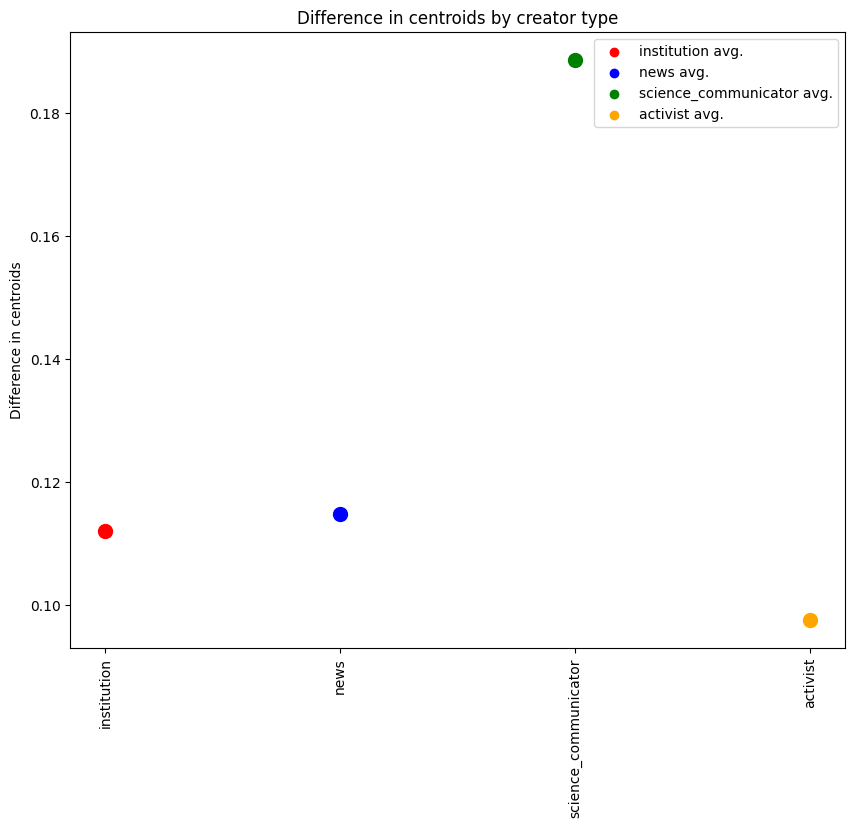

In [40]:
# print difference cenntroids by creator type
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]
list_markers = ["o", "s", "D", "^"]

diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

# plot dots
plt.figure(figsize=(10, 8))

for i in range(len(list_types)):
    list_diff = []
    list_creators = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == list_types[i]:
            list_diff.append(diff_centroids[diff_centroids["creator"]==creator]["diff_centroids"].values[0])
            list_creators.append(creator)

    # also plot average per type
    plt.scatter(list_types[i], sum(list_diff)/len(list_diff), color=list_colors[i], marker="o", s=100)
    # add to legend
    plt.scatter([], [], color=list_colors[i], marker="o", label=list_types[i]+" avg.")

plt.xticks(rotation=90)

plt.legend()
plt.ylabel("Difference in centroids")
plt.title("Difference in centroids by creator type")
plt.show()




In [47]:
diff_centroids

creator  diff_centroids  cossim_content_orig  \
0            unclimatechange        0.124313             0.895678   
1                    bbcnews        0.075562             0.863781   
2                climateadam        0.385053             0.621939   
3                    drgilbz        0.082258             0.901572   
4                  dwplaneta        0.126254             0.849428   
5      extinctionrebellionxr        0.241131             0.709209   
6   greenpeace_international        0.092422             0.875378   
7                   guardian        0.179120             0.777479   
8         ourchangingclimate        0.383001             0.416596   
9                        ted        0.106971             0.834176   
10               juststopoil        0.046918             0.939927   
11               minuteearth        0.164351             0.703169   
12                metoffices        0.099687             0.730169   
13              zahrabiabani        0.093266             0.605555   
14                rupertread        0.097029             0.911463   
15         friendsoftheearth        0.090358             0.880900   
16             parleychannel        0.033627             0.841114   
17       actionfortheclimate        0.081314             0.899703   
18               piqueaction        0.165634             0.813402   
19                  margreen        0.128621             0.803194   
20              nowthisearth        0.078010             0.944766   

                    type  
0            institution  
1                   news  
2   science_communicator  
3   science_communicator  
4                   news  
5               activist  
6               activist  
7                   news  
8   science_communicator  
9   science_communicator  
10              activist  
11  science_communicator  
12           institution  
13  science_communicator  
14              activist  
15              activist  
16              activist  
17              activist  
18  science_communicator  
19  science_communicator  
20                  news

In [42]:
# add type column to diff_centroids
list_types = []
for creator in diff_centroids["creator"]:
    list_types.append(dict_type_creator[creator])

diff_centroids["type"] = list_types

In [43]:
# load dictionary_more
with open("dictionary_popularity.pkl", "rb") as f:
    dict_popularity = pickle.load(f)

In [44]:
# add popularity column to diff_centroids
list_popularity = []
for creator in diff_centroids["creator"]:
    list_popularity.append(dict_popularity[creator])

diff_centroids["popularity"] = list_popularity

In [45]:
# add type column to diff_centroids
list_types = []
for creator in diff_centroids["creator"]:
    list_types.append(dict_type_creator[creator])

diff_centroids["type"] = list_types

In [46]:
diff_centroids

creator  diff_centroids  cossim_content_orig  \
2                climateadam        0.385053             0.621939   
8         ourchangingclimate        0.383001             0.416596   
5      extinctionrebellionxr        0.241131             0.709209   
7                   guardian        0.179120             0.777479   
18               piqueaction        0.165634             0.813402   
11               minuteearth        0.164351             0.703169   
19                  margreen        0.128621             0.803194   
4                  dwplaneta        0.126254             0.849428   
0            unclimatechange        0.124313             0.895678   
9                        ted        0.106971             0.834176   
12                metoffices        0.099687             0.730169   
14                rupertread        0.097029             0.911463   
13              zahrabiabani        0.093266             0.605555   
6   greenpeace_international        0.092422             0.875378   
15         friendsoftheearth        0.090358             0.880900   
3                    drgilbz        0.082258             0.901572   
17       actionfortheclimate        0.081314             0.899703   
20              nowthisearth        0.078010             0.944766   
1                    bbcnews        0.075562             0.863781   
10               juststopoil        0.046918             0.939927   
16             parleychannel        0.033627             0.841114   

                    type popularity  
2   science_communicator    similar  
8   science_communicator         yt  
5               activist         tt  
7                   news         yt  
18  science_communicator    similar  
11  science_communicator         yt  
19  science_communicator         tt  
4                   news         yt  
0            institution         tt  
9   science_communicator         yt  
12           institution         tt  
14              activist         yt  
13  science_communicator         tt  
6               activist         yt  
15              activist         tt  
3   science_communicator         yt  
17              activist         tt  
20                  news    similar  
1                   news    similar  
10              activist    similar  
16              activist         tt

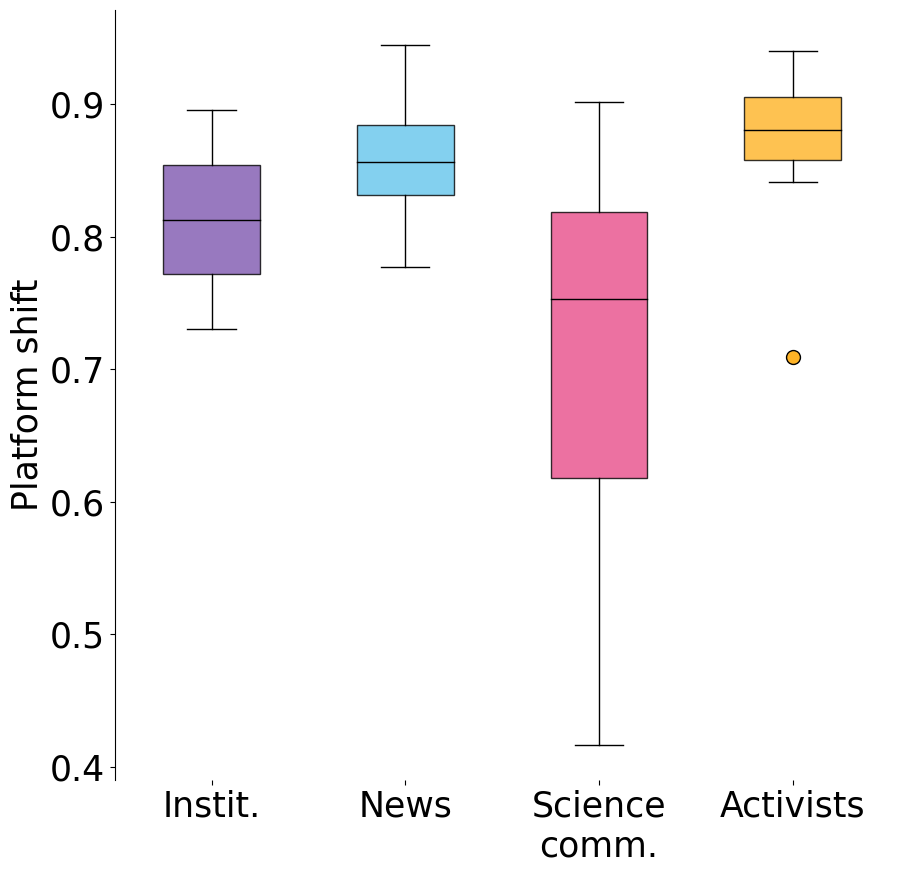

In [52]:
# print difference cenntroids by creator type
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Instit.", "News", "Science\ncomm.", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# boxplot of cossim_content_orig by creator type (4 boxplots)
plt.figure(figsize=(10, 10))

# remove grid
plt.grid(False)

# plot boxplots not with seaborn
list_data = []
for i in range(len(list_types)):
    list_data.append(diff_centroids[diff_centroids["type"]==list_types[i]]["cossim_content_orig"].tolist())

    type_account = list_types[i]

    plt.boxplot(diff_centroids[diff_centroids["type"]==list_types[i]]["cossim_content_orig"].tolist(), positions=[list_types.index(type_account)], widths=0.5, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type_account)], color=list_colors[list_types.index(type_account)]), medianprops=dict(color="black"), flierprops=dict(markerfacecolor=list_colors[list_types.index(type_account)], marker='o', markersize=10, linestyle='none'))


# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    patch.set_edgecolor("black")

plt.xticks(range(len(list_types)), list_names_types, rotation=0)
# set fontsize for xticks and yticks
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel("Platform shift", fontsize=25)
#plt.title("Cosine similarity between TikTok and YouTube content by creator type", fontsize=20)

# remove spines except left one
sns.despine(left=False)
# remove bottom and top spines
plt.gca().spines['bottom'].set_visible(False)

plt.show()



In [46]:
# create popularity column in diff_centroids
list_popularity = []
for creator in diff_centroids["creator"]:
    list_popularity.append(dict_popularity[creator])

diff_centroids["popularity"] = list_popularity

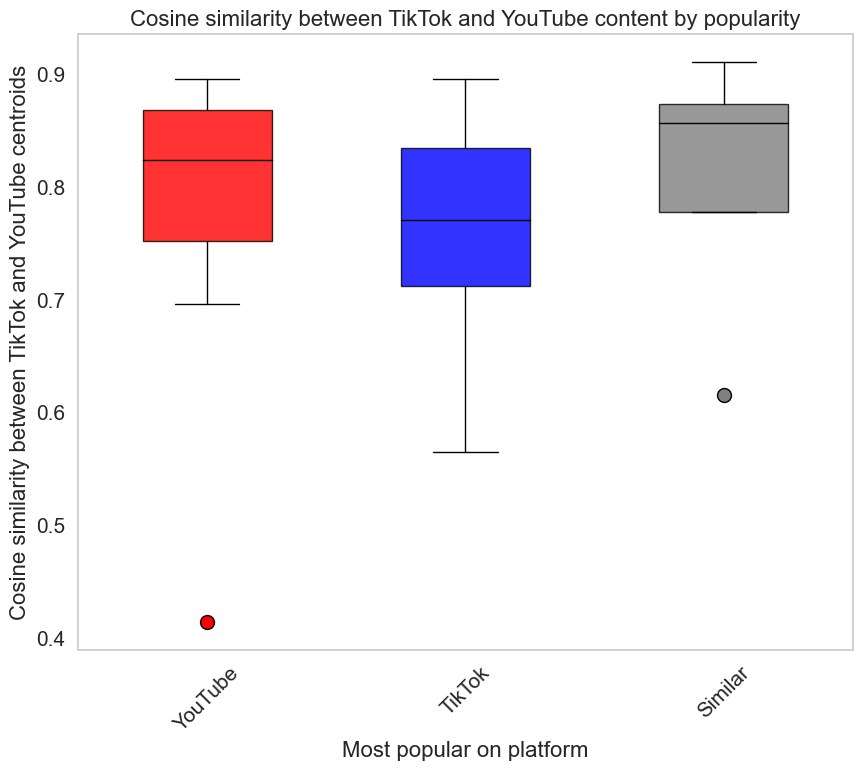

In [271]:
# print difference cenntroids by creator type
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# boxplot of cossim_content_orig by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

# remove grid
plt.grid(False)

# plot boxplots not with seaborn
list_data = []
for i in range(len(list_types)):
    list_data.append(diff_centroids[diff_centroids["popularity"]==list_types[i]]["cossim_content_orig"].tolist())

    type_account = list_types[i]

    plt.boxplot(diff_centroids[diff_centroids["popularity"]==list_types[i]]["cossim_content_orig"].tolist(), positions=[list_types.index(type_account)], widths=0.5, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type_account)], color=list_colors[list_types.index(type_account)]), medianprops=dict(color="black"), flierprops=dict(markerfacecolor=list_colors[list_types.index(type_account)], marker='o', markersize=10, linestyle='none'))


# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    patch.set_edgecolor("black")

plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Cosine similarity between TikTok and YouTube centroids", fontsize=16)
plt.xlabel("Most popular on platform", fontsize=16)
plt.title("Cosine similarity between TikTok and YouTube content by popularity", fontsize=16)
plt.show()



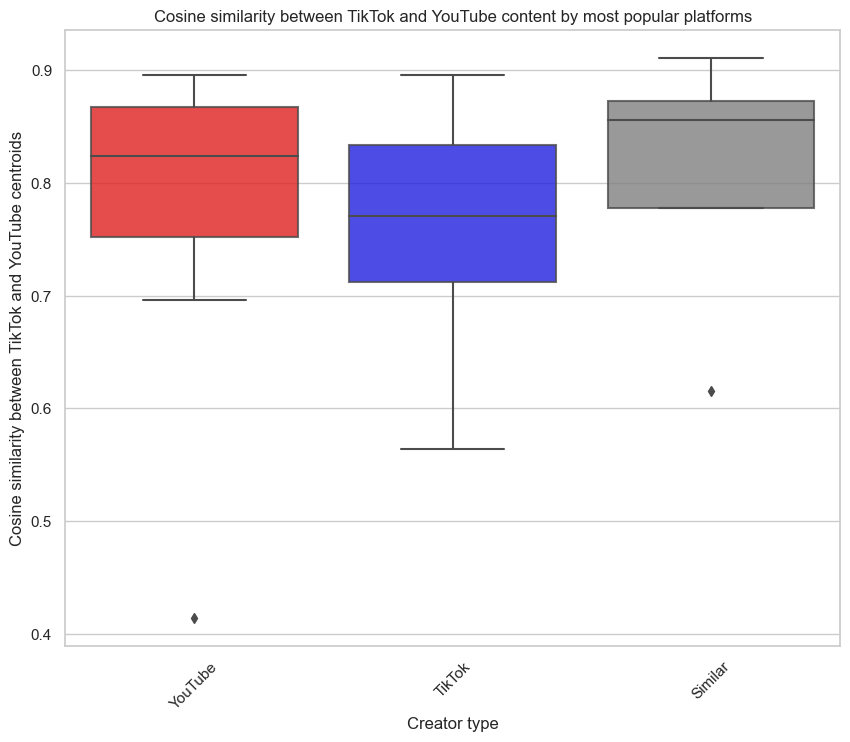

In [272]:
# print difference cenntroids by creator type
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# boxplot of cossim_content_orig by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

sns.set_theme(style="whitegrid")

# boxplot with seaborn
sns.boxplot(x="popularity", y="cossim_content_orig", data=diff_centroids, palette=list_colors, order=list_types)

# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)

plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Cosine similarity between TikTok and YouTube centroids")
plt.xlabel("Creator type")
plt.title("Cosine similarity between TikTok and YouTube content by most popular platforms")
plt.show()



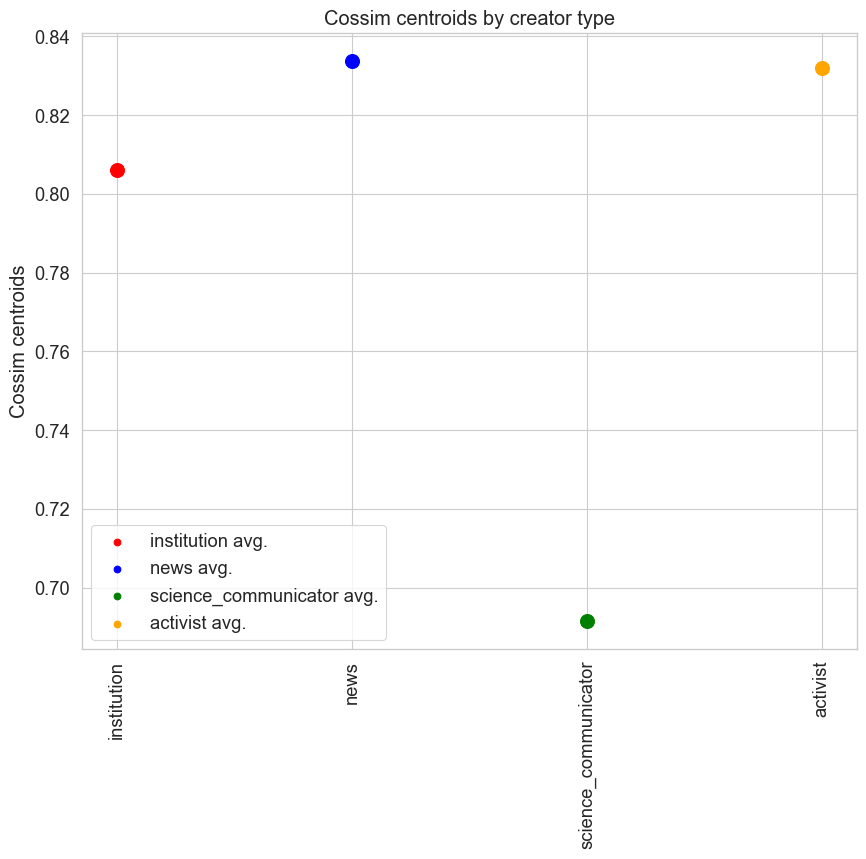

In [32]:
# print difference cenntroids by creator type
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]

diff_centroids = diff_centroids.sort_values(by="cossim_content_orig", ascending=True)
list_creators_ordered = diff_centroids["creator"].tolist()

# plot dots
plt.figure(figsize=(10, 8))

for i in range(len(list_types)):
    list_diff = []
    list_creators = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == list_types[i]:
            list_diff.append(diff_centroids[diff_centroids["creator"]==creator]["cossim_content_orig"].values[0])
            list_creators.append(creator)

    # also plot average per type
    plt.scatter(list_types[i], sum(list_diff)/len(list_diff), color=list_colors[i], marker="o", s=100)
    # add to legend
    plt.scatter([], [], color=list_colors[i], marker="o", label=list_types[i]+" avg.")

plt.xticks(rotation=90)

plt.legend()
plt.ylabel("Cossim centroids")
plt.title("Cossim centroids by creator type")
plt.show()




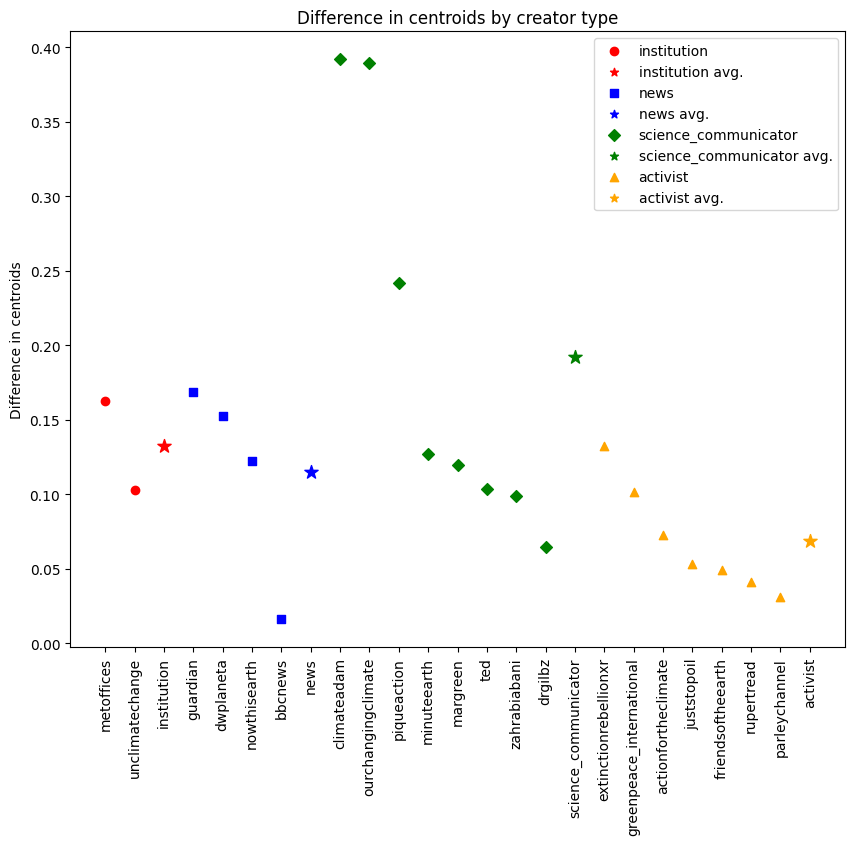

In [9]:
# print difference cenntroids by creator type
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]
list_markers = ["o", "s", "D", "^"]

diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

# plot dots
plt.figure(figsize=(10, 8))

for i in range(len(list_types)):
    list_diff = []
    list_creators = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == list_types[i]:
            list_diff.append(diff_centroids[diff_centroids["creator"]==creator]["diff_centroids"].values[0])
            list_creators.append(creator)
    plt.scatter(list_creators, list_diff, color=list_colors[i], marker=list_markers[i], label=list_types[i])

    # also plot average per type
    plt.scatter(list_types[i], sum(list_diff)/len(list_diff), color=list_colors[i], marker="*", s=100)
    # add to legend
    plt.scatter([], [], color=list_colors[i], marker="*", label=list_types[i]+" avg.")

plt.xticks(rotation=90)

plt.legend()
plt.ylabel("Difference in centroids")
plt.title("Difference in centroids by creator type")
plt.show()


## Language metrics

### Point-wise

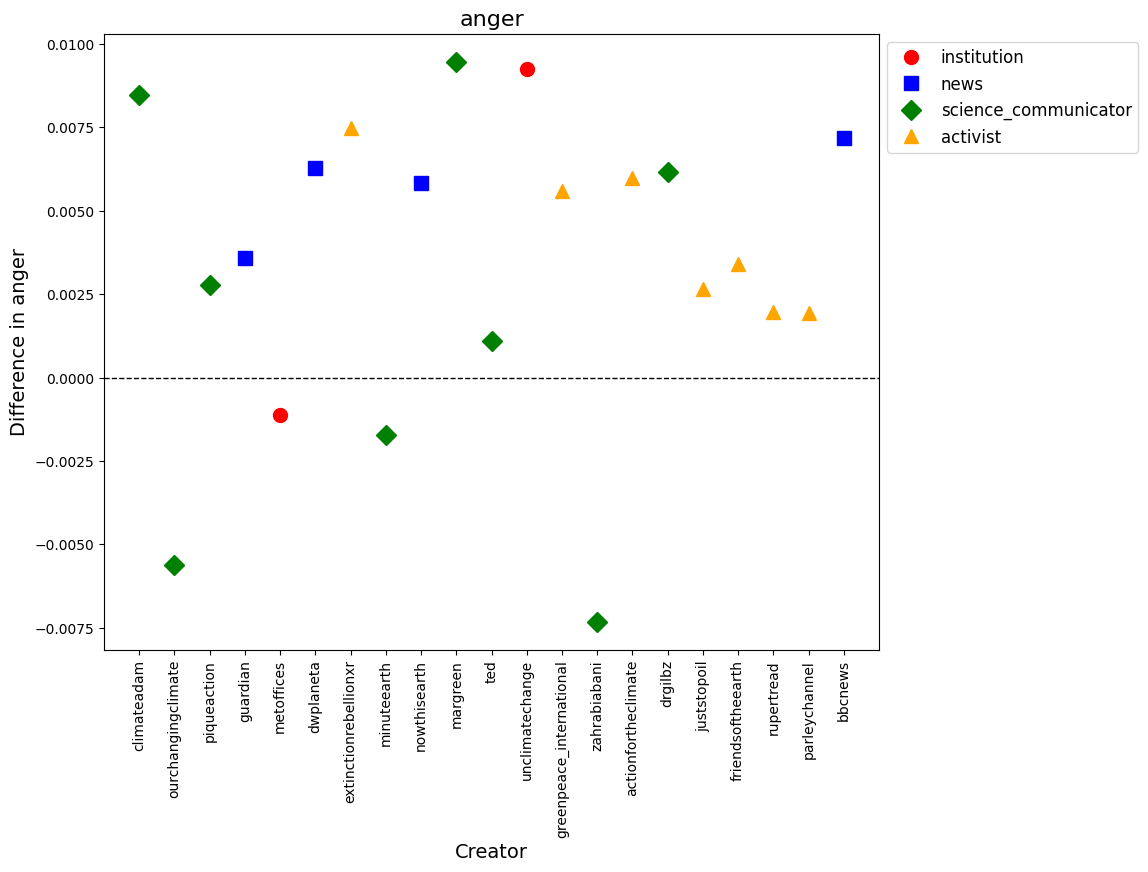

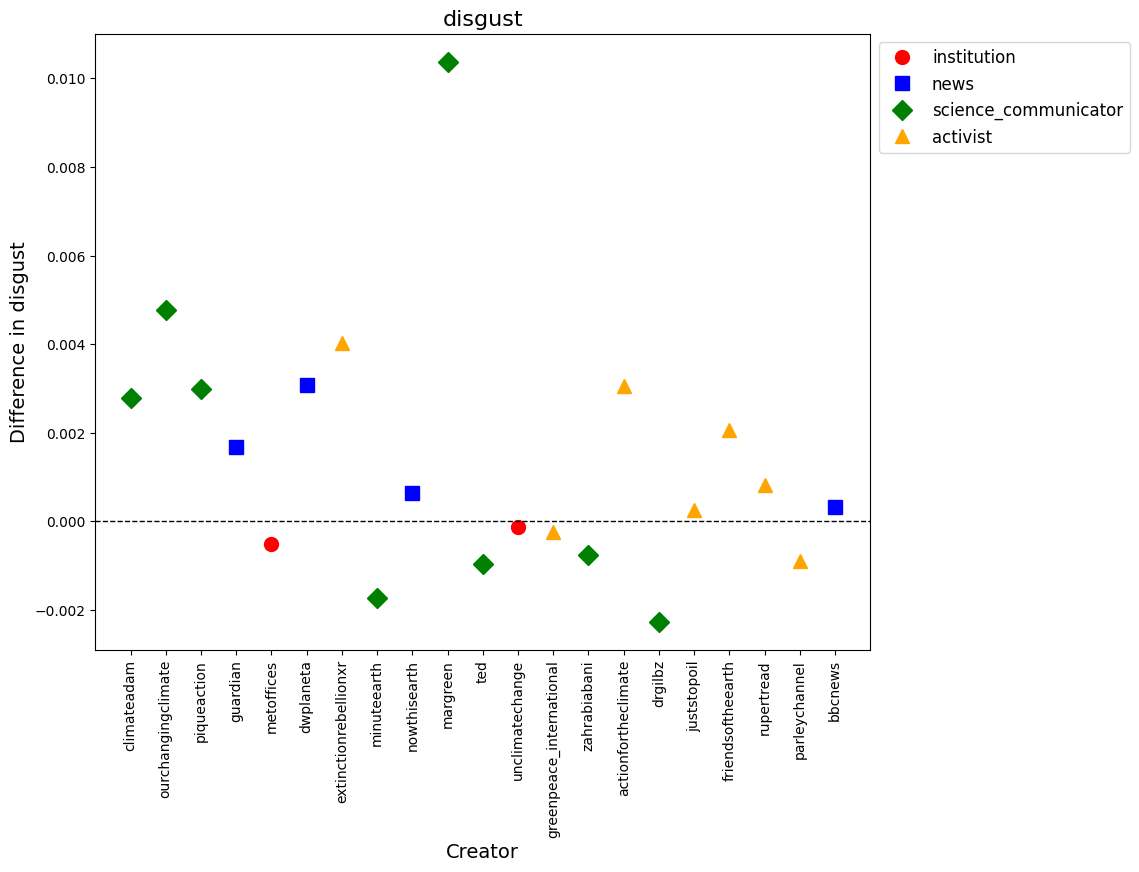

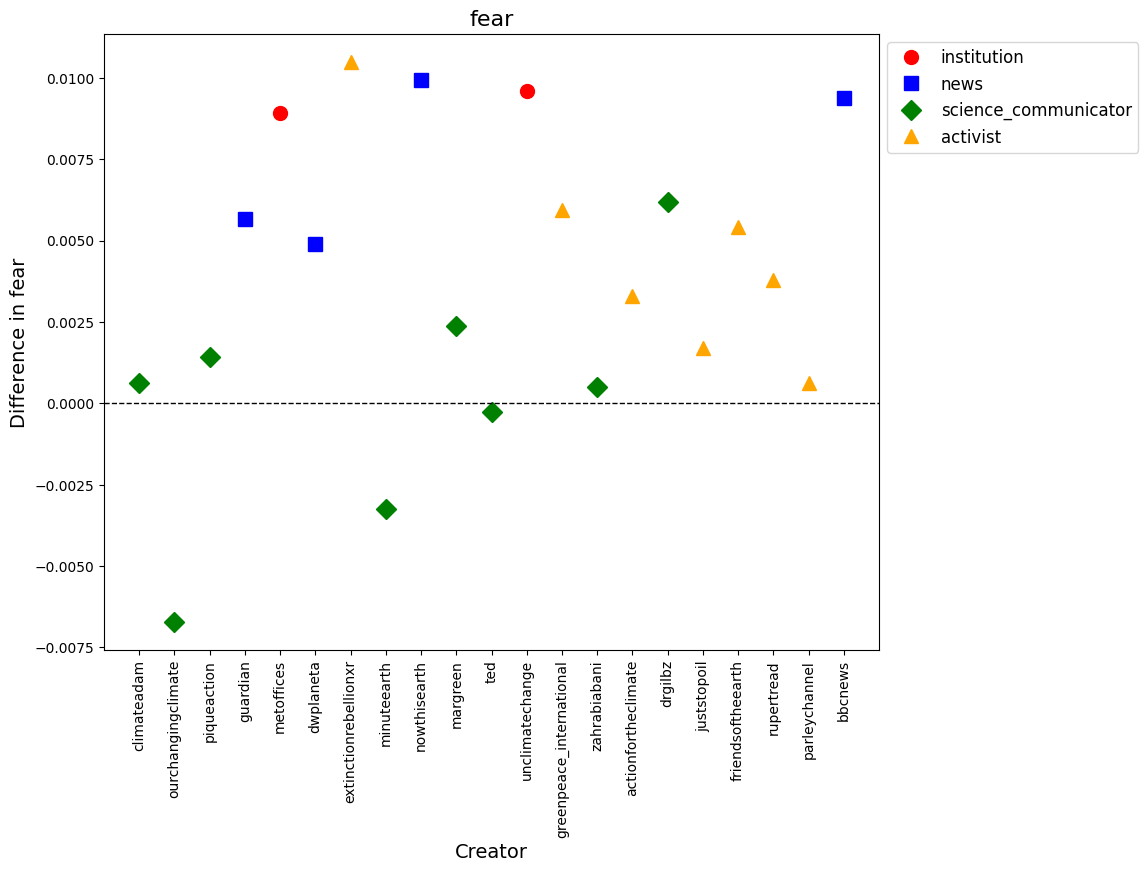

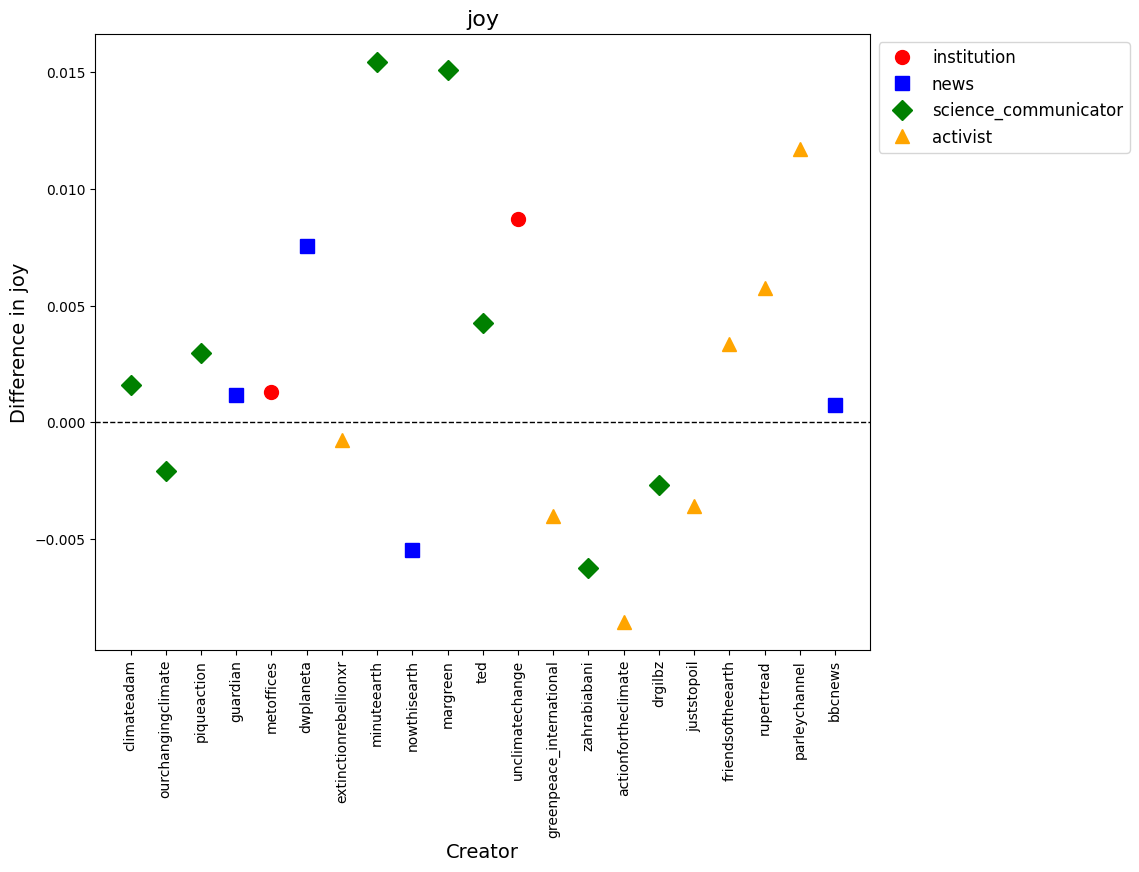

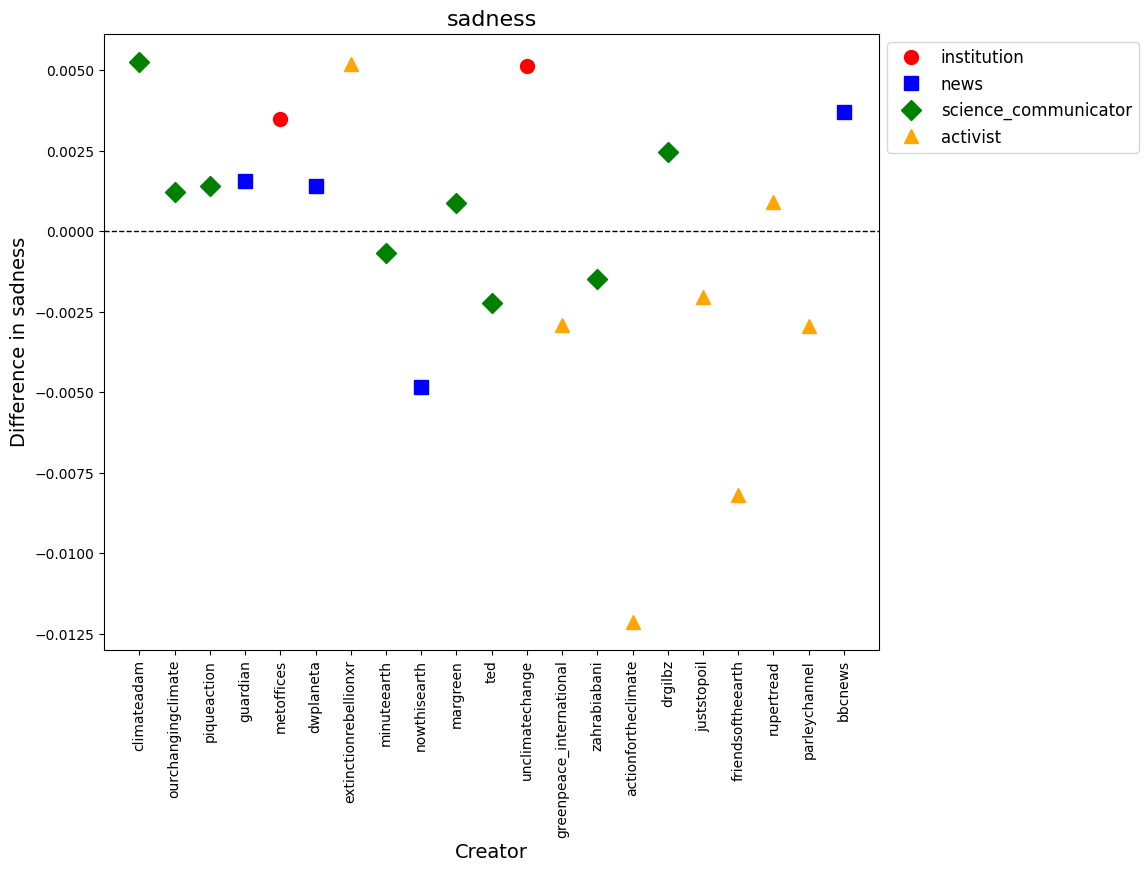

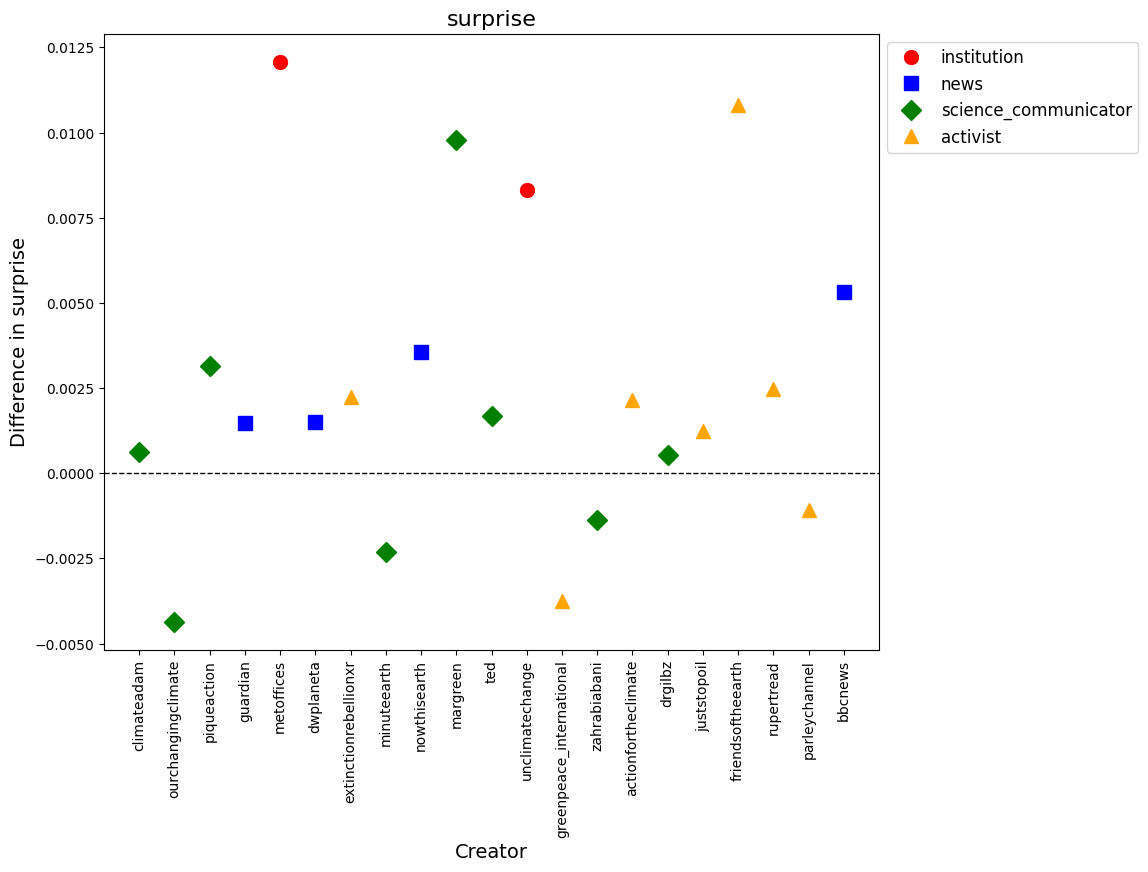

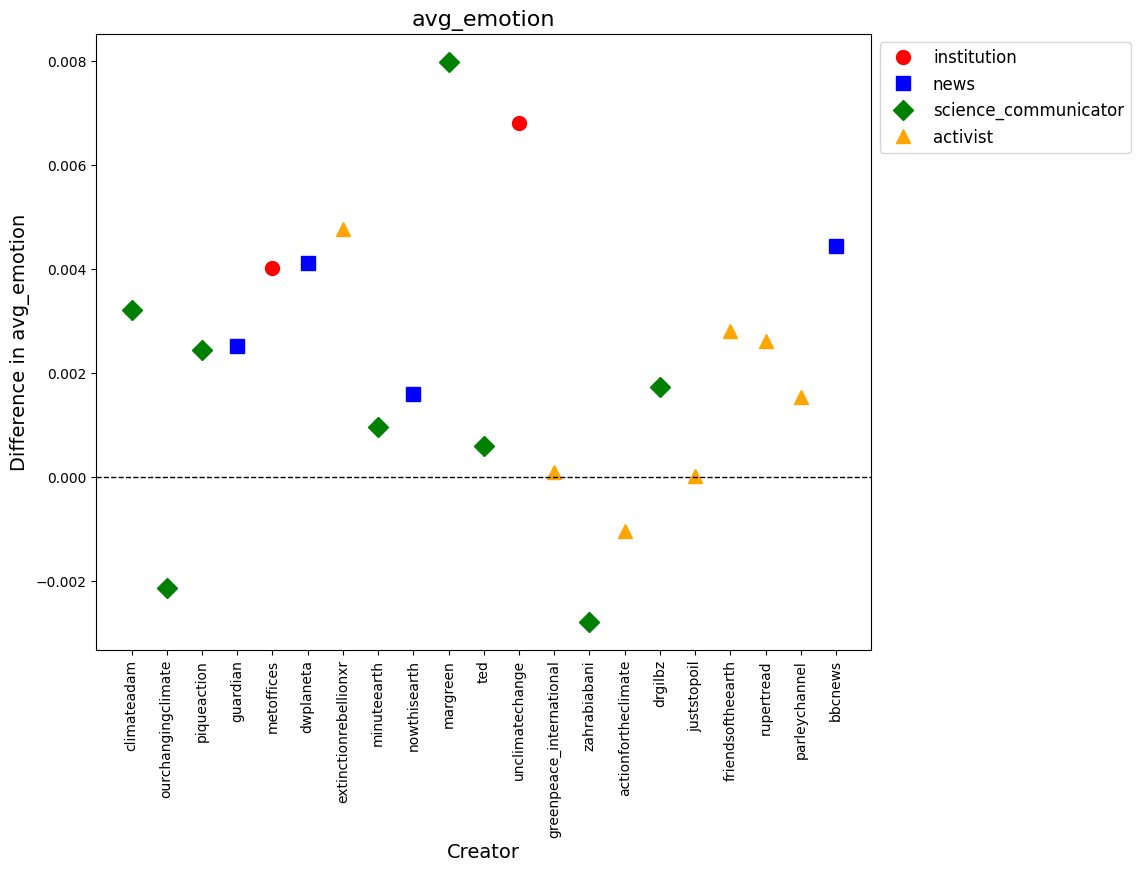

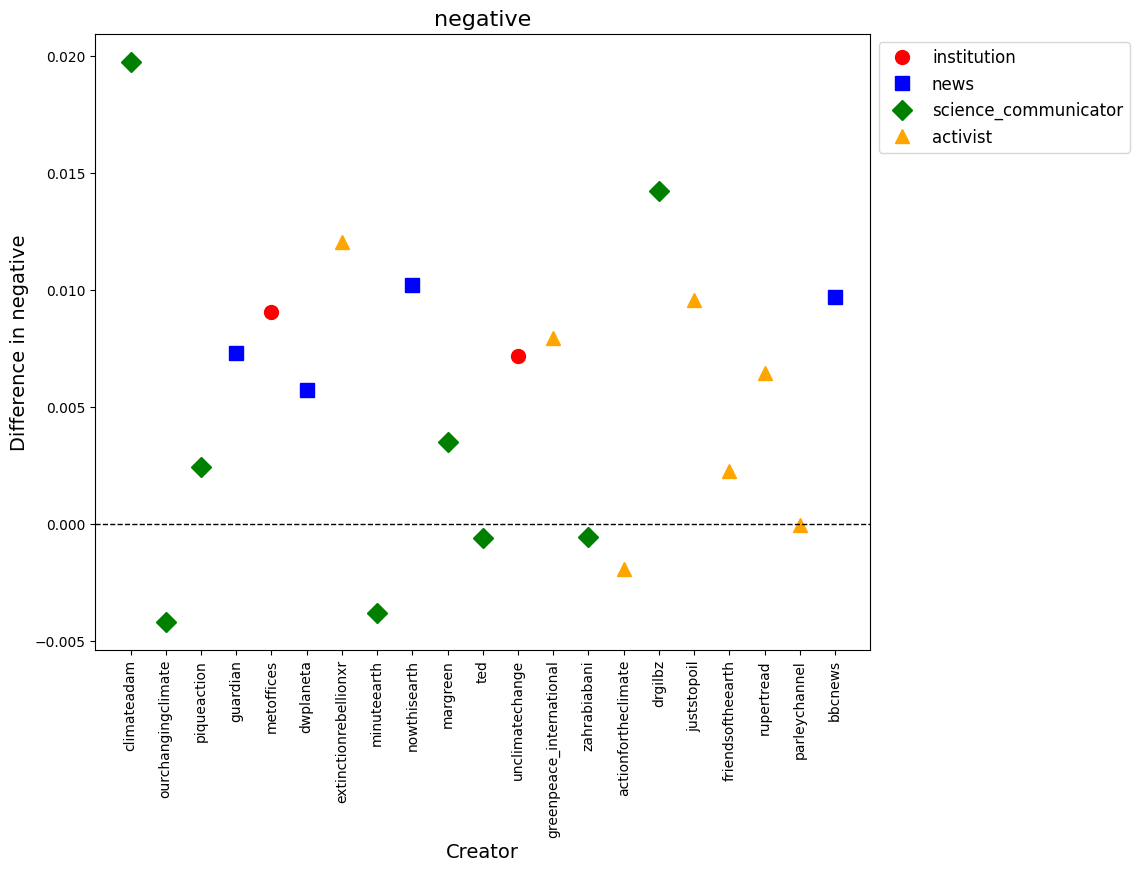

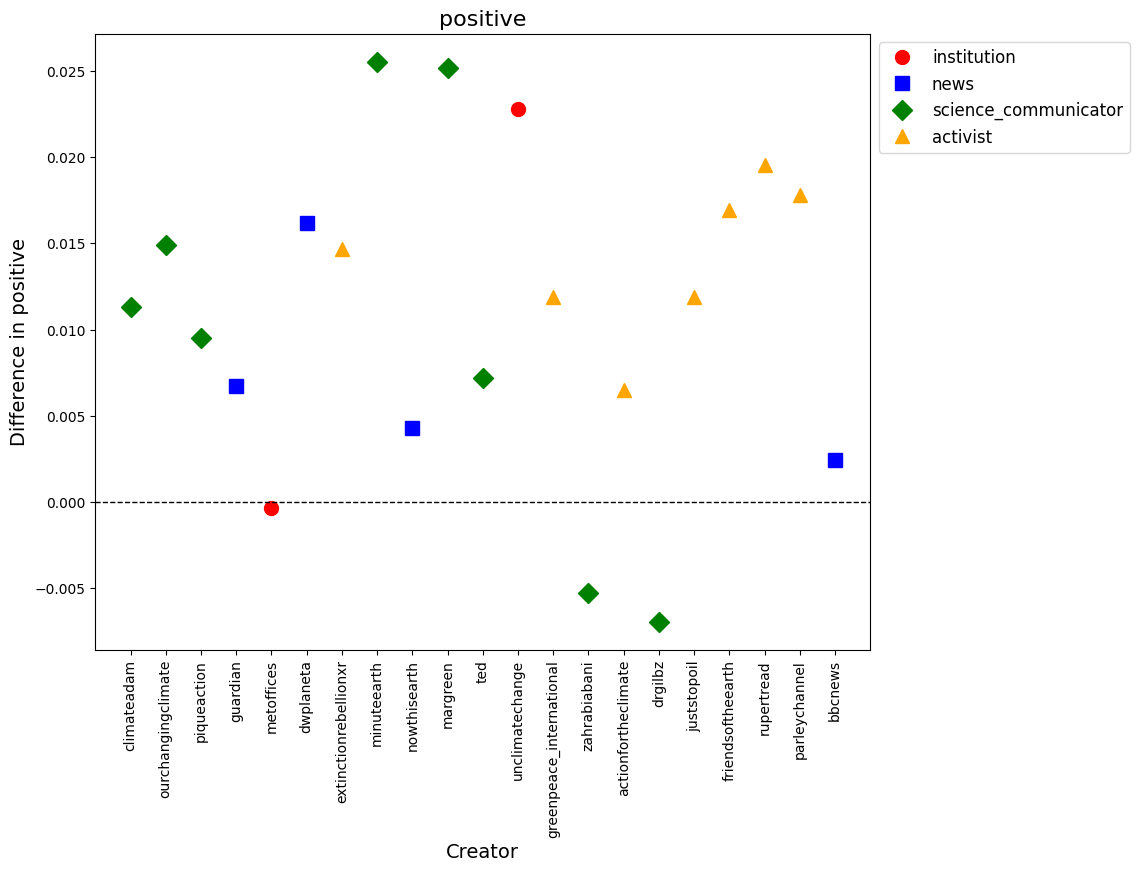

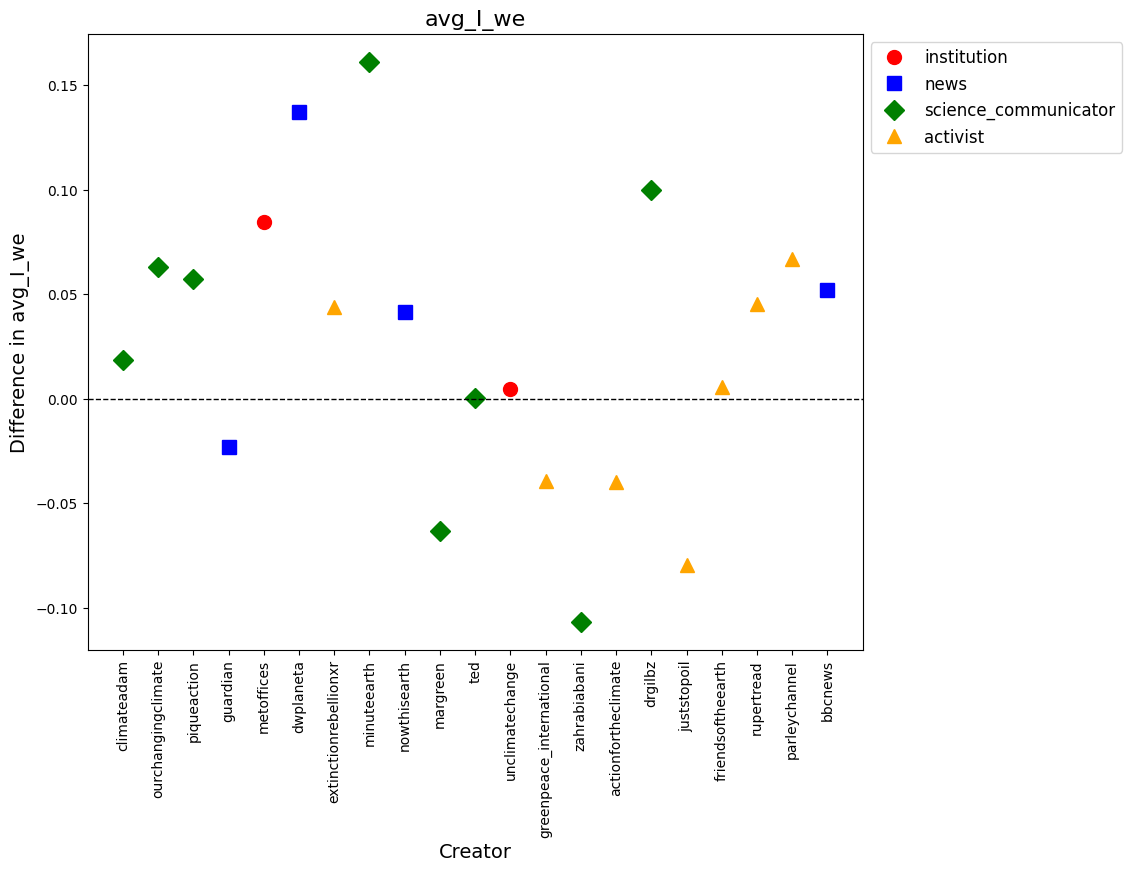

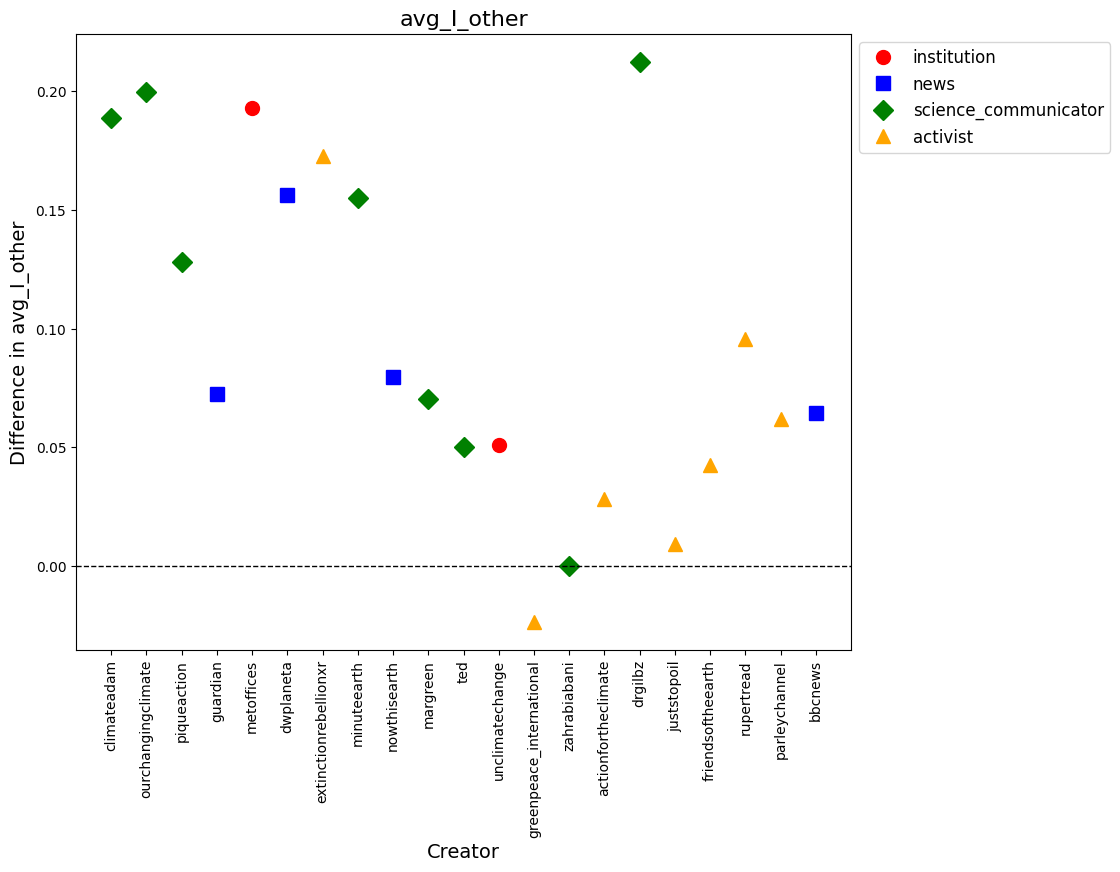

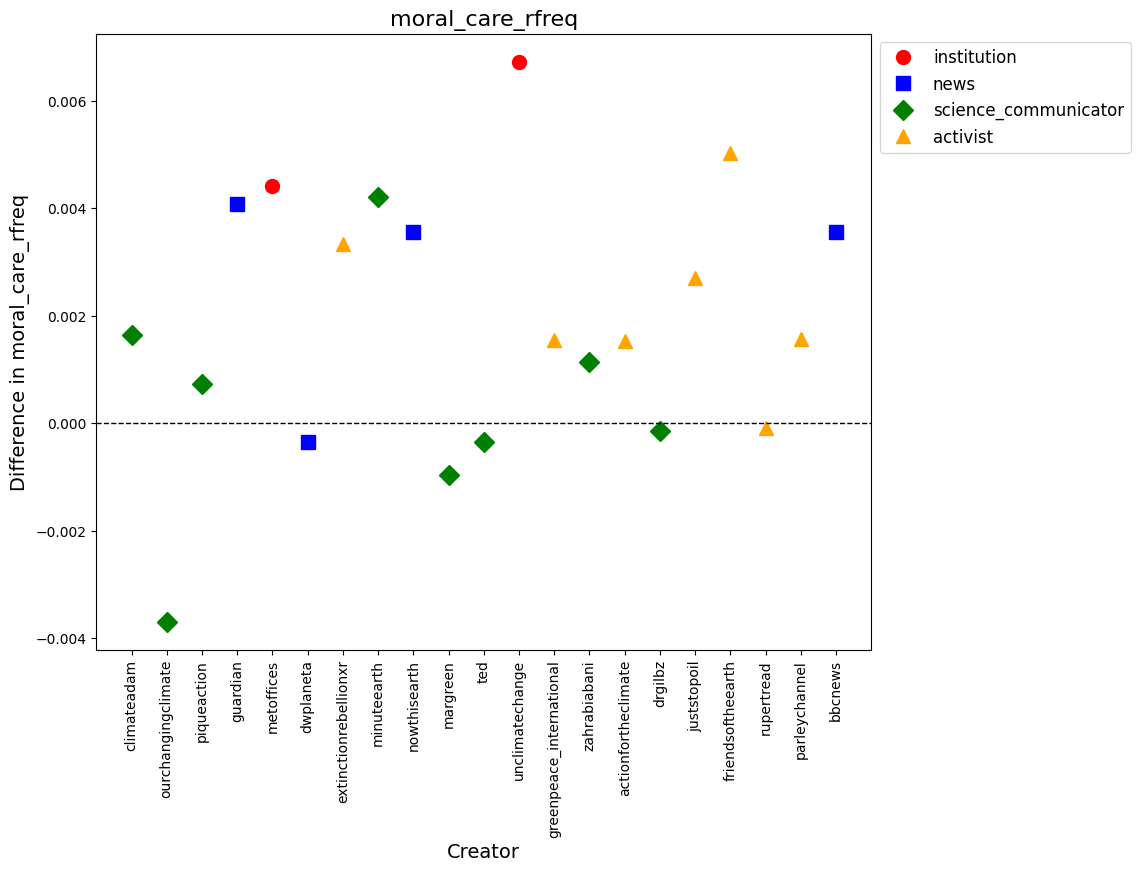

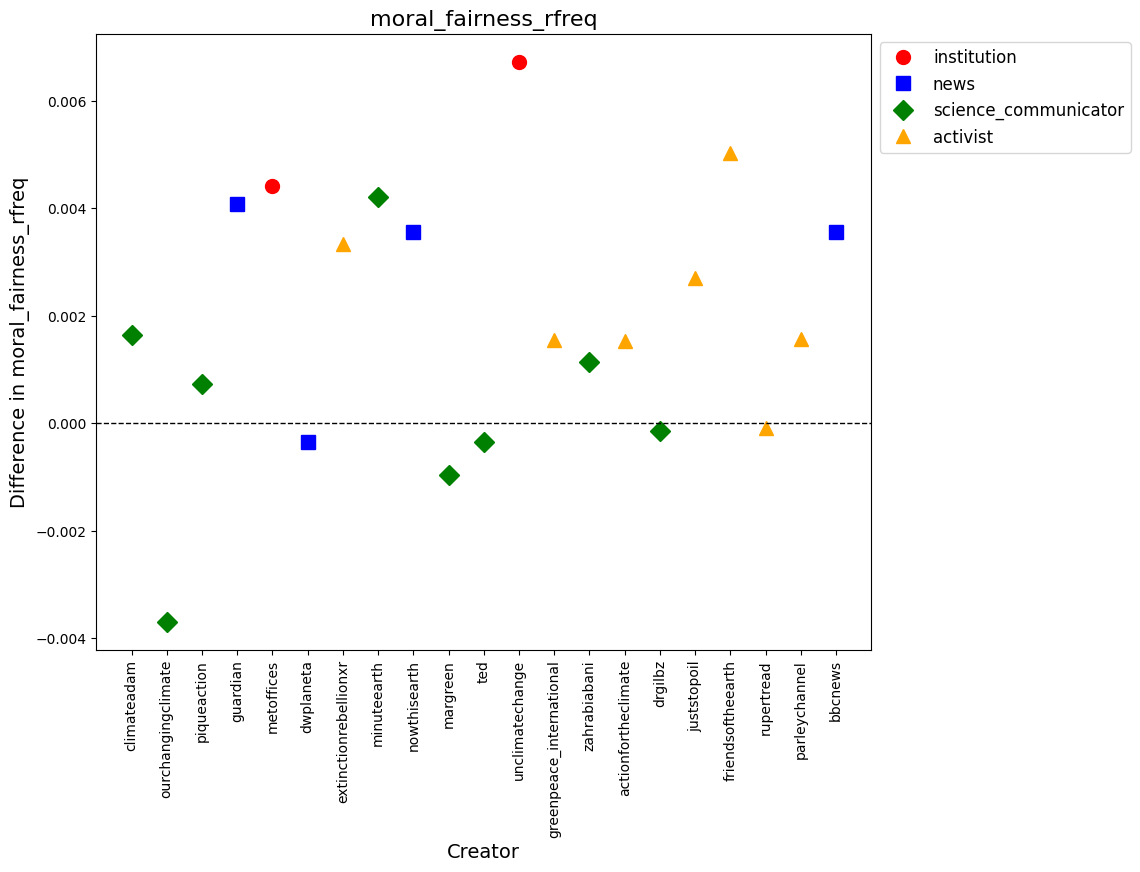

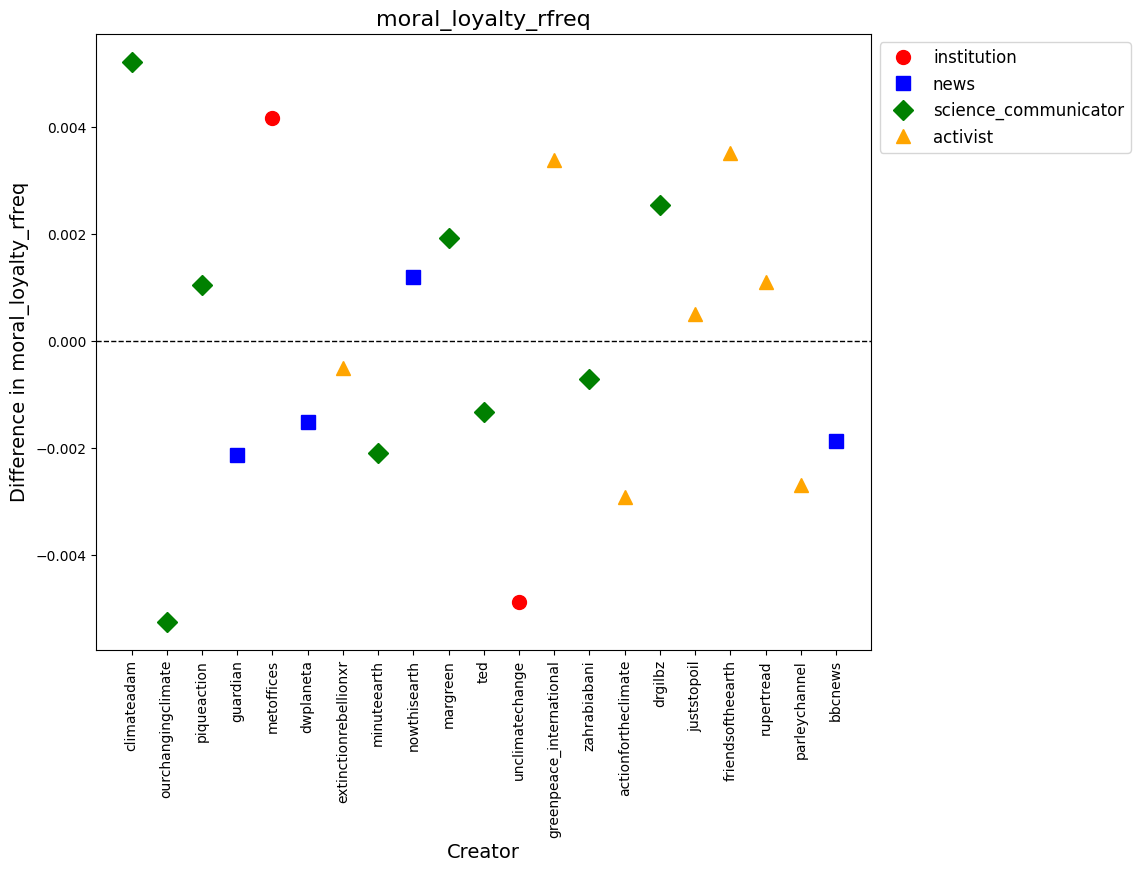

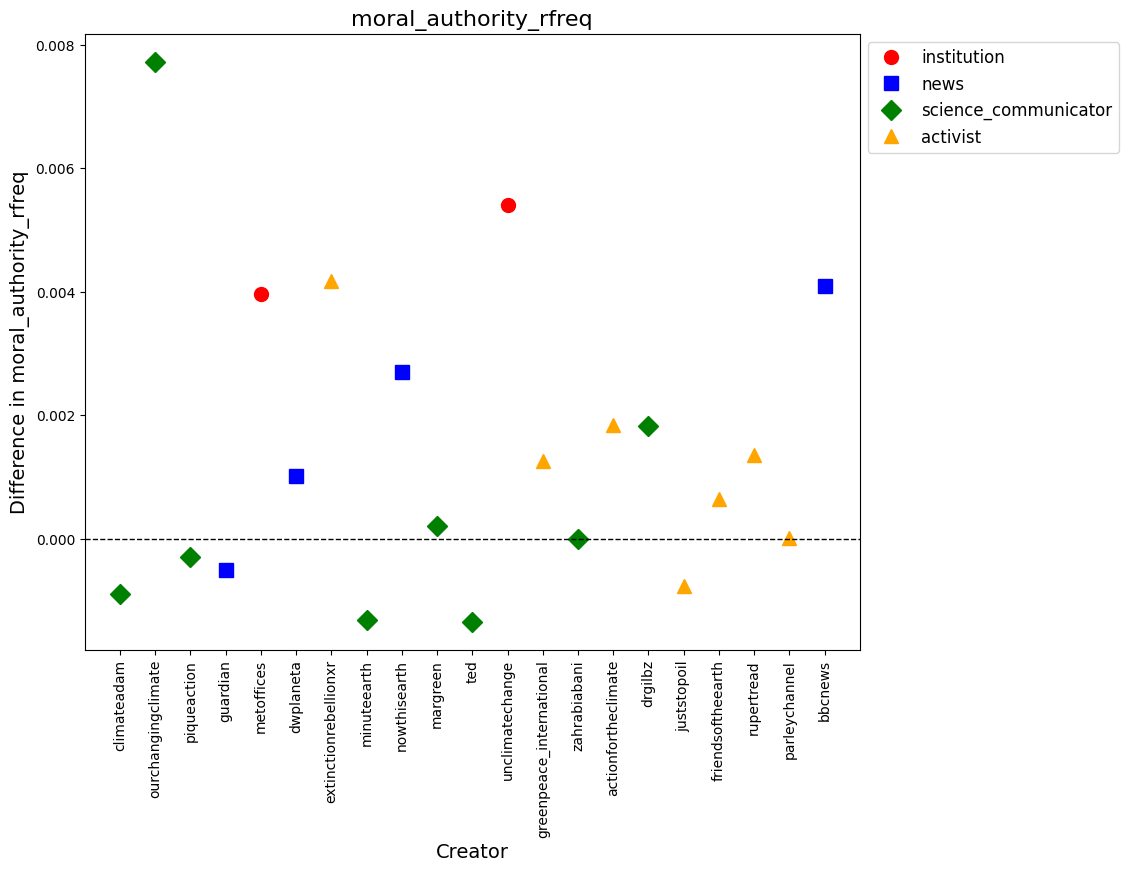

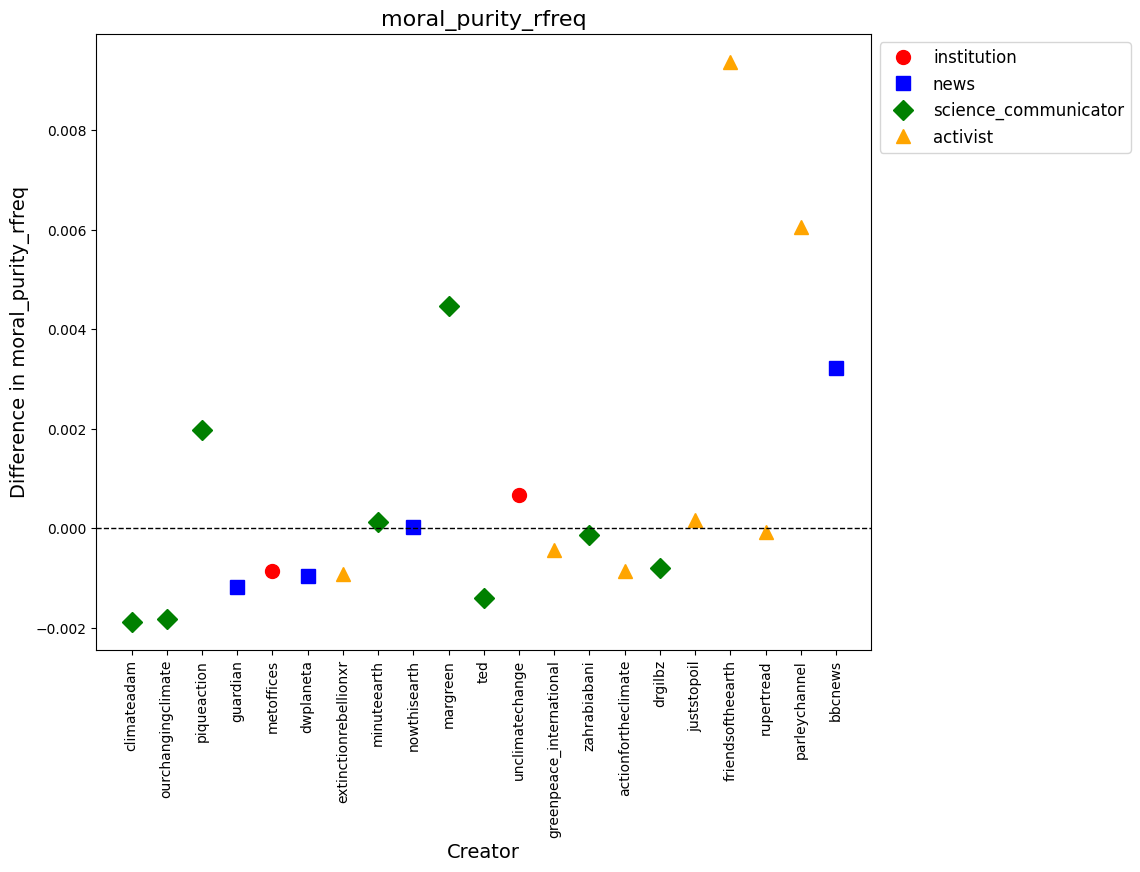

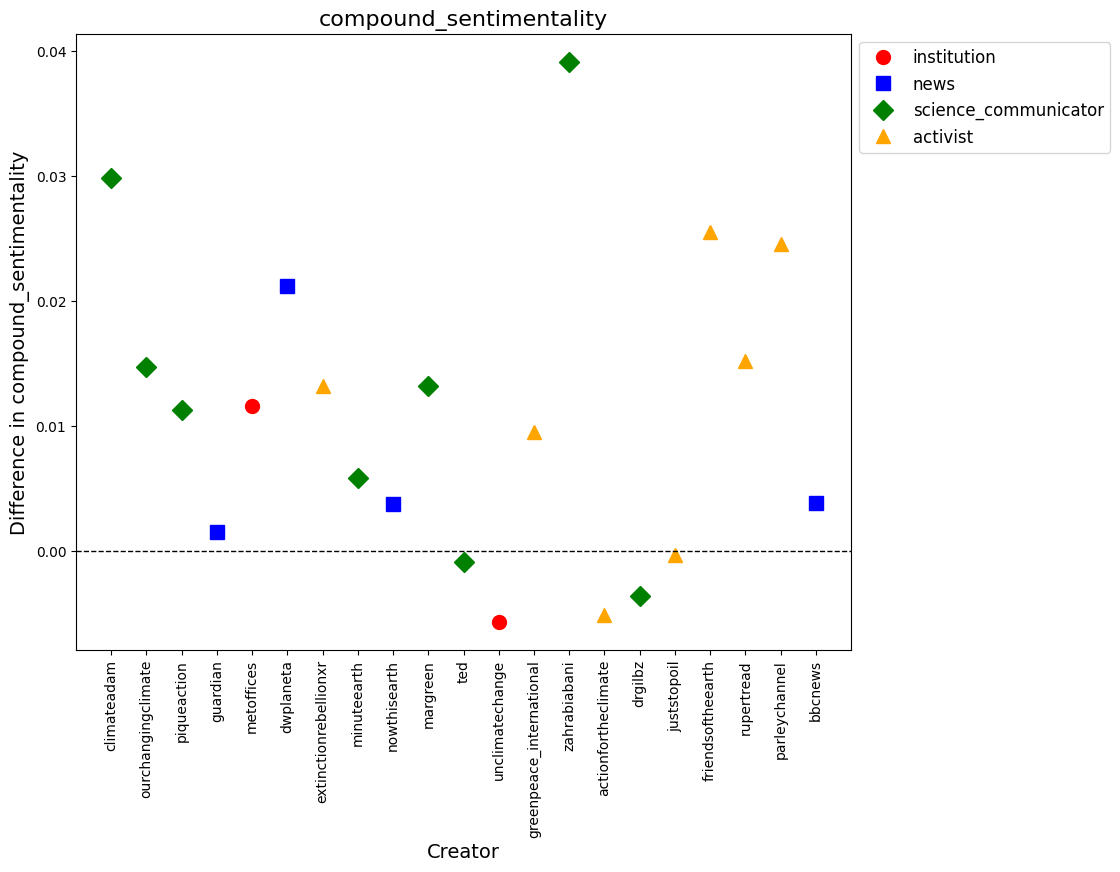

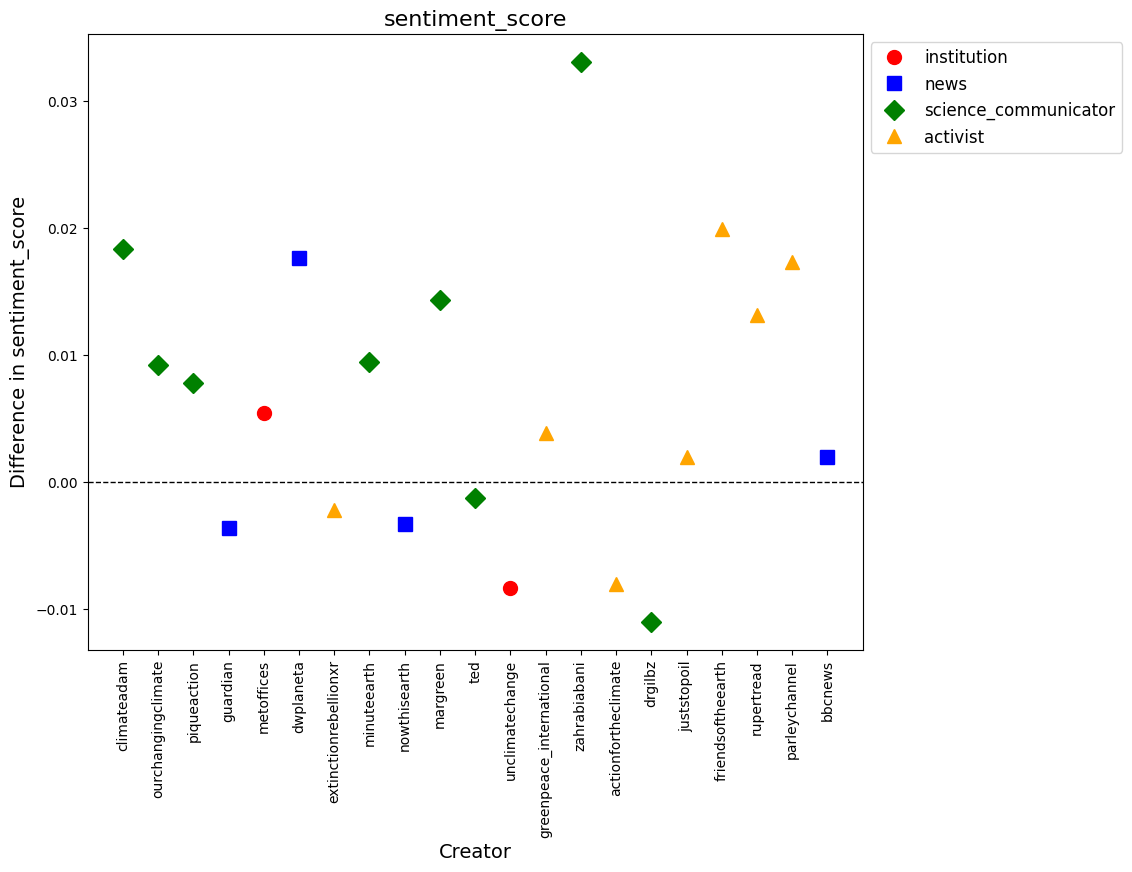

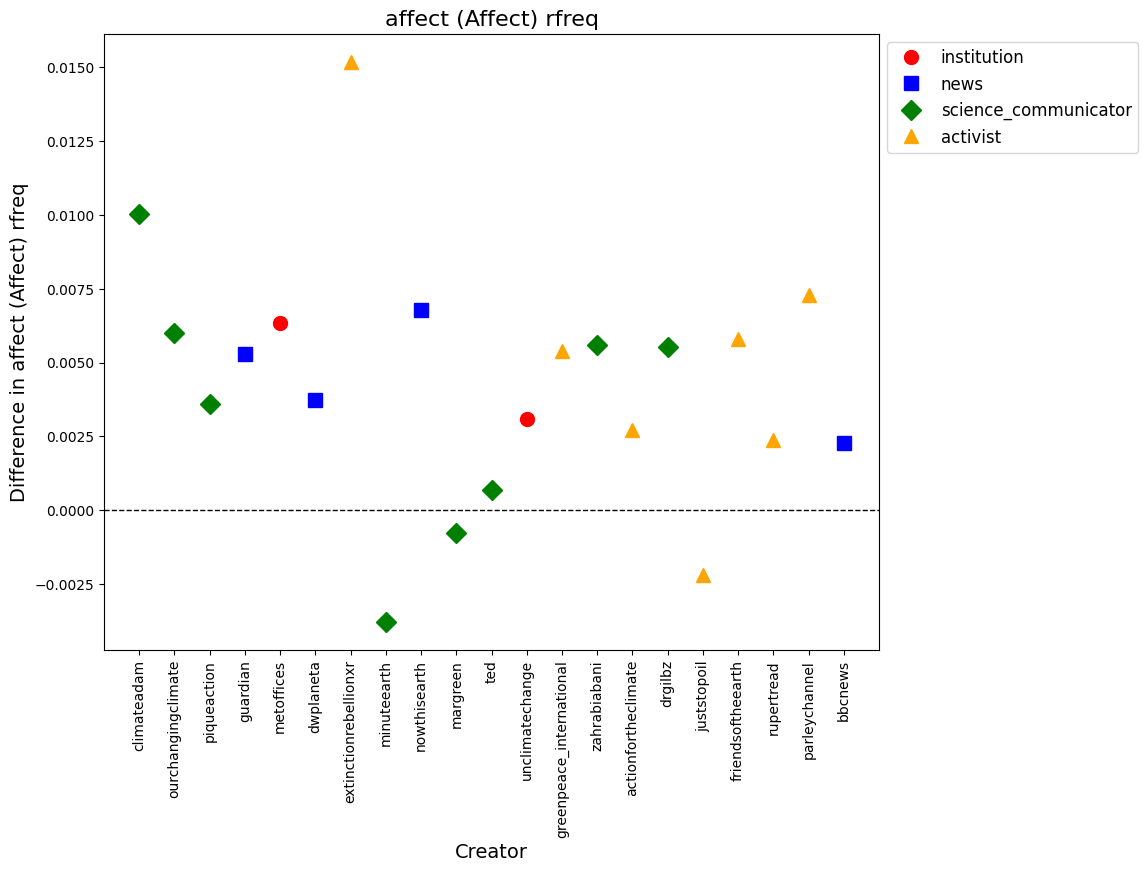

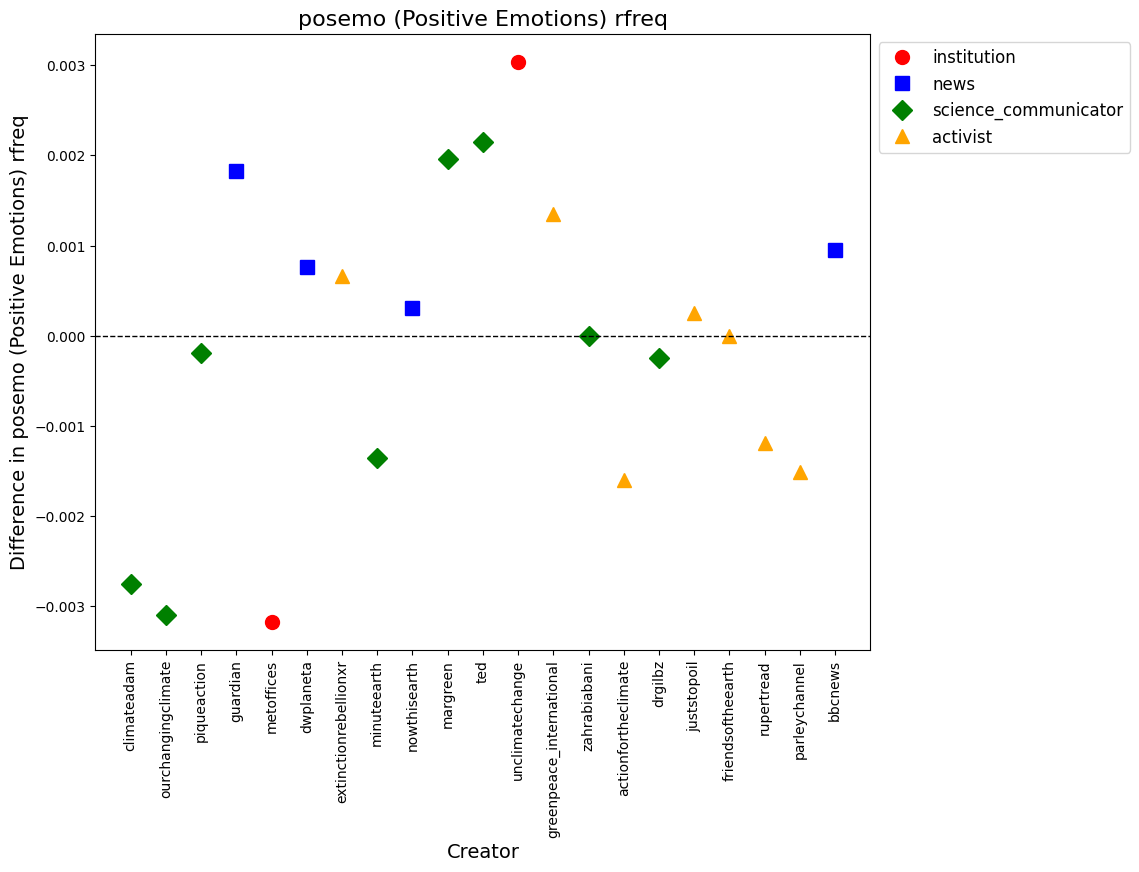

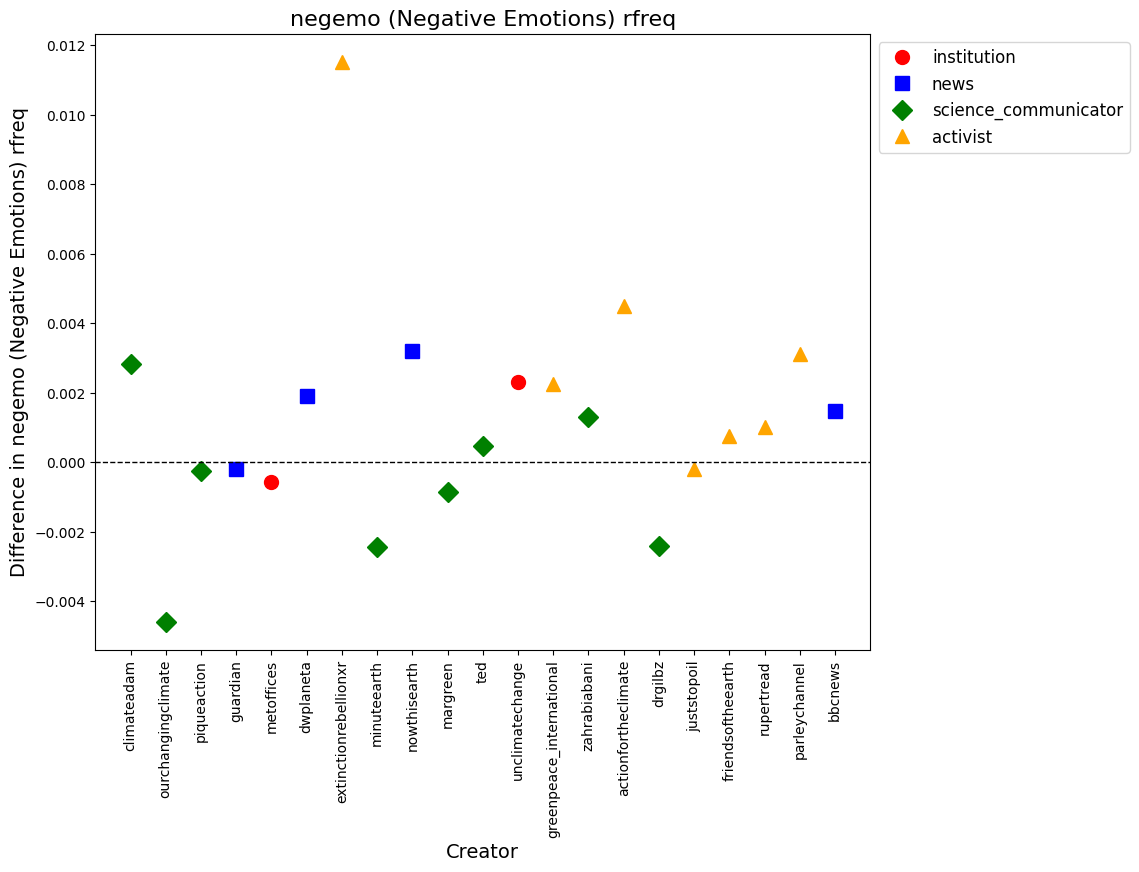

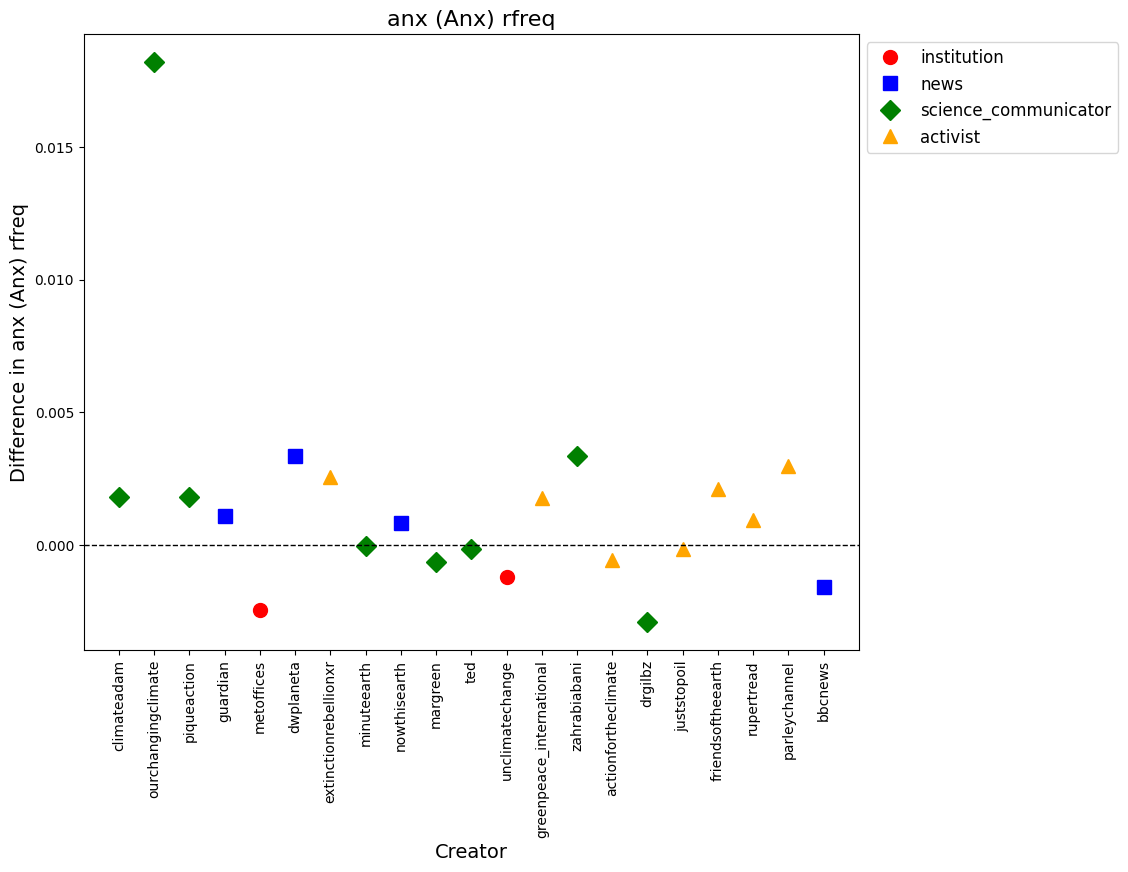

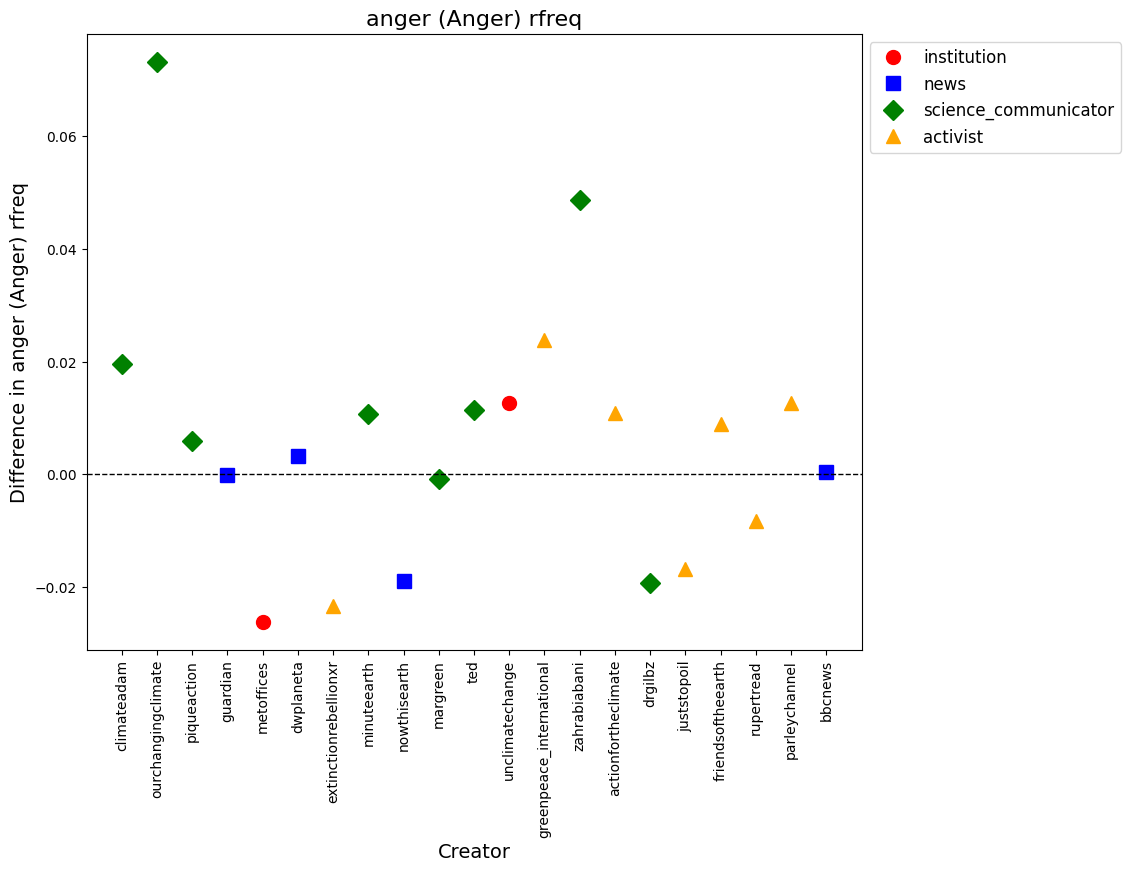

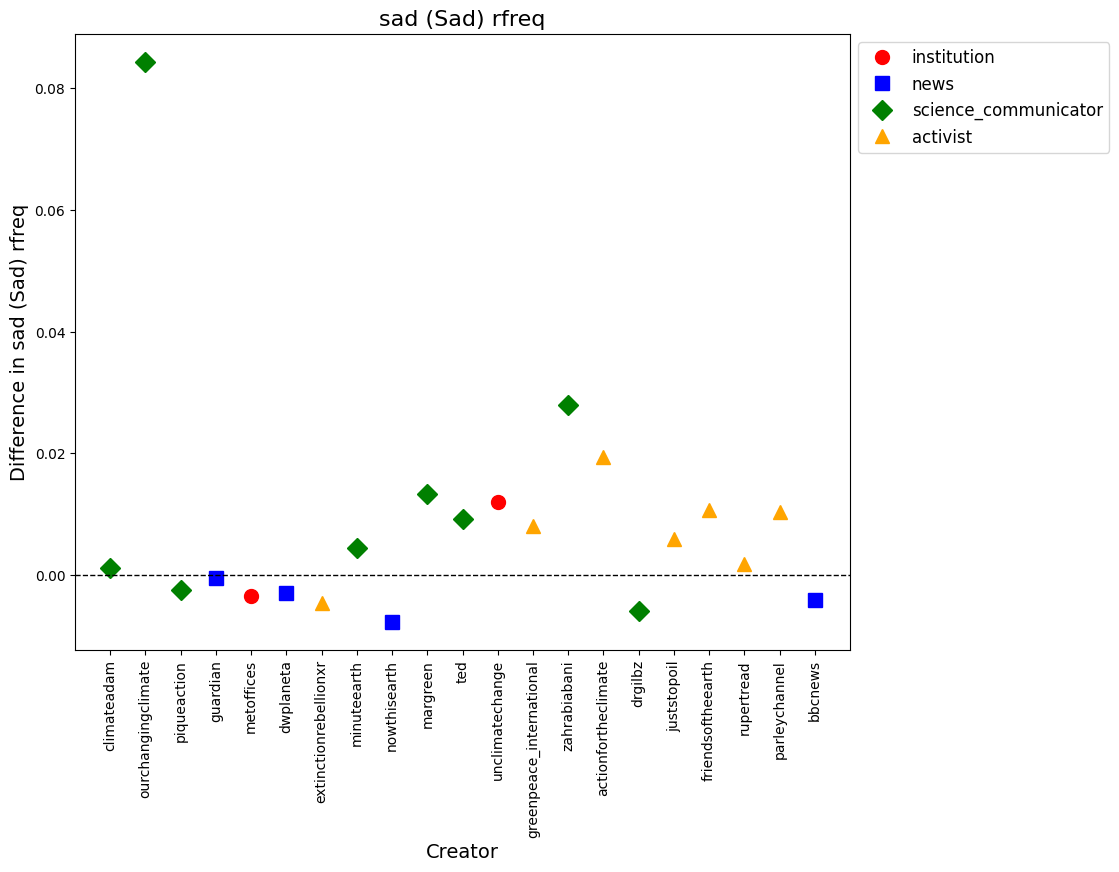

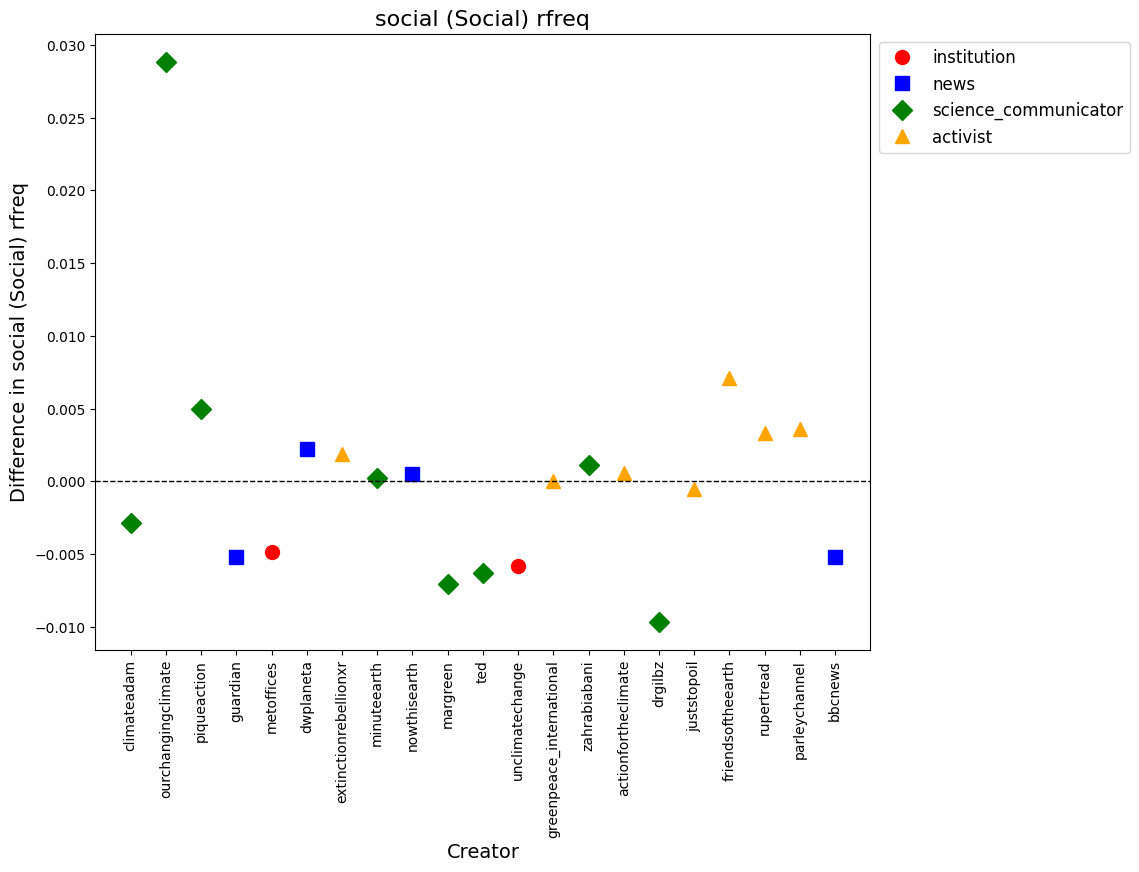

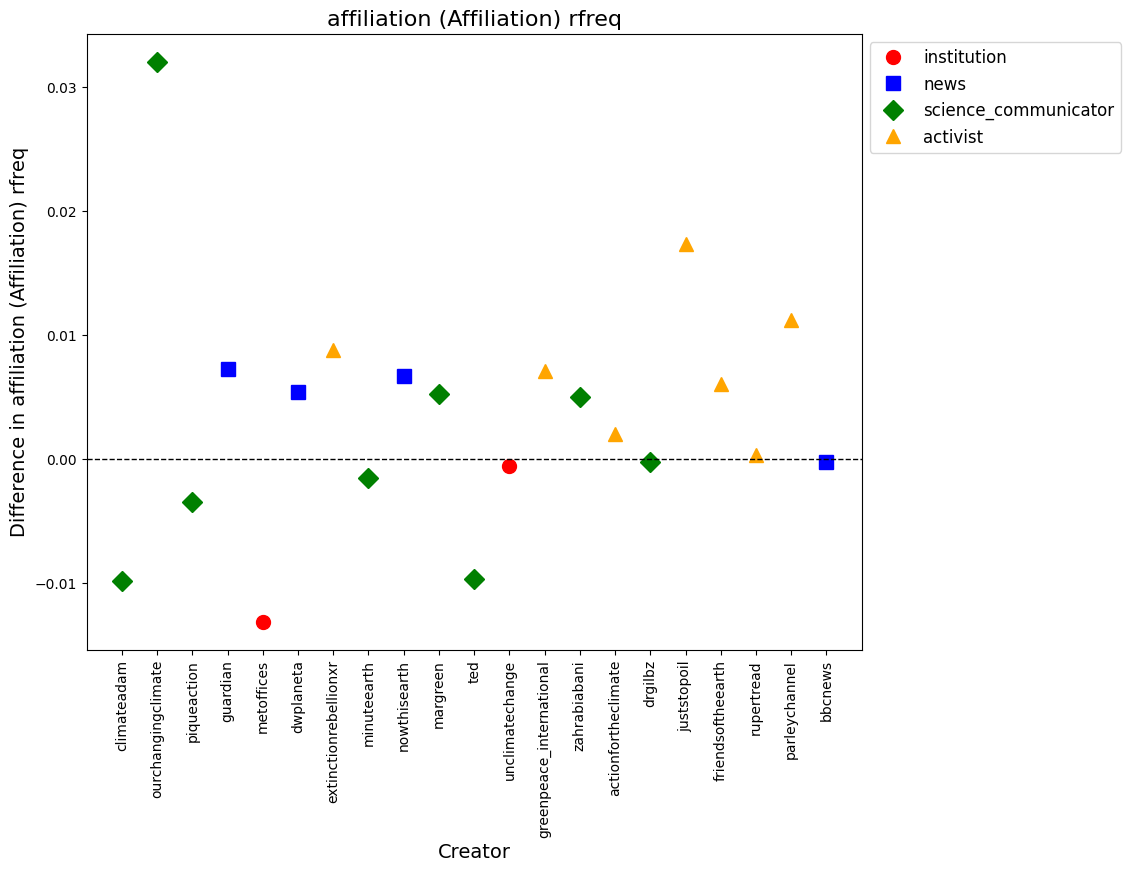

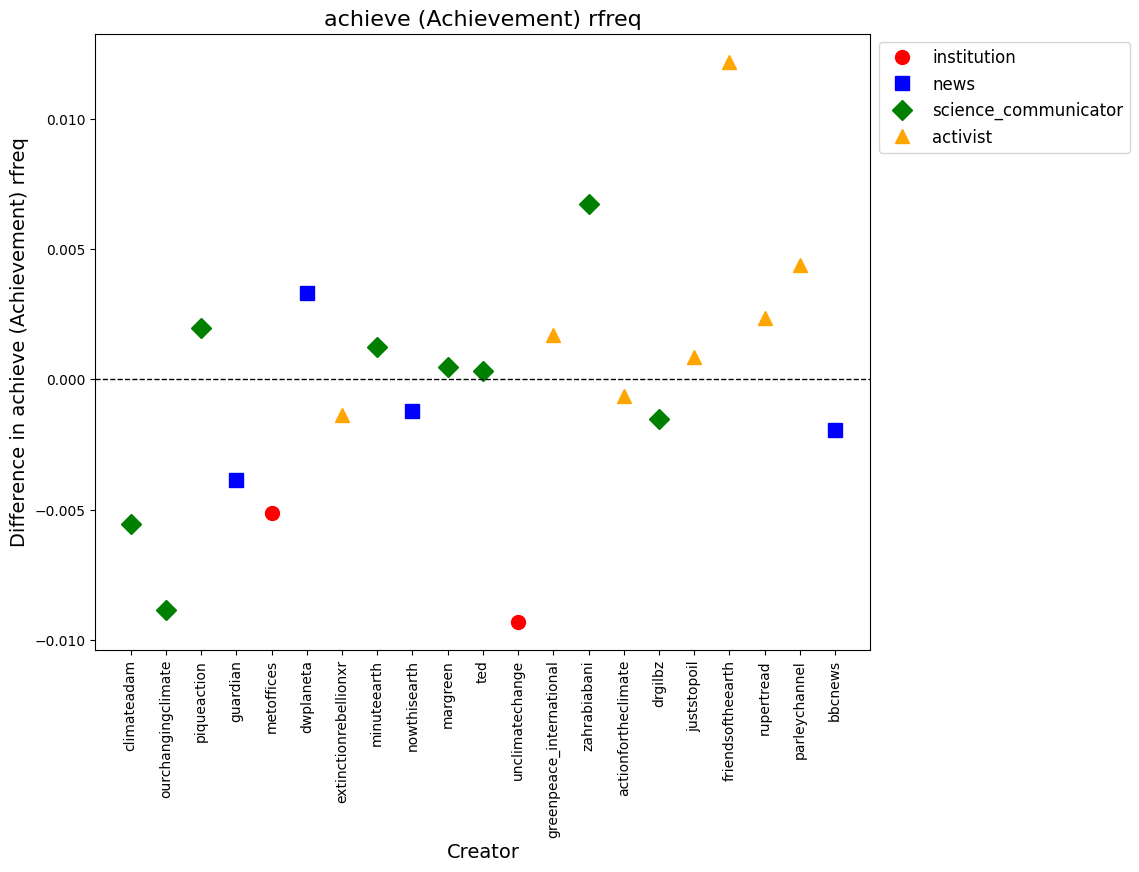

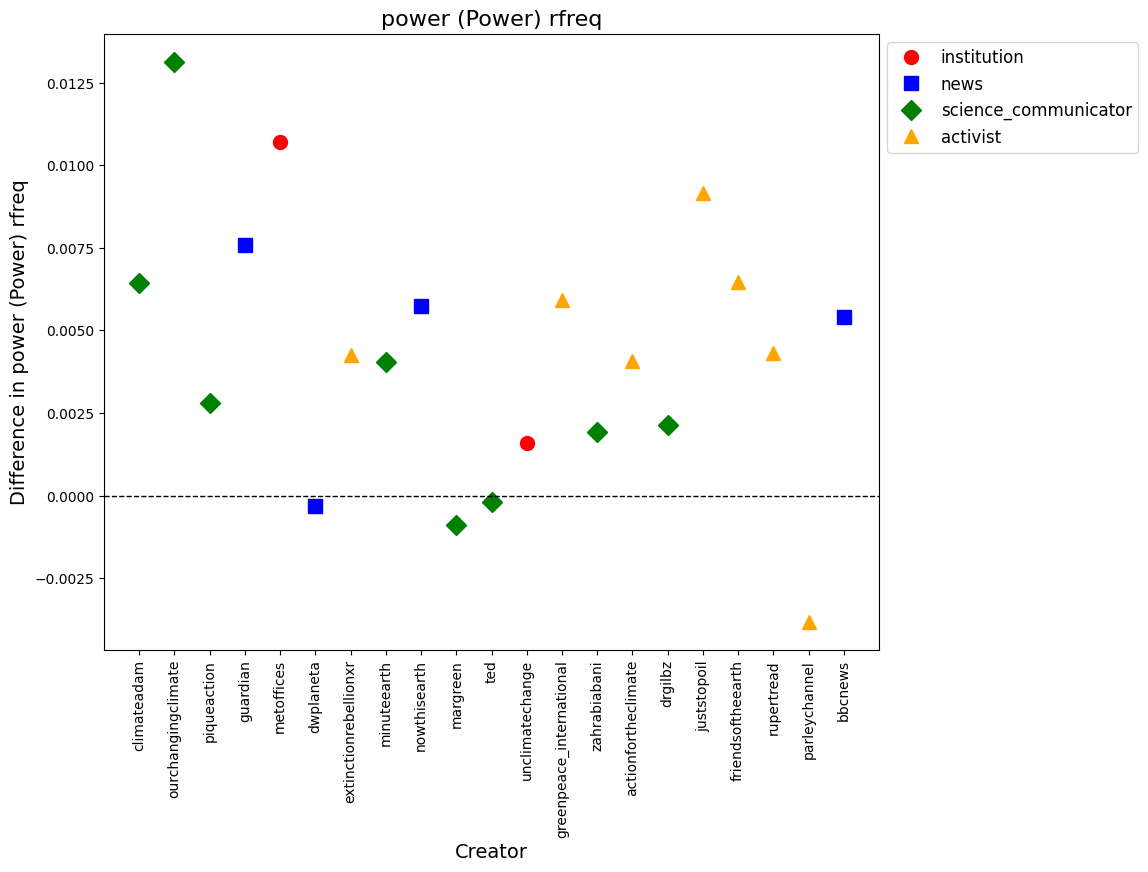

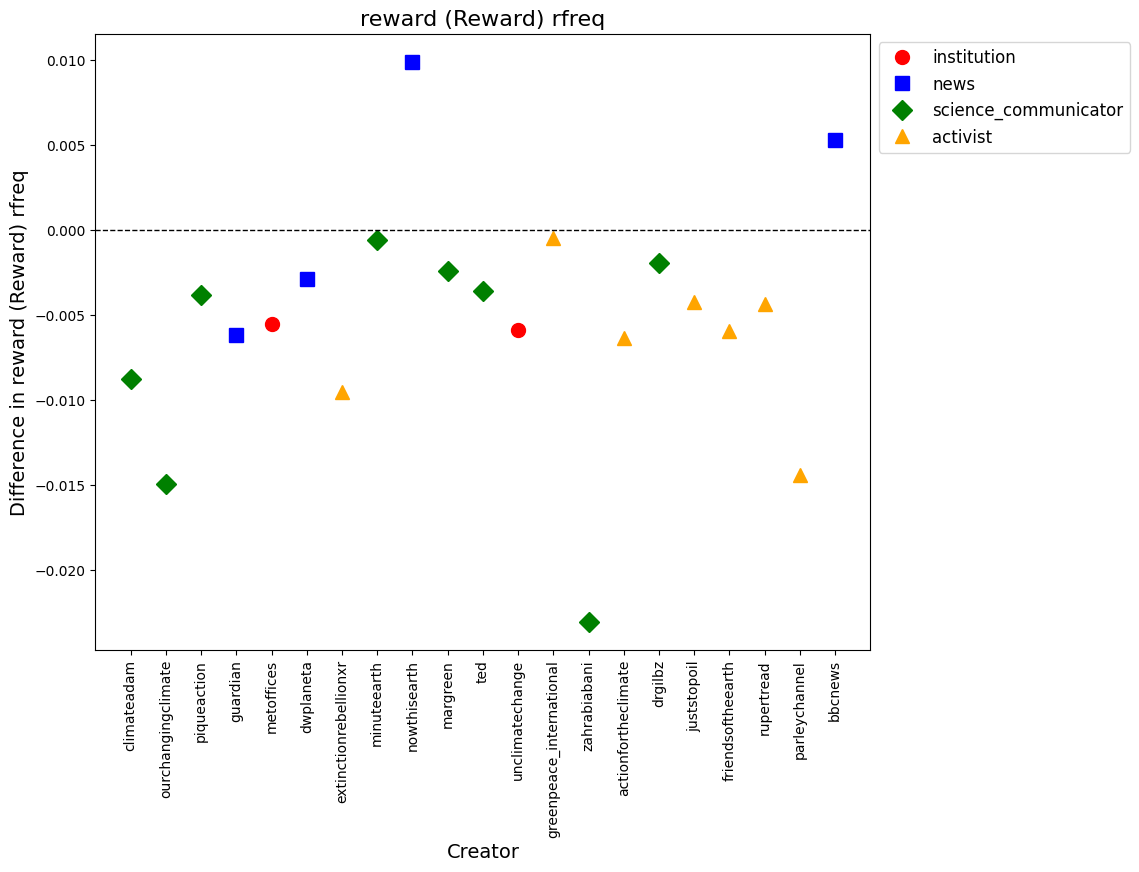

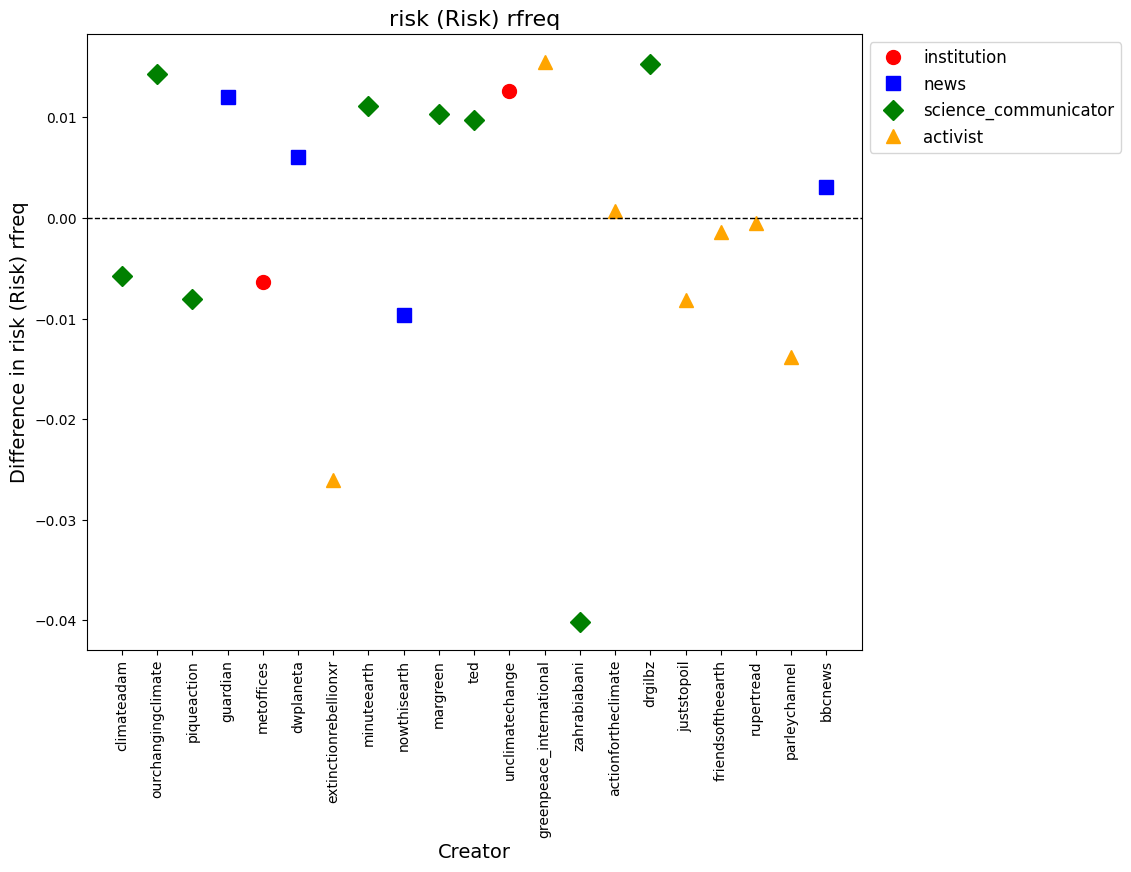

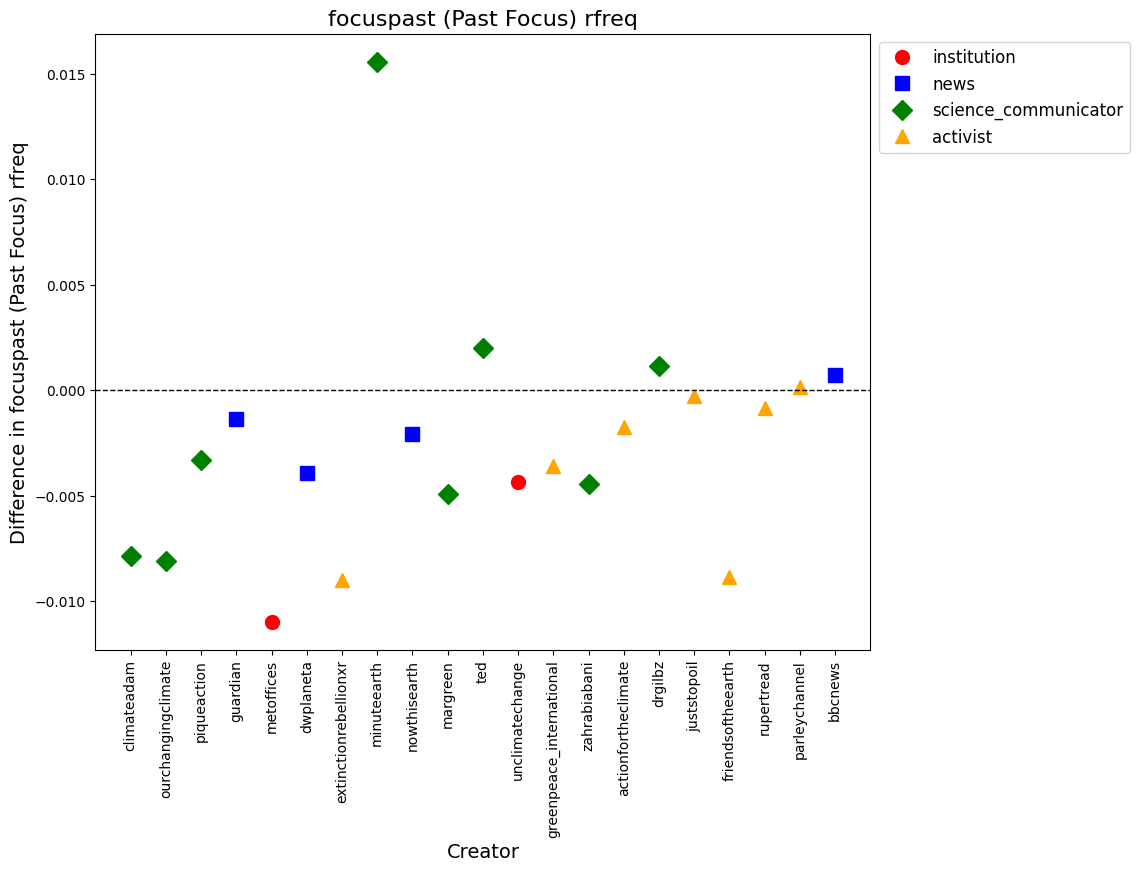

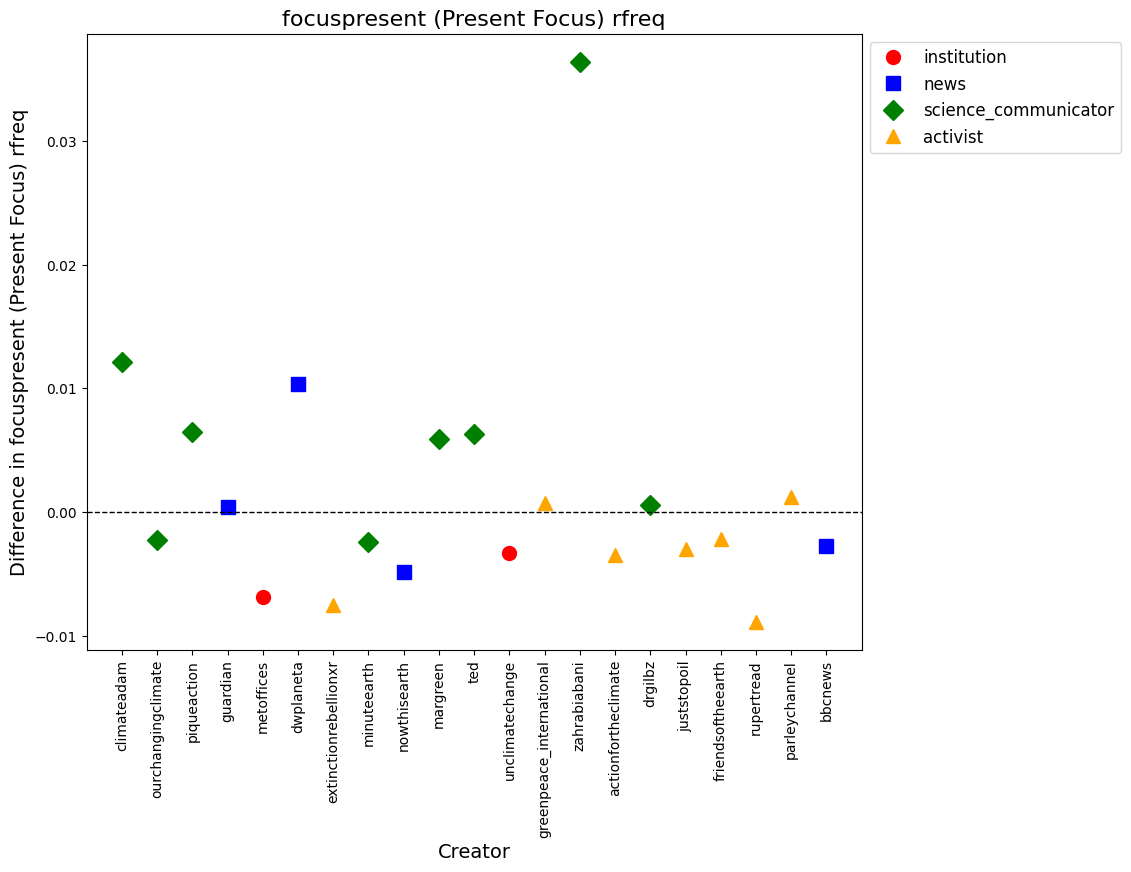

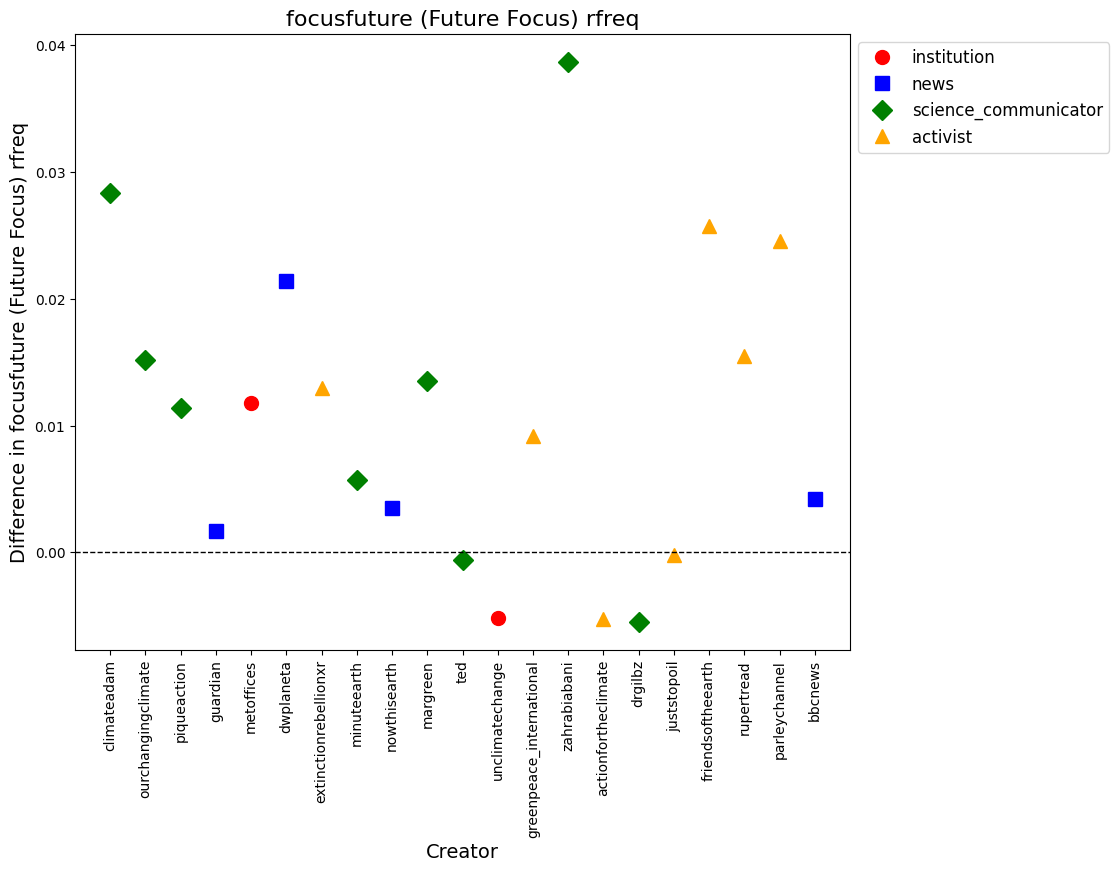

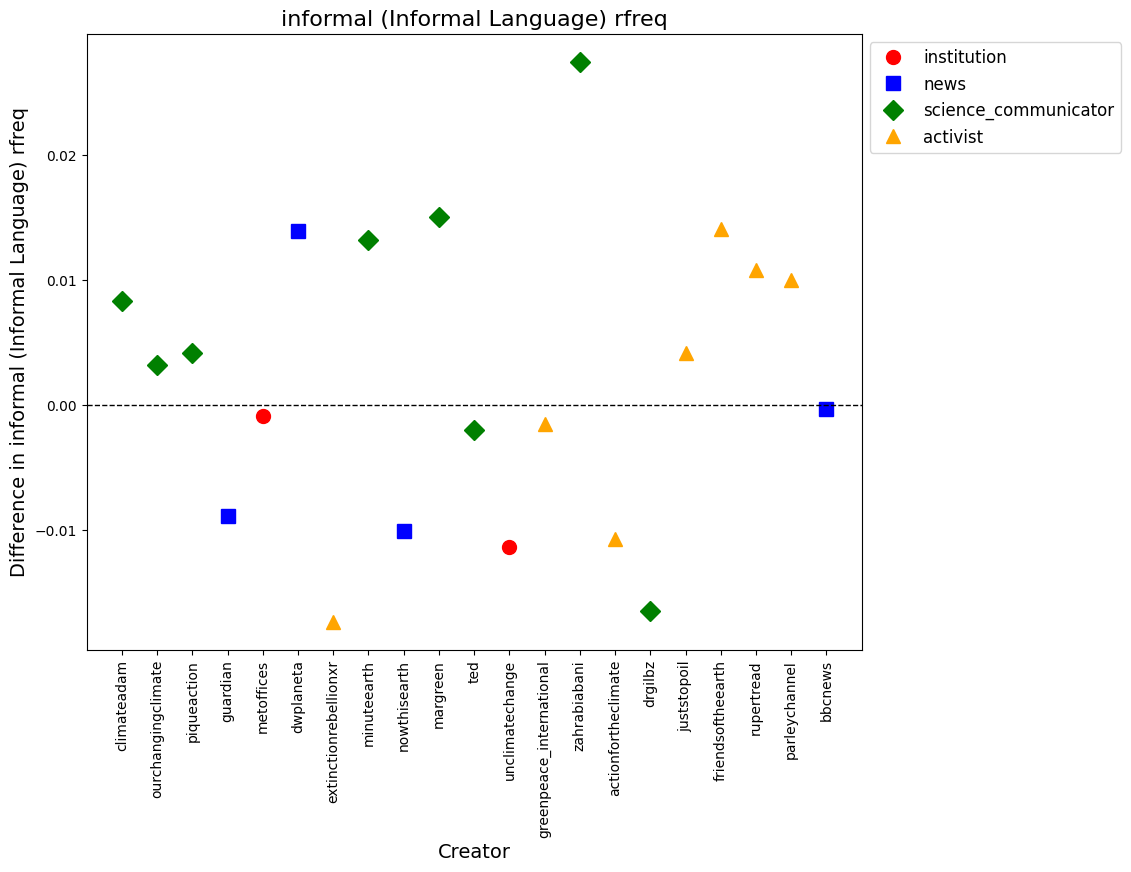

In [24]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]
list_markers = ["o", "s", "D", "^"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

# for each metric in list_differences_metric, plot the differences between TikTok and YouTube
for i in range(len(list_differences_metric)):
    fig, ax = plt.subplots(figsize=(10,8))
    # order creators by highest difference in dict_diff_centroids
    for creator in list_creators_ordered:
        # plot differences
        ax.plot(creator, dict_differences_content[creator][i], label=creator, color=list_colors[list_types.index(dict_type_creator[creator])], marker=list_markers[list_types.index(dict_type_creator[creator])], markersize=10, linewidth=2)
    
    # plot legend
    #ax.legend(None)
    # plot x-axis label
    ax.set_xlabel("Creator", fontsize=14)
    # plot y-axis label
    ax.set_ylabel("Difference in "+list_differences_metric[i], fontsize=14)

    # legend with type of creator
    # create legend
    legend_elements = []
    for j in range(len(list_types)):
        legend_elements.append(plt.Line2D([0], [0], marker=list_markers[j], color=list_colors[j], label=list_types[j], markersize=10, linewidth=0))
    # plot legend
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    # add horizontal line at 0
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    # rotate x-axis labels
    plt.xticks(rotation=90)

    # plot title
    ax.set_title(list_differences_metric[i], fontsize=16)

    plt.show()


### Boxplot

In [26]:
list_differences_metric

['anger',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'avg_emotion',
 'negative',
 'positive',
 'avg_I_we',
 'avg_I_other',
 'moral_care_rfreq',
 'moral_fairness_rfreq',
 'moral_loyalty_rfreq',
 'moral_authority_rfreq',
 'moral_purity_rfreq',
 'affect (Affect) rfreq',
 'posemo (Positive Emotions) rfreq',
 'negemo (Negative Emotions) rfreq',
 'anx (Anx) rfreq',
 'anger (Anger) rfreq',
 'sad (Sad) rfreq',
 'social (Social) rfreq',
 'affiliation (Affiliation) rfreq',
 'achieve (Achievement) rfreq',
 'power (Power) rfreq',
 'reward (Reward) rfreq',
 'risk (Risk) rfreq',
 'focuspast (Past Focus) rfreq',
 'focuspresent (Present Focus) rfreq',
 'focusfuture (Future Focus) rfreq',
 'informal (Informal Language) rfreq',
 'compound_sentimentality',
 'sentiment_score']

In [27]:
print(len(dict_differences_content["unclimatechange"]), len(list_differences_metric))

KeyError: 'unclimatechange'

In [15]:
# load dictionary_more
with open("dictionary_popularity.pkl", "rb") as f:
    dict_popularity = pickle.load(f)

Subplots with institution type

In [18]:
plt.rcParams["font.family"] = "sans-serif"

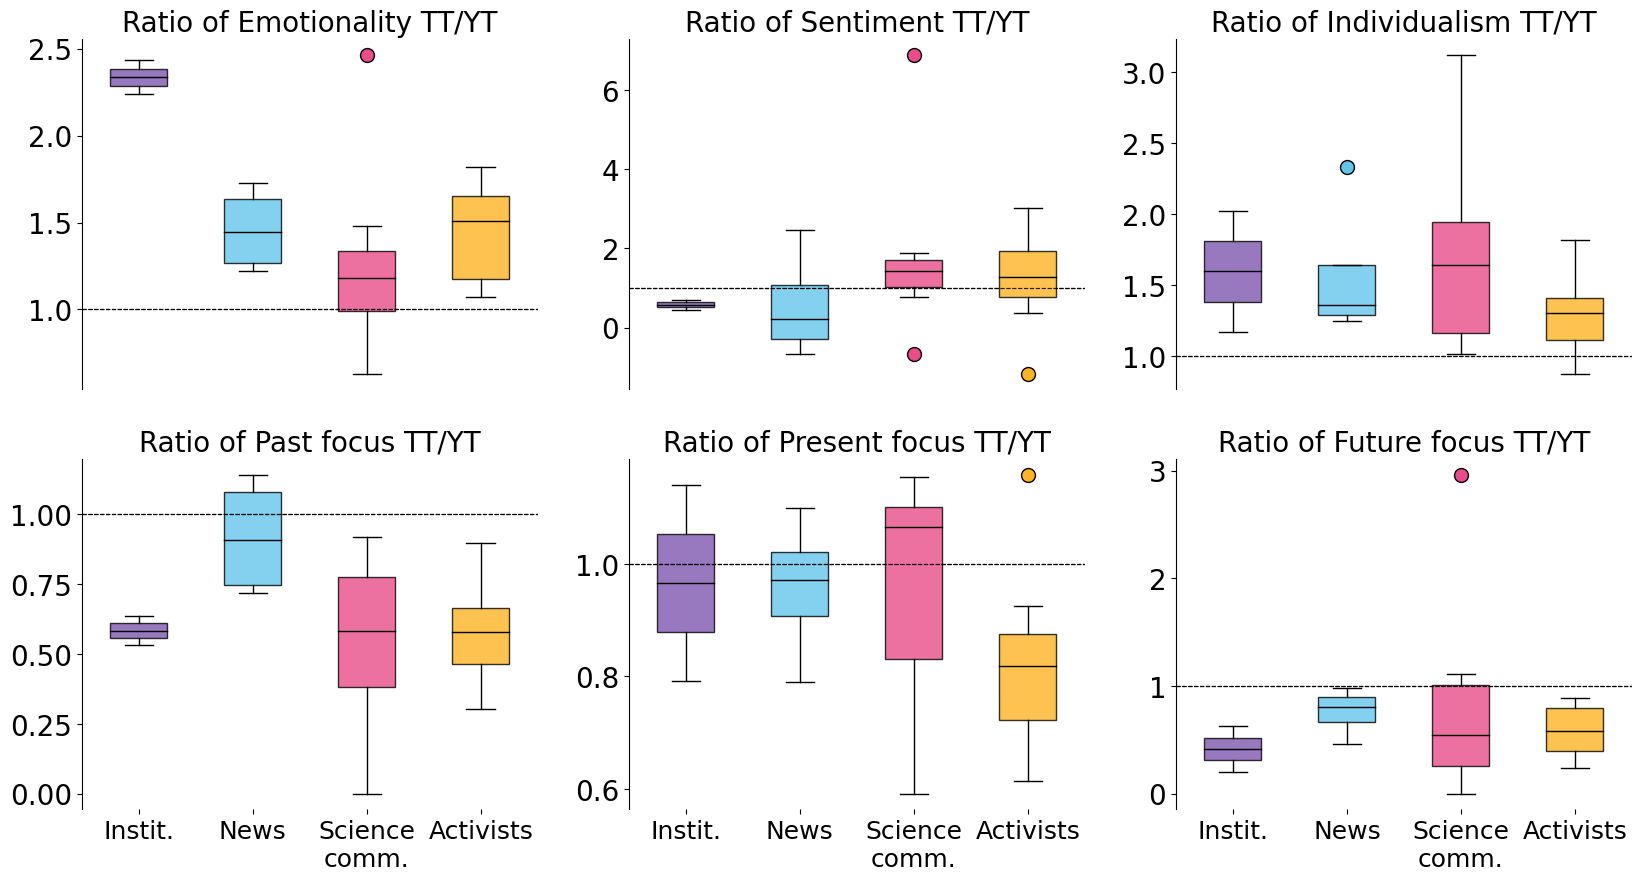

In [19]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Instit.", "News", "Science\ncomm.", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

list_metrics = ["avg_emotion", "sentiment_score", "avg_I_other", "focuspast (Past Focus) rfreq", "focuspresent (Present Focus) rfreq", "focusfuture (Future Focus) rfreq"]
list_metrics_names = ["Emotionality", "Sentiment", "Individualism", "Past focus", "Present focus", "Future focus"]

# subplots of differences in metrics by creator type, 2x3
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# remove grid
for ax in axs.flat:
    ax.grid(False)

for i in range(len(list_metrics)):

    #get index of metric in list_differences_metric
    index_metric = list_differences_metric.index(list_metrics[i])

    for type in list_types:
        # get creators of type
        list_creators_type = []
        for creator in list_creators_ordered:
            if dict_type_creator[creator] == type:
                list_creators_type.append(creator)

        # get metric values of creators of type
        list_metric = []
        for creator in list_creators_type:
            list_metric.append(dict_differences_content[creator][index_metric])
            
        # boxplot with plt (axs[i//3, i%3])
        axs[i//3, i%3].boxplot(list_metric, positions=[list_types.index(type)], widths=0.5, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), flierprops=dict(markerfacecolor=list_colors[list_types.index(type)], marker='o', markersize=10, linestyle='none'))

        # set alpha for boxplot
        for patch in axs[i//3, i%3].patches:
            patch.set_alpha(0.8)
            # set black border
            patch.set_edgecolor("black")

        # xticks with type names (not numbers) only for bottom plots
        if i//3 == 1:
            axs[i//3, i%3].set_xticks(range(len(list_types)))
            axs[i//3, i%3].set_xticklabels(list_names_types, rotation=0)
            axs[i//3, i%3].tick_params(axis='x', labelsize=18)
            # plot x-axis label
            #axs[i//3, i%3].set_xlabel("Creator type", fontsize=20)
        else:
            axs[i//3, i%3].set_xticks([])

        # y ticks size
        axs[i//3, i%3].tick_params(axis='y', labelsize=20)

    
        # horizontal line at 1
        axs[i//3, i%3].axhline(y=1, color='black', linestyle='--', linewidth=0.8, alpha=0.8)

        # set title
        axs[i//3, i%3].set_title("Ratio of "+list_metrics_names[i]+" TT/YT", fontsize=20)

        # remove spines except left one
        axs[i//3, i%3].spines['right'].set_visible(False)
        axs[i//3, i%3].spines['top'].set_visible(False)
        axs[i//3, i%3].spines['bottom'].set_visible(False)

# save as pdf
plt.savefig("difference_language_creatortype.pdf", bbox_inches='tight')

With all content instead of avg. by creator

109


ValueError: supplied range of [0.0, inf] is not finite

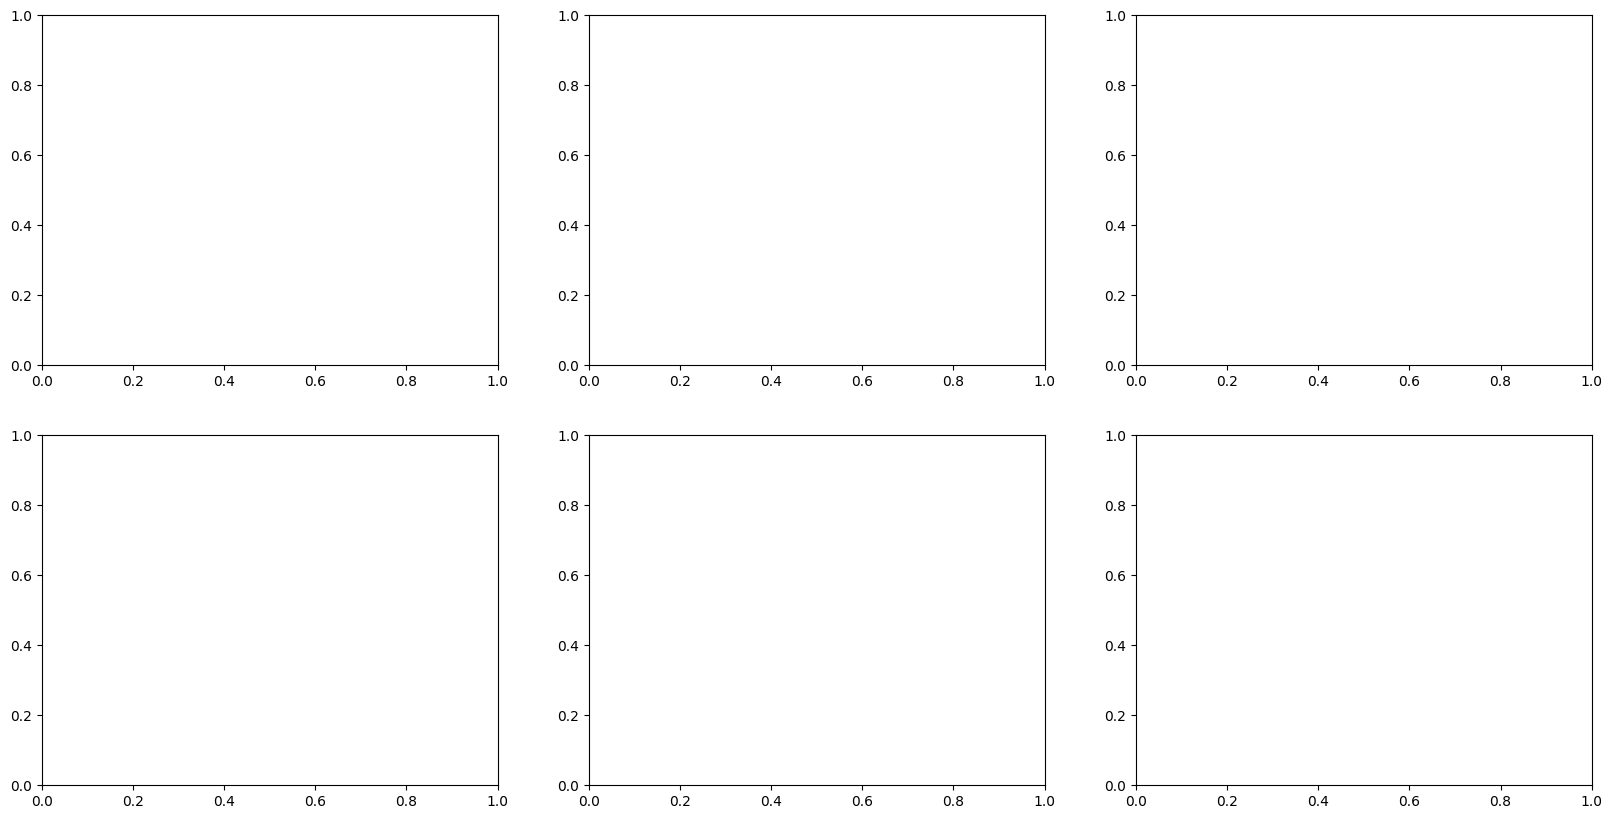

In [48]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Instit.", "News", "Science\ncomm.", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

list_metrics = ["emotionality", "sentiment", "individualism", "past-focus", "present-focus", "future-focus"]
list_metrics_names = ["Emotionality", "Sentiment", "Individualism", "Past focus", "Present focus", "Future focus"]

# subplots of differences in metrics by creator type, 2x3
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# remove grid
for ax in axs.flat:
    ax.grid(False)

for i in range(len(list_metrics)):

    for type in list_types:

        print(len(dict_differences_content[type][list_metrics[i]]))
            
        # plot histogram with plt (axs[i//3, i%3])
        axs[i//3, i%3].hist(dict_differences_content[type][list_metrics[i]], bins=20, color=list_colors[list_types.index(type)], alpha=0.8)
        
        # set alpha for boxplot
        for patch in axs[i//3, i%3].patches:
            patch.set_alpha(0.8)
            # set black border
            patch.set_edgecolor("black")

        # xticks with type names (not numbers) only for bottom plots
        if i//3 == 1:
            axs[i//3, i%3].set_xticks(range(len(list_types)))
            axs[i//3, i%3].set_xticklabels(list_names_types, rotation=0)
            axs[i//3, i%3].tick_params(axis='x', labelsize=18)
            # plot x-axis label
            #axs[i//3, i%3].set_xlabel("Creator type", fontsize=20)
        else:
            axs[i//3, i%3].set_xticks([])

        # y ticks size
        axs[i//3, i%3].tick_params(axis='y', labelsize=20)

    
        # horizontal line at 1
        axs[i//3, i%3].axhline(y=1, color='black', linestyle='--', linewidth=0.8, alpha=0.8)

        # set title
        axs[i//3, i%3].set_title("Ratio of "+list_metrics_names[i]+" TT/YT", fontsize=20)

        # remove spines except left one
        axs[i//3, i%3].spines['right'].set_visible(False)
        axs[i//3, i%3].spines['top'].set_visible(False)
        axs[i//3, i%3].spines['bottom'].set_visible(False)

plt.show()

# save as pdf
#plt.savefig("difference_language_creatortype.pdf", bbox_inches='tight')

Subplots with popularity group

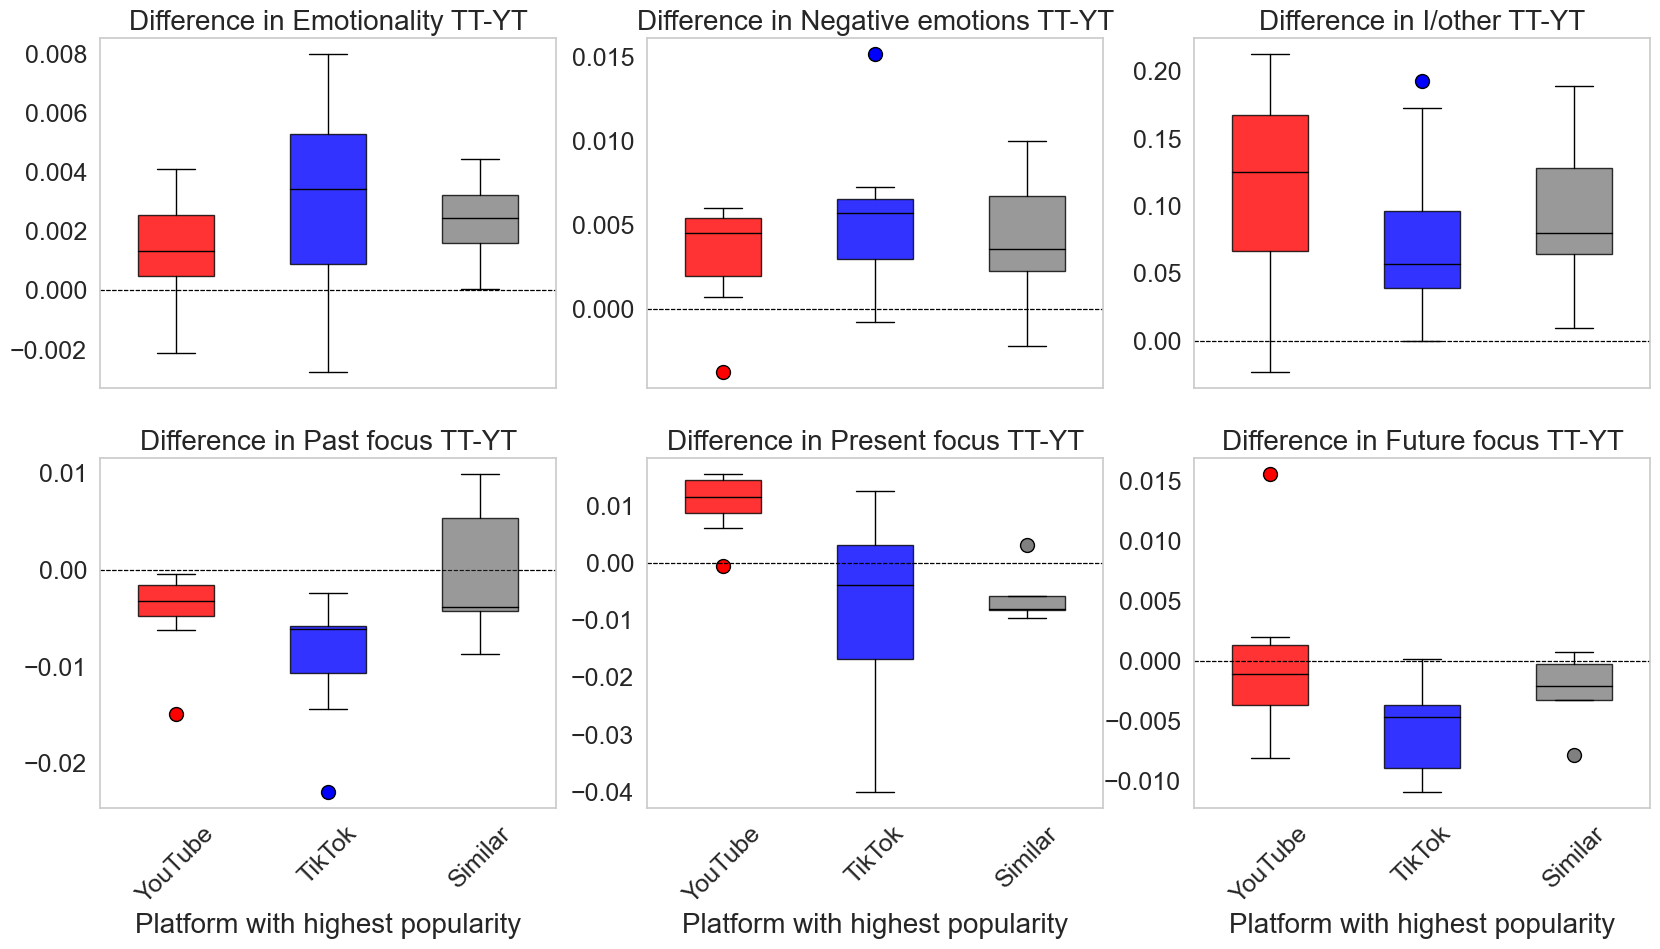

In [277]:
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

list_metrics = ["avg_emotion", "negemo (Negative Emotions) rfreq", "avg_I_other", "focuspast (Past Focus) rfreq", "focuspresent (Present Focus) rfreq", "focusfuture (Future Focus) rfreq"]
list_metrics_names = ["Emotionality", "Negative emotions", "I/other", "Past focus", "Present focus", "Future focus"]

# subplots of differences in metrics by creator type, 2x3
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# remove grid
for ax in axs.flat:
    ax.grid(False)

for i in range(len(list_metrics)):

    #get index of metric in list_differences_metric
    index_metric = list_differences_metric.index(list_metrics[i])

    for type in list_types:
        # get creators of type
        list_creators_type = []
        for creator in list_creators_ordered:
            if dict_popularity[creator] == type:
                list_creators_type.append(creator)

        # get metric values of creators of type
        list_metric = []
        for creator in list_creators_type:
            list_metric.append(dict_differences_content[creator][index_metric])
        
        # boxplot with plt (axs[i//3, i%3])
        axs[i//3, i%3].boxplot(list_metric, positions=[list_types.index(type)], widths=0.5, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), flierprops=dict(markerfacecolor=list_colors[list_types.index(type)], marker='o', markersize=10, linestyle='none'))

        # set alpha for boxplot
        for patch in axs[i//3, i%3].patches:
            patch.set_alpha(0.8)
            # set black border
            patch.set_edgecolor("black")

        # xticks with type names (not numbers) only for bottom plots
        if i//3 == 1:
            axs[i//3, i%3].set_xticks(range(len(list_types)))
            axs[i//3, i%3].set_xticklabels(list_names_types, rotation=45)
            axs[i//3, i%3].tick_params(axis='x', labelsize=18)
            # add x axis label
            axs[i//3, i%3].set_xlabel("Platform with highest popularity", fontsize=20)
        else:
            axs[i//3, i%3].set_xticks([])

        # y ticks size
        axs[i//3, i%3].tick_params(axis='y', labelsize=18)

    
        # horizontal line at 0
        axs[i//3, i%3].axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.8)

        # set title
        axs[i//3, i%3].set_title("Difference in "+list_metrics_names[i]+" TT-YT", fontsize=20)

Subplots generic

Text(0.5, 1.0, 'Difference in emotionality between TT and YT by creator type')

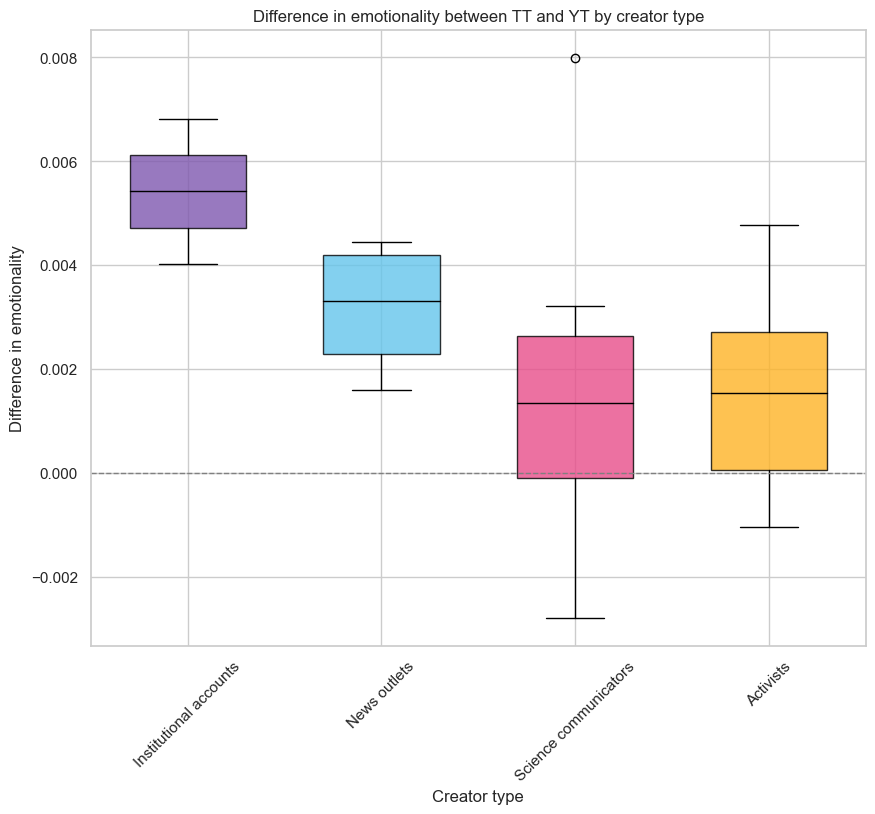

In [141]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "avg_emotion"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in emotionality")
plt.xlabel("Creator type")
plt.title("Difference in emotionality between TT and YT by creator type")



Text(0.5, 1.0, 'Difference in emotionality between TT and YT by Popularity')

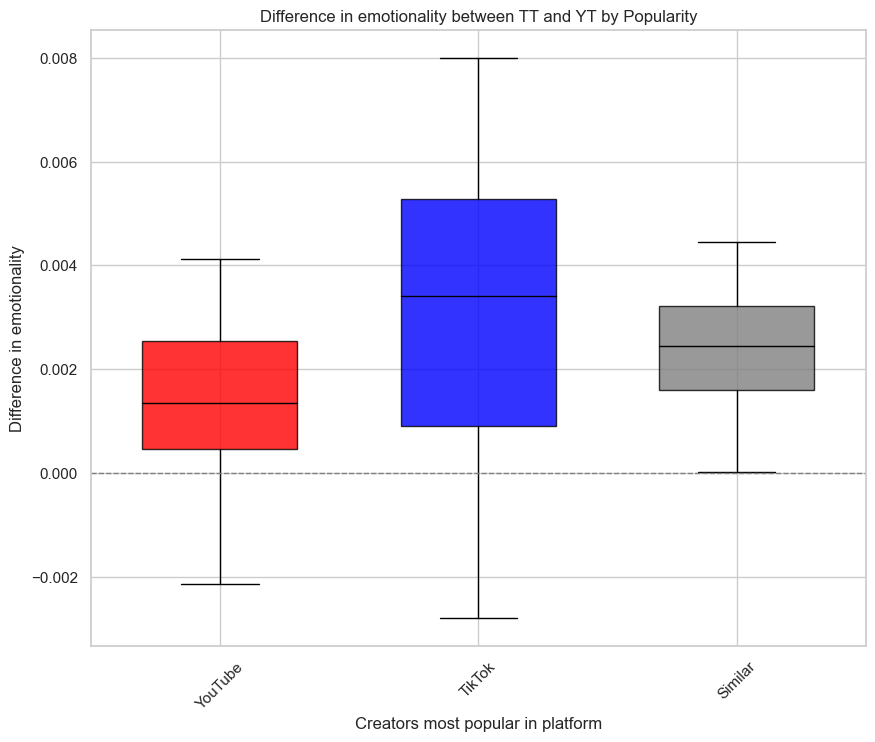

In [124]:
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "avg_emotion"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_popularity[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in emotionality")
plt.xlabel("Creators most popular in platform")
plt.title("Difference in emotionality between TT and YT by Popularity")



Text(0.5, 1.0, 'Difference in negative emotions between TT and YT by creator type')

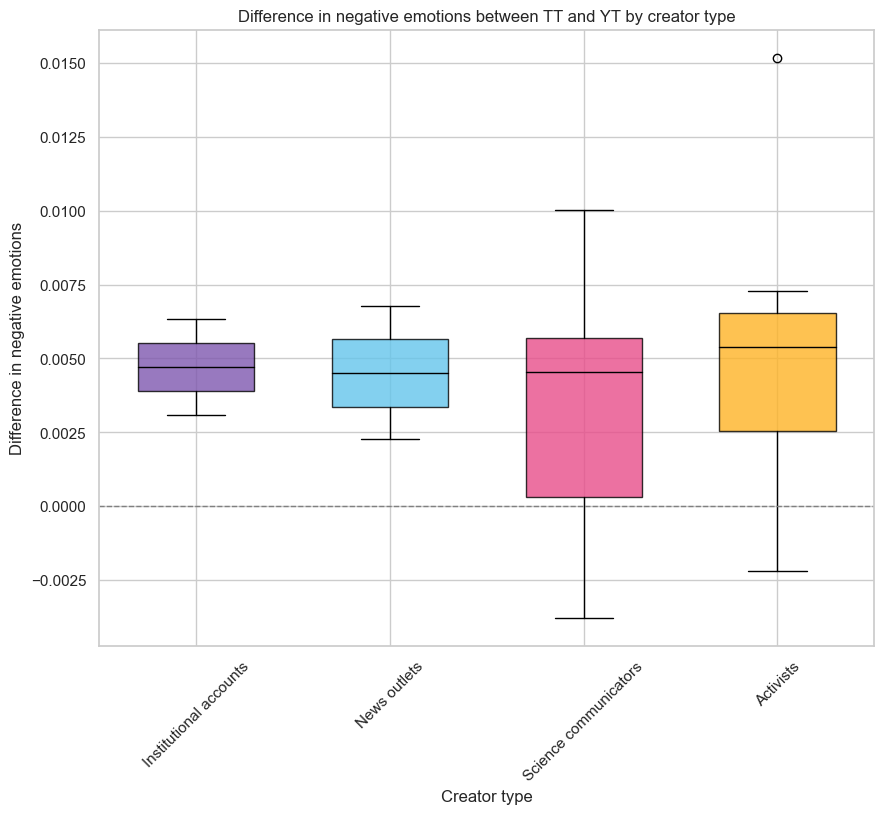

In [125]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "negemo (Negative Emotions) rfreq"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in negative emotions")
plt.xlabel("Creator type")
plt.title("Difference in negative emotions between TT and YT by creator type")



Text(0.5, 1.0, 'Difference in negative emotions between TT and YT by Popularity')

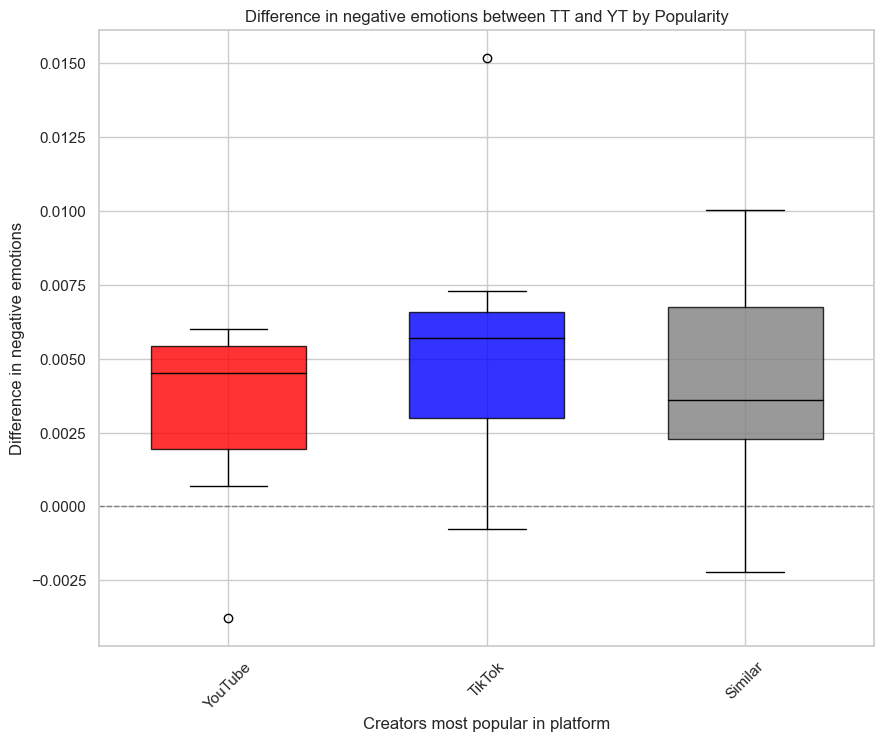

In [105]:
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "negemo (Negative Emotions) rfreq"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_popularity[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in negative emotions")
plt.xlabel("Creators most popular in platform")
plt.title("Difference in negative emotions between TT and YT by Popularity")



Text(0.5, 1.0, 'Difference in self-centeredness between TT and YT by creator type')

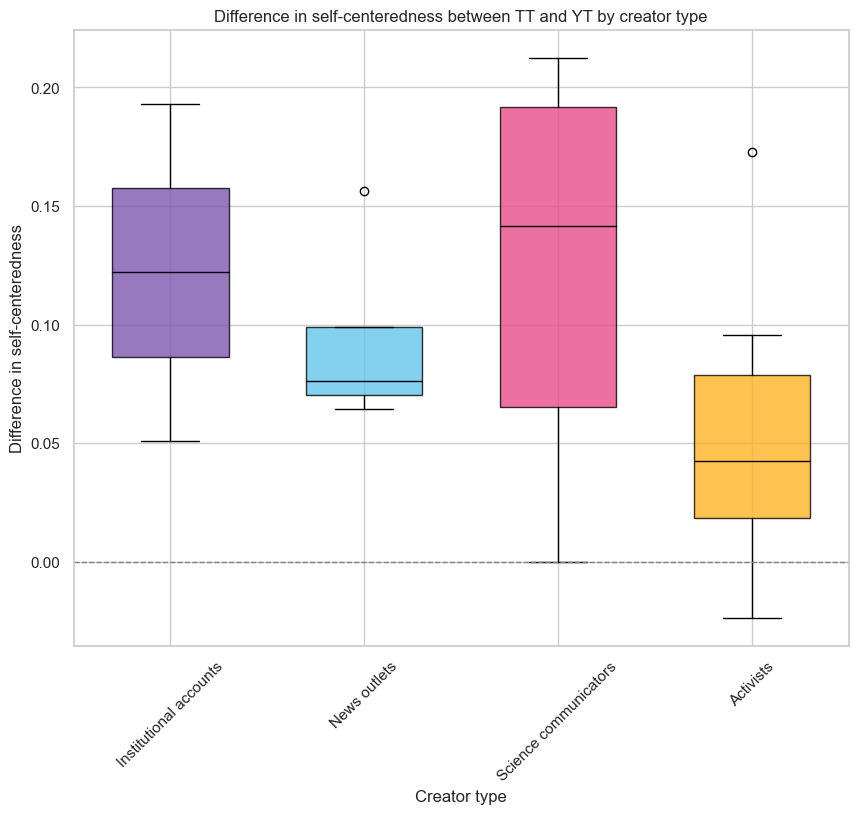

In [126]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "avg_I_other"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in self-centeredness")
plt.xlabel("Creator type")
plt.title("Difference in self-centeredness between TT and YT by creator type")



Text(0.5, 1.0, 'Difference in self-centeredness between TT and YT by Popularity')

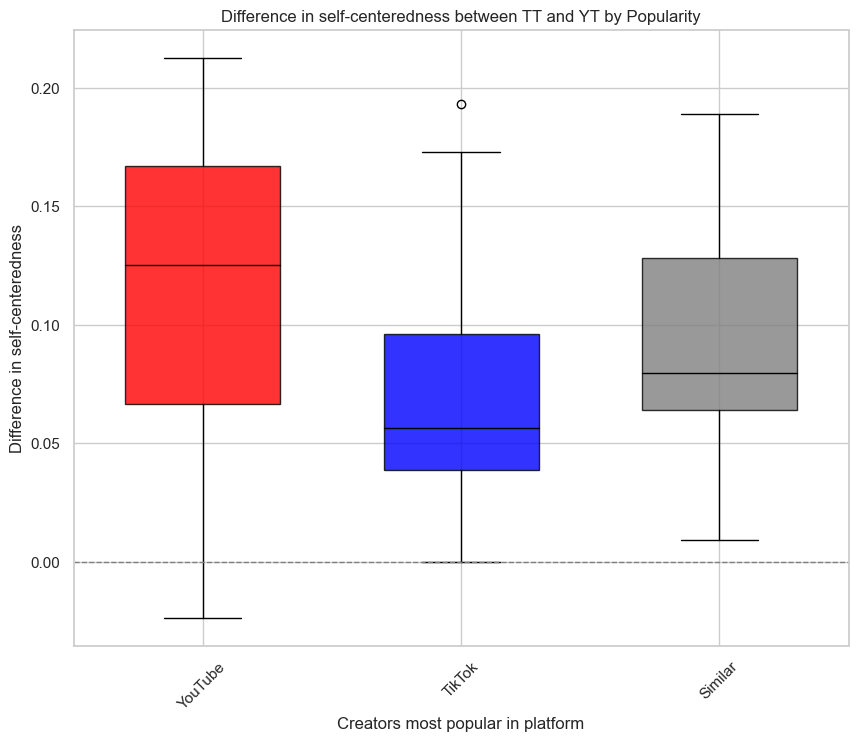

In [106]:
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "avg_I_other"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_popularity[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in self-centeredness")
plt.xlabel("Creators most popular in platform")
plt.title("Difference in self-centeredness between TT and YT by Popularity")



Text(0.5, 1.0, 'Difference in past between TT and YT by Popularity')

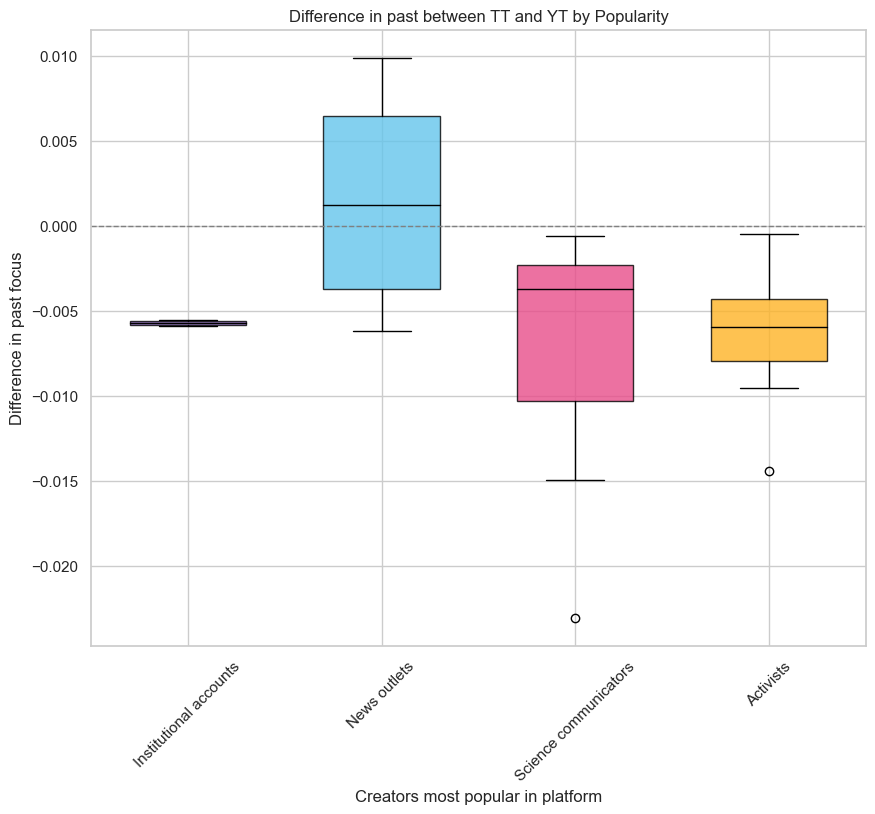

In [127]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "focuspast (Past Focus) rfreq"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in past focus")
plt.xlabel("Creators most popular in platform")
plt.title("Difference in past between TT and YT by Popularity")



Text(0.5, 1.0, 'Difference in past focus between TT and YT by creator type')

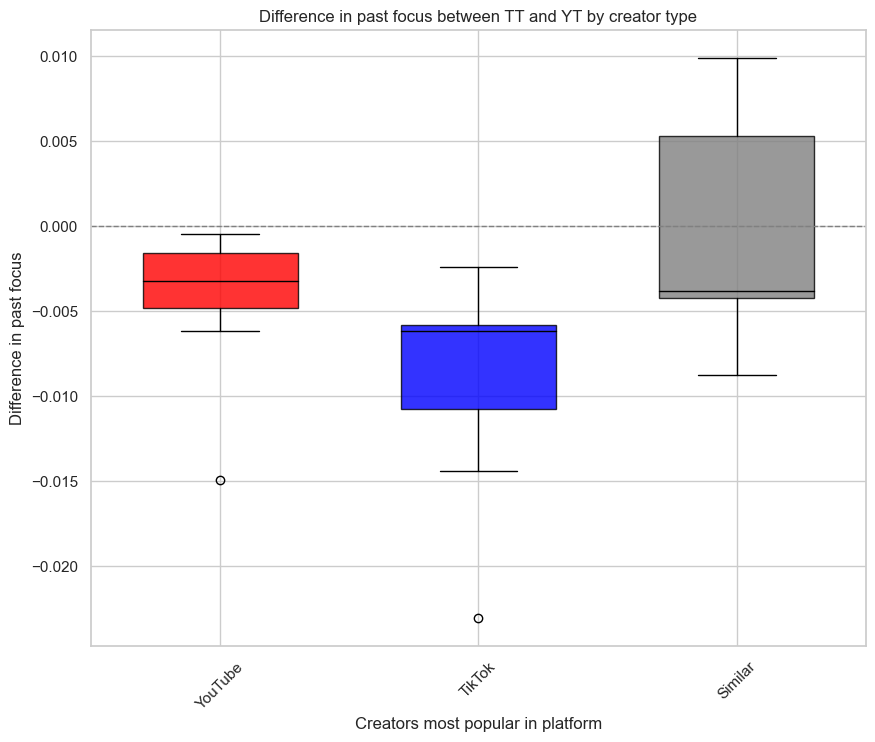

In [128]:
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "focuspast (Past Focus) rfreq"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_popularity[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in past focus")
plt.xlabel("Creators most popular in platform")
plt.title("Difference in past focus between TT and YT by creator type")



Text(0.5, 1.0, 'Difference in present focus between TT and YT by creator type')

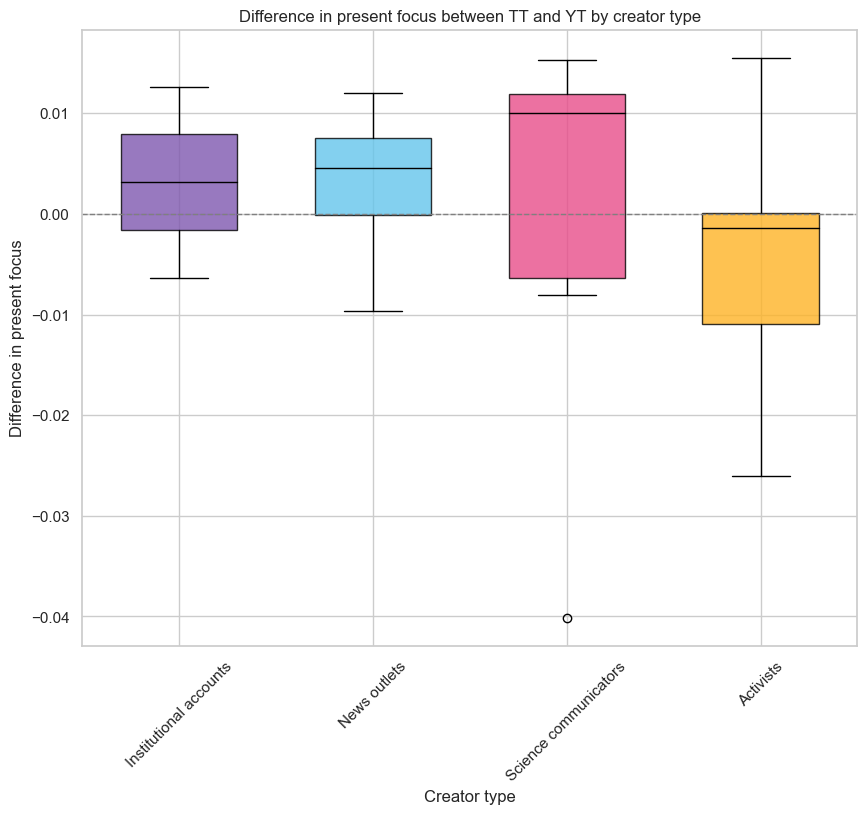

In [129]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "focuspresent (Present Focus) rfreq"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in present focus")
plt.xlabel("Creator type")
plt.title("Difference in present focus between TT and YT by creator type")



Text(0.5, 1.0, 'Difference in present focus between TT and YT by creator type')

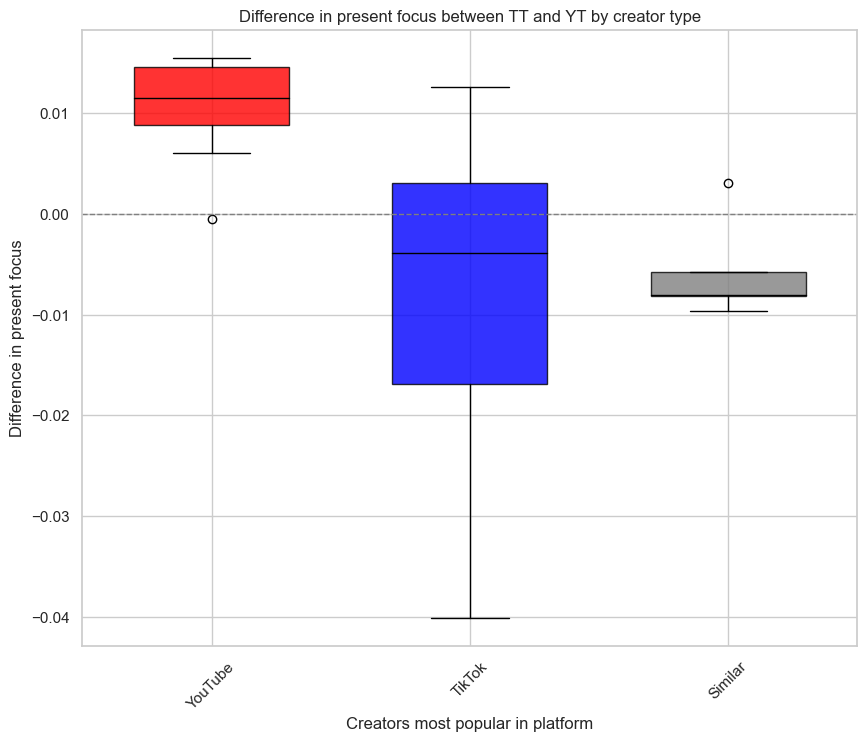

In [130]:
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "focuspresent (Present Focus) rfreq"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_popularity[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in present focus")
plt.xlabel("Creators most popular in platform")
plt.title("Difference in present focus between TT and YT by creator type")



Text(0.5, 1.0, 'Difference in future focus between TT and YT by creator type')

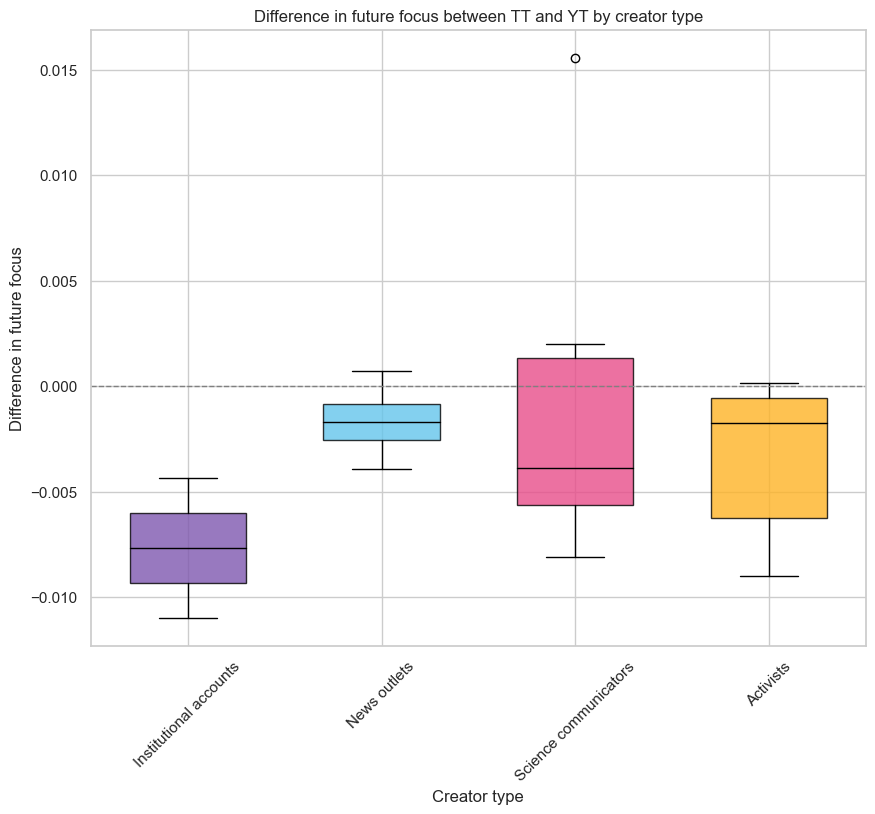

In [131]:
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "focusfuture (Future Focus) rfreq"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_type_creator[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in future focus")
plt.xlabel("Creator type")
plt.title("Difference in future focus between TT and YT by creator type")



Text(0.5, 1.0, 'Difference in future focus between TT and YT by Popularity')

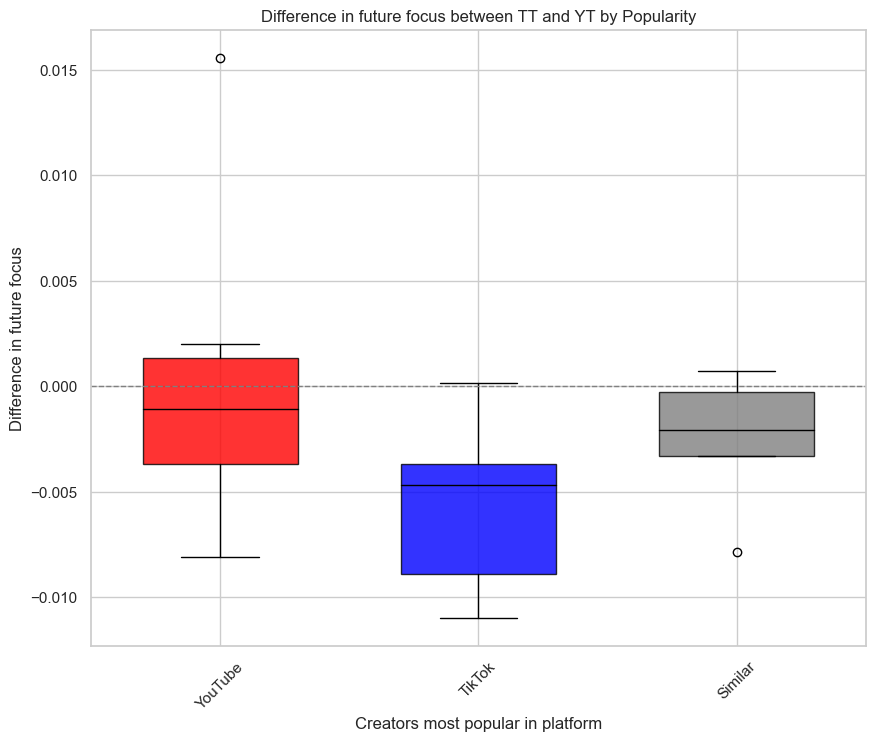

In [132]:
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# order creators by highest difference in dict_diff_centroids
# sort diff_centroids by diff_centroids
diff_centroids = diff_centroids.sort_values(by="diff_centroids", ascending=False)
list_creators_ordered = diff_centroids["creator"].tolist()

metric = "focusfuture (Future Focus) rfreq"

# boxplot of metric by creator type (4 boxplots)
plt.figure(figsize=(10, 8))

for type in list_types:
    # get creators of type
    list_creators_type = []
    for creator in list_creators_ordered:
        if dict_popularity[creator] == type:
            list_creators_type.append(creator)

    # get metric values of creators of type
    list_metric = []
    for creator in list_creators_type:
        list_metric.append(dict_differences_content[creator][list_differences_metric.index(metric)])
    
    # boxplot
    plt.boxplot(list_metric, positions=[list_types.index(type)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=list_colors[list_types.index(type)], color=list_colors[list_types.index(type)]), medianprops=dict(color="black"), whiskerprops=dict(color=list_colors[list_types.index(type)]), capprops=dict(color=list_colors[list_types.index(type)]))
    
# set alpha for boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.8)
    # add contours to boxplot
    patch.set_edgecolor("black")
    # whiskers color black
    plt.setp(plt.gca().get_lines(), color='black')

# horizontal line at 0
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)


plt.xticks(range(len(list_types)), list_names_types, rotation=45)
plt.ylabel("Difference in future focus")
plt.xlabel("Creators most popular in platform")
plt.title("Difference in future focus between TT and YT by Popularity")



### Other older plots 

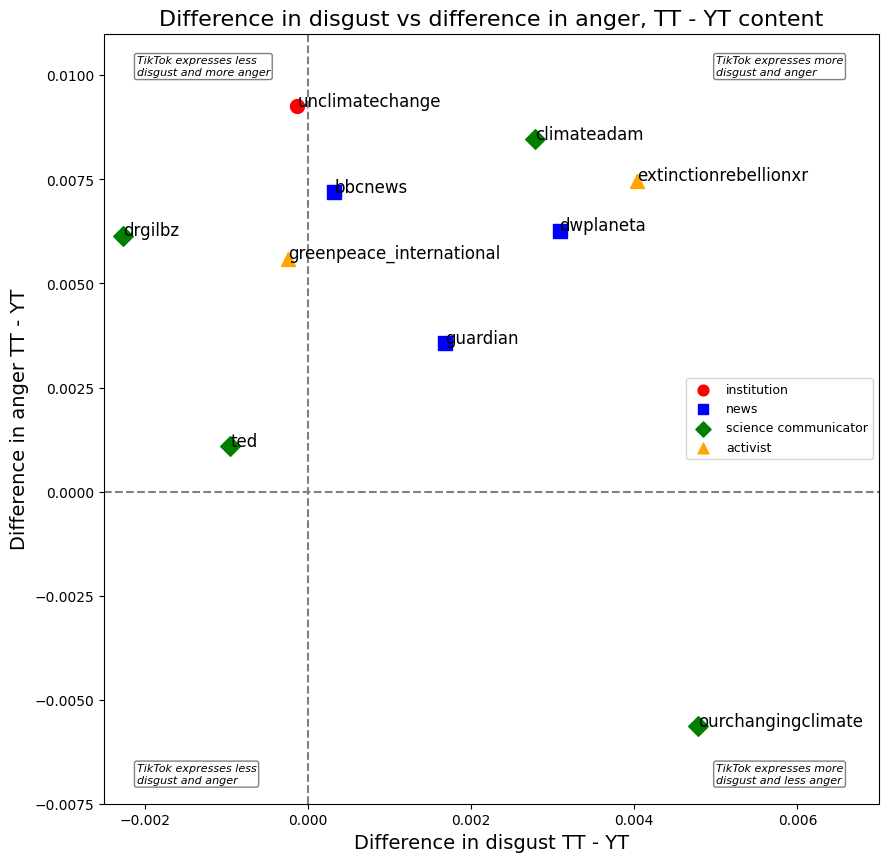

In [59]:
# scatterplot with difference in I_we vs difference in avg_emotion, given dict_differences
list_creators = ["unclimatechange", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]
list_markers = ["o", "s", "D", "^"]

index_metric_x = 1
index_metric_y = 0
metric_y = list_differences_metric[index_metric_y]
metric_x = list_differences_metric[index_metric_x]

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(list_creators)):
    creator = list_creators[i]
    type = dict_type_creator[creator]
    color = list_colors[list_types.index(type)]
    marker = list_markers[list_types.index(type)]
    ax.scatter(dict_differences_content[creator][index_metric_x], dict_differences_content[creator][index_metric_y], color=color, marker=marker, s=100)
    ax.annotate(creator, (dict_differences_content[creator][index_metric_x], dict_differences_content[creator][index_metric_y]), fontsize=12)

# add hline and vline at 0
ax.axhline(y=0, color="grey", linestyle="--")
ax.axvline(x=0, color="grey", linestyle="--")

ax.set_xlabel("Difference in "+metric_x+" TT - YT", fontsize=14)
ax.set_ylabel("Difference in "+metric_y+" TT - YT", fontsize=14)
ax.set_title("Difference in "+metric_x+" vs difference in "+metric_y+", TT - YT content", fontsize=16)
ax.grid(False)

# set xlim and ylim
ax.set_xlim(-0.0025, 0.007)
ax.set_ylim(-0.0075, 0.011)

# annotate quadrants in italic, in a box
ax.annotate("TikTok expresses more\ndisgust and less anger", (0.005, -0.007), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok expresses more\ndisgust and anger", (0.005, 0.01), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok expresses less\ndisgust and more anger", (-0.0021, 0.01), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok expresses less\ndisgust and anger", (-0.0021, -0.007), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))

# add symbols legend
ax.scatter([], [], color="red", marker="o", s=60, label="institution")
ax.scatter([], [], color="blue", marker="s", s=60, label="news")
ax.scatter([], [], color="green", marker="D", s=60, label="science communicator")
ax.scatter([], [], color="orange", marker="^", s=60, label="activist")

ax.legend(loc="center right", fontsize=9)

plt.show()


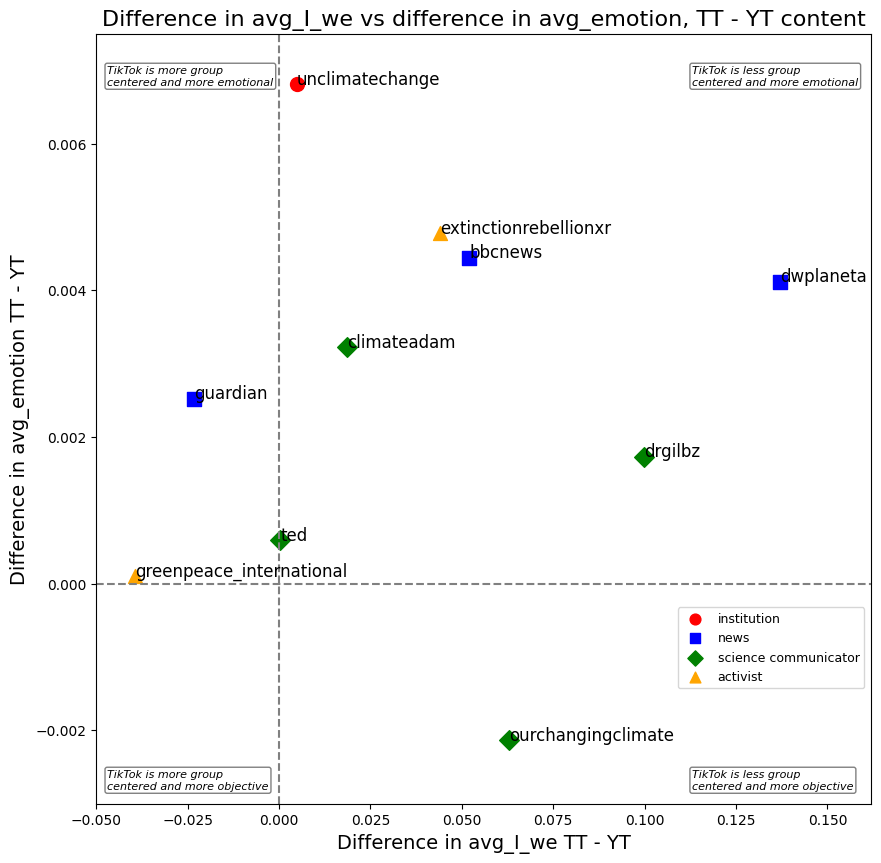

In [60]:
# scatterplot with difference in I_we vs difference in avg_emotion, given dict_differences
list_creators = ["unclimatechange", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]
list_markers = ["o", "s", "D", "^"]

index_metric_x = 9
index_metric_y = 6
metric_y = list_differences_metric[index_metric_y]
metric_x = list_differences_metric[index_metric_x]

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(list_creators)):
    creator = list_creators[i]
    type = dict_type_creator[creator]
    color = list_colors[list_types.index(type)]
    marker = list_markers[list_types.index(type)]
    ax.scatter(dict_differences_content[creator][index_metric_x], dict_differences_content[creator][index_metric_y], color=color, marker=marker, s=100)
    ax.annotate(creator, (dict_differences_content[creator][index_metric_x], dict_differences_content[creator][index_metric_y]), fontsize=12)

# add hline and vline at 0
ax.axhline(y=0, color="grey", linestyle="--")
ax.axvline(x=0, color="grey", linestyle="--")

ax.set_xlabel("Difference in "+metric_x+" TT - YT", fontsize=14)
ax.set_ylabel("Difference in "+metric_y+" TT - YT", fontsize=14)
ax.set_title("Difference in "+metric_x+" vs difference in "+metric_y+", TT - YT content", fontsize=16)
ax.grid(False)

# set xlim and ylim
ax.set_xlim(-0.05, 0.162)
ax.set_ylim(-0.003, 0.0075)

# annotate quadrants in italic, in a box
ax.annotate("TikTok is less group\ncentered and more objective", (0.113, -0.0028), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok is less group\ncentered and more emotional", (0.113, 0.0068), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok is more group\ncentered and more emotional", (-0.047, 0.0068), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok is more group\ncentered and more objective", (-0.047, -0.0028), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))

# add symbols legend
ax.scatter([], [], color="red", marker="o", s=60, label="institution")
ax.scatter([], [], color="blue", marker="s", s=60, label="news")
ax.scatter([], [], color="green", marker="D", s=60, label="science communicator")
ax.scatter([], [], color="orange", marker="^", s=60, label="activist")

# manually set position
ax.legend(loc=(0.75, 0.15), fontsize=9)

plt.show()


# Comments

In [61]:
tt_datadir = "./tiktok-opinion-dynamics/src/tiktok_opinion_dynamics/data/comments/creators/"
yt_datadir = "./youtube/data/comments/"

In [62]:
list_creators = ["unclimatechange", "nbcnews", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]

In [63]:
dict_differences_comments = {}   # key: creator, value: list of differences
# ignore warnings
warnings.filterwarnings("ignore")
for creator in list_creators:

    print("Creator: ", creator)
    
    # open tt and yt withemo files
    with open(tt_datadir+"all_comments_"+creator+"_withemo_2021-2023.pkl", "rb") as f:
        tt_withemo = pickle.load(f)

    with open(yt_datadir+creator+"_comments_withemo_2021-2023.pkl", "rb") as f:
        yt_withemo = pickle.load(f) 

    #replace "" with 0
    tt_withemo = tt_withemo.replace("", 0)
    yt_withemo = yt_withemo.replace("", 0)

    # compute average value of all emotions and assign to new column
    tt_withemo["avg_emotion"] = tt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)
    yt_withemo["avg_emotion"] = yt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)

    diff_anger = tt_withemo["anger"].mean() - yt_withemo["anger"].mean()
    diff_disgust = tt_withemo["disgust"].mean() - yt_withemo["disgust"].mean()
    diff_fear = tt_withemo["fear"].mean() - yt_withemo["fear"].mean()
    diff_joy = tt_withemo["joy"].mean() - yt_withemo["joy"].mean()
    diff_sadness = tt_withemo["sadness"].mean() - yt_withemo["sadness"].mean()
    diff_surprise = tt_withemo["surprise"].mean() - yt_withemo["surprise"].mean()
    diff_avg_emotion = tt_withemo["avg_emotion"].mean() - yt_withemo["avg_emotion"].mean()
    diff_negative = tt_withemo["negative"].mean() - yt_withemo["negative"].mean()
    diff_positive = tt_withemo["positive"].mean() - yt_withemo["positive"].mean()

    diff_avg_I_we = tt_withemo["I_we"].mean() - yt_withemo["I_we"].mean()
    diff_avg_I_other = tt_withemo["I_other"].mean() - yt_withemo["I_other"].mean()

    dict_differences_comments[creator] = [diff_anger, diff_disgust, diff_fear, diff_joy, diff_sadness, diff_surprise, diff_avg_emotion, diff_negative, diff_positive, diff_avg_I_we, diff_avg_I_other]

    # format in table
    print("Emotion \t TikTok \t YouTube \t Difference")
    print("anger \t\t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["anger"].mean(), yt_withemo["anger"].mean(), diff_anger))
    print("disgust \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["disgust"].mean(), yt_withemo["disgust"].mean(), diff_disgust))
    print("fear \t\t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["fear"].mean(), yt_withemo["fear"].mean(), diff_fear))
    print("joy \t\t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["joy"].mean(), yt_withemo["joy"].mean(), diff_joy))
    print("sadness \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["sadness"].mean(), yt_withemo["sadness"].mean(), diff_sadness))
    print("surprise \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["surprise"].mean(), yt_withemo["surprise"].mean(), diff_surprise))
    print("avg_emotion \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["avg_emotion"].mean(), yt_withemo["avg_emotion"].mean(), diff_avg_emotion))
    print("negative \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["negative"].mean(), yt_withemo["negative"].mean(), diff_negative))
    print("positive \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["positive"].mean(), yt_withemo["positive"].mean(), diff_positive))
    print("avg_I_we \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["I_we"].mean(), yt_withemo["I_we"].mean(), diff_avg_I_we))
    print("avg_I_other \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["I_other"].mean(), yt_withemo["I_other"].mean(), diff_avg_I_other))
    print("\n")


    # correlation between anger and disgust
    print("Correlation between anger and disgust")
    print("TikTok: ", tt_withemo["anger"].corr(tt_withemo["disgust"]))
    print("YouTube: ", yt_withemo["anger"].corr(yt_withemo["disgust"]))
    print("\n")


Creator:  unclimatechange
Emotion 	 TikTok 	 YouTube 	 Difference
anger 		 0.011 		 0.017 		 -0.006
disgust 	 0.008 		 0.016 		 -0.008
fear 		 0.011 		 0.016 		 -0.006
joy 		 0.016 		 0.033 		 -0.017
sadness 	 0.012 		 0.015 		 -0.003
surprise 	 0.008 		 0.014 		 -0.007
avg_emotion 	 0.011 		 0.019 		 -0.008
negative 	 0.028 		 0.034 		 -0.006
positive 	 0.035 		 0.049 		 -0.014
avg_I_we 	 0.502 		 0.486 		 0.016
avg_I_other 	 0.443 		 0.407 		 0.036


Correlation between anger and disgust
TikTok:  0.7087996123740964
YouTube:  0.7867267330663272


Creator:  nbcnews
Emotion 	 TikTok 	 YouTube 	 Difference
anger 		 0.015 		 0.014 		 0.001
disgust 	 0.011 		 0.014 		 -0.004
fear 		 0.016 		 0.015 		 0.001
joy 		 0.016 		 0.016 		 -0.000
sadness 	 0.012 		 0.014 		 -0.002
surprise 	 0.009 		 0.011 		 -0.002
avg_emotion 	 0.013 		 0.014 		 -0.001
negative 	 0.029 		 0.037 		 -0.007
positive 	 0.032 		 0.034 		 -0.003
avg_I_we 	 0.510 		 0.504 		 0.006
avg_I_other 	 0.416 		 0.403 		 0.013



In [64]:
dict_type_creator = {}  # key: creator, value: type
dict_type_creator["unclimatechange"] = "institution"
dict_type_creator["nbcnews"] = "news"
dict_type_creator["bbcnews"] = "news"
dict_type_creator["climateadam"] = "science_communicator"
dict_type_creator["drgilbz"] = "science_communicator"
dict_type_creator["dwplaneta"] = "news"
dict_type_creator["extinctionrebellionxr"] = "activist"
dict_type_creator["greenpeace_international"] = "activist"
dict_type_creator["guardian"] = "news"
dict_type_creator["ourchangingclimate"] = "science_communicator"
dict_type_creator["ted"] = "science_communicator"

In [65]:
list_differences_metric =["anger", "disgust", "fear", "joy", "sadness", "surprise", "avg_emotion", "negative", "positive", "avg_I_we", "avg_I_other"] 

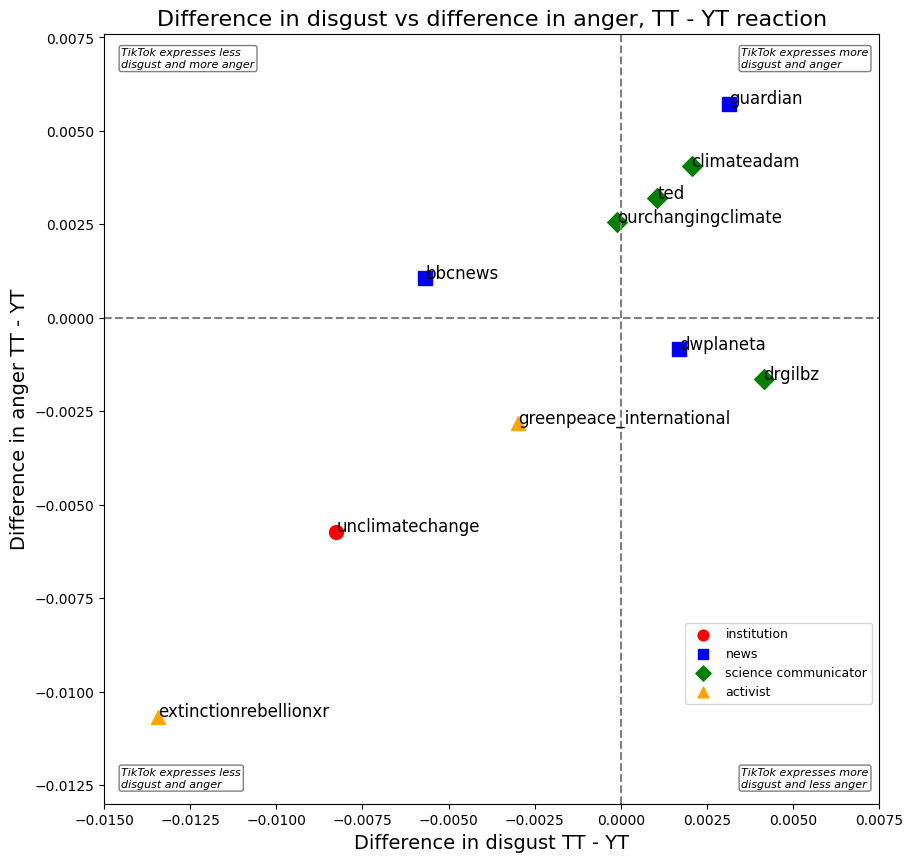

In [66]:
# scatterplot with difference in I_we vs difference in avg_emotion, given dict_differences
list_creators = ["unclimatechange", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]
list_markers = ["o", "s", "D", "^"]

index_metric_x = 1
index_metric_y = 0
metric_y = list_differences_metric[index_metric_y]
metric_x = list_differences_metric[index_metric_x]

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(list_creators)):
    creator = list_creators[i]
    type = dict_type_creator[creator]
    color = list_colors[list_types.index(type)]
    marker = list_markers[list_types.index(type)]
    ax.scatter(dict_differences_comments[creator][index_metric_x], dict_differences_comments[creator][index_metric_y], color=color, marker=marker, s=100)
    ax.annotate(creator, (dict_differences_comments[creator][index_metric_x], dict_differences_comments[creator][index_metric_y]), fontsize=12)

# add hline and vline at 0
ax.axhline(y=0, color="grey", linestyle="--")
ax.axvline(x=0, color="grey", linestyle="--")

ax.set_xlabel("Difference in "+metric_x+" TT - YT", fontsize=14)
ax.set_ylabel("Difference in "+metric_y+" TT - YT", fontsize=14)
ax.set_title("Difference in "+metric_x+" vs difference in "+metric_y+", TT - YT reaction", fontsize=16)
ax.grid(False)

# set xlim and ylim
ax.set_xlim(-0.015, 0.0075)
ax.set_ylim(-0.013, 0.0076)

# annotate quadrants in italic, in a box
ax.annotate("TikTok expresses more\ndisgust and less anger", (0.0035, -0.01255), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok expresses more\ndisgust and anger", (0.0035, 0.0067), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok expresses less\ndisgust and more anger", (-0.0145, 0.0067), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok expresses less\ndisgust and anger", (-0.0145, -0.01255), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))

# add symbols legend
ax.scatter([], [], color="red", marker="o", s=60, label="institution")
ax.scatter([], [], color="blue", marker="s", s=60, label="news")
ax.scatter([], [], color="green", marker="D", s=60, label="science communicator")
ax.scatter([], [], color="orange", marker="^", s=60, label="activist")

ax.legend(loc=(0.75, 0.13), fontsize=9)

plt.show()


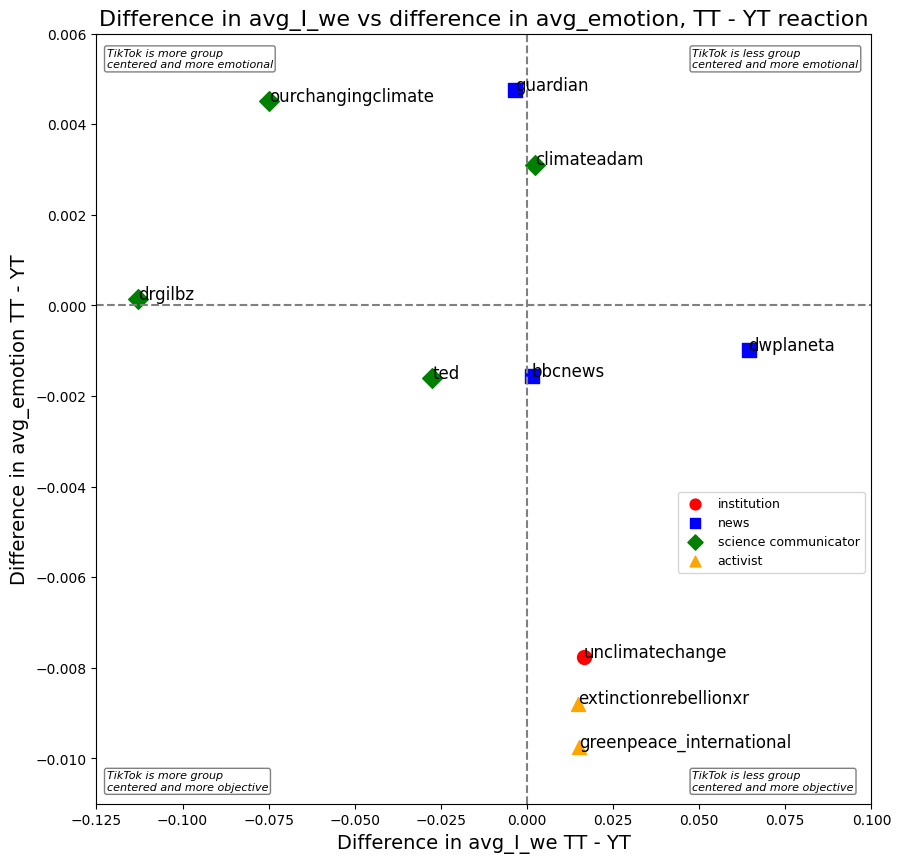

In [67]:
# scatterplot with difference in I_we vs difference in avg_emotion, given dict_differences
list_creators = ["unclimatechange", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]
list_markers = ["o", "s", "D", "^"]

index_metric_x = 9
index_metric_y = 6
metric_y = list_differences_metric[index_metric_y]
metric_x = list_differences_metric[index_metric_x]

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(list_creators)):
    creator = list_creators[i]
    type = dict_type_creator[creator]
    color = list_colors[list_types.index(type)]
    marker = list_markers[list_types.index(type)]
    ax.scatter(dict_differences_comments[creator][index_metric_x], dict_differences_comments[creator][index_metric_y], color=color, marker=marker, s=100)
    ax.annotate(creator, (dict_differences_comments[creator][index_metric_x], dict_differences_comments[creator][index_metric_y]), fontsize=12)

# add hline and vline at 0
ax.axhline(y=0, color="grey", linestyle="--")
ax.axvline(x=0, color="grey", linestyle="--")

ax.set_xlabel("Difference in "+metric_x+" TT - YT", fontsize=14)
ax.set_ylabel("Difference in "+metric_y+" TT - YT", fontsize=14)
ax.set_title("Difference in "+metric_x+" vs difference in "+metric_y+", TT - YT reaction", fontsize=16)
ax.grid(False)

# set xlim and ylim
ax.set_xlim(-0.125, 0.1)
ax.set_ylim(-0.011, 0.006)

# annotate quadrants in italic, in a box
ax.annotate("TikTok is less group\ncentered and more objective", (0.048, -0.0107), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok is less group\ncentered and more emotional", (0.048, 0.00525), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok is more group\ncentered and more emotional", (-0.122, 0.00525), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))
ax.annotate("TikTok is more group\ncentered and more objective", (-0.122, -0.0107), fontsize=8, fontstyle="italic", bbox=dict(boxstyle="round", fc="w", ec="grey", pad=0.2))

# add symbols legend
ax.scatter([], [], color="red", marker="o", s=60, label="institution")
ax.scatter([], [], color="blue", marker="s", s=60, label="news")
ax.scatter([], [], color="green", marker="D", s=60, label="science communicator")
ax.scatter([], [], color="orange", marker="^", s=60, label="activist")

# manually set position
ax.legend(loc=(0.75, 0.3), fontsize=9)

plt.show()


In [68]:
dict_differences_comments

{'unclimatechange': [-0.005726881755721136,
  -0.008259415441675305,
  -0.00591905923967009,
  -0.01695952712280214,
  -0.0030712385803627947,
  -0.006633583950669984,
  -0.007761617681816909,
  -0.0060358690174852694,
  -0.014240329645450904,
  0.01641554680374413,
  0.03592330473462091],
 'nbcnews': [0.001085261972223063,
  -0.0038279349996209484,
  0.0008101208782226744,
  -8.254402087546839e-05,
  -0.002160821115333377,
  -0.0016409878938051705,
  -0.0009694841965315389,
  -0.007115902561340096,
  -0.0025749327266793715,
  0.00565374062147217,
  0.012952473434471756],
 'bbcnews': [0.0010634445553169402,
  -0.00567933449549678,
  -0.0026282706249591854,
  -0.003129595635308395,
  -0.0014523373816148419,
  0.002432354731656065,
  -0.001565623141734366,
  -0.008604090286134427,
  -0.007104545067524247,
  0.0013809507454403125,
  0.05203235698029296],
 'climateadam': [0.004056185087762448,
  0.002055009969958002,
  0.0010495222614294048,
  0.006839434777989441,
  0.002973081384245767,


In [71]:
# for each creator, compute the difference in avg_emotion between content and reaction
list_creators = ["unclimatechange", "nbcnews", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]
print("Creator \t Metric \t Metric content \t Metric reaction")
for i in range(len(list_differences_metric)):
    metric = list_differences_metric[i]
    for creator in list_creators:
        diff = dict_differences_content[creator][i] - dict_differences_comments[creator][i]
        print(creator, "\t", metric, "\t", dict_differences_content[creator][i], "\t", dict_differences_comments[creator][i])
    print("\n")


Creator 	 Metric 	 Metric content 	 Metric reaction
unclimatechange 	 anger 	 0.009260489661888697 	 -0.005726881755721136
nbcnews 	 anger 	 0.009395560259624534 	 0.001085261972223063
bbcnews 	 anger 	 0.007193775097659056 	 0.0010634445553169402
climateadam 	 anger 	 0.008460490454348976 	 0.004056185087762448
drgilbz 	 anger 	 0.006148485453324741 	 -0.001642339145449841
dwplaneta 	 anger 	 0.006271131278384168 	 -0.0008426372459810882
extinctionrebellionxr 	 anger 	 0.0074676325971832465 	 -0.010674755585011476
greenpeace_international 	 anger 	 0.005598475731963736 	 -0.002811401463677309
guardian 	 anger 	 0.0035713306001674897 	 0.005724659743741213
ourchangingclimate 	 anger 	 -0.005632439793509287 	 0.002552422801284656
ted 	 anger 	 0.0010877603698298878 	 0.0031990893669119023


unclimatechange 	 disgust 	 -0.00012869039637796137 	 -0.008259415441675305
nbcnews 	 disgust 	 0.004804728149398281 	 -0.0038279349996209484
bbcnews 	 disgust 	 0.0003191322991718186 	 -0.0056793344

Maybe with the average we lose some nuances: what about comparing each video and its own comments?

In [ ]:
dict_differences_content = {}   # key: creator, value: list of differences
# ignore warnings
warnings.filterwarnings("ignore")
for creator in list_creators:

    print("Creator: ", creator)
    
    # open tt and yt withemo files
    with open(tt_datadir+"all_keywords_"+creator+"_withemo_2021-2023.pkl", "rb") as f:
        tt_withemo = pickle.load(f)

    with open(yt_datadir+creator+"_transcript_withemo_2021-2023.pkl", "rb") as f:
        yt_withemo = pickle.load(f) 

    #replace "" with 0
    tt_withemo = tt_withemo.replace("", 0)
    yt_withemo = yt_withemo.replace("", 0)

    # compute average value of all emotions and assign to new column
    tt_withemo["avg_emotion"] = tt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)
    yt_withemo["avg_emotion"] = yt_withemo[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].mean(axis=1)

    diff_anger = tt_withemo["anger"].mean() - yt_withemo["anger"].mean()
    diff_disgust = tt_withemo["disgust"].mean() - yt_withemo["disgust"].mean()
    diff_fear = tt_withemo["fear"].mean() - yt_withemo["fear"].mean()
    diff_joy = tt_withemo["joy"].mean() - yt_withemo["joy"].mean()
    diff_sadness = tt_withemo["sadness"].mean() - yt_withemo["sadness"].mean()
    diff_surprise = tt_withemo["surprise"].mean() - yt_withemo["surprise"].mean()
    diff_avg_emotion = tt_withemo["avg_emotion"].mean() - yt_withemo["avg_emotion"].mean()
    diff_negative = tt_withemo["negative"].mean() - yt_withemo["negative"].mean()
    diff_positive = tt_withemo["positive"].mean() - yt_withemo["positive"].mean()

    diff_avg_I_we = tt_withemo["I_we"].mean() - yt_withemo["I_we"].mean()
    diff_avg_I_other = tt_withemo["I_other"].mean() - yt_withemo["I_other"].mean()

    dict_differences_content[creator] = [diff_anger, diff_disgust, diff_fear, diff_joy, diff_sadness, diff_surprise, diff_avg_emotion, diff_negative, diff_positive, diff_avg_I_we, diff_avg_I_other]

    # format in table
    print("Emotion \t TikTok \t YouTube \t Difference")
    print("anger \t\t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["anger"].mean(), yt_withemo["anger"].mean(), diff_anger))
    print("disgust \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["disgust"].mean(), yt_withemo["disgust"].mean(), diff_disgust))
    print("fear \t\t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["fear"].mean(), yt_withemo["fear"].mean(), diff_fear))
    print("joy \t\t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["joy"].mean(), yt_withemo["joy"].mean(), diff_joy))
    print("sadness \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["sadness"].mean(), yt_withemo["sadness"].mean(), diff_sadness))
    print("surprise \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["surprise"].mean(), yt_withemo["surprise"].mean(), diff_surprise))
    print("avg_emotion \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["avg_emotion"].mean(), yt_withemo["avg_emotion"].mean(), diff_avg_emotion))
    print("negative \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["negative"].mean(), yt_withemo["negative"].mean(), diff_negative))
    print("positive \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["positive"].mean(), yt_withemo["positive"].mean(), diff_positive))
    print("avg_I_we \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["I_we"].mean(), yt_withemo["I_we"].mean(), diff_avg_I_we))
    print("avg_I_other \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(tt_withemo["I_other"].mean(), yt_withemo["I_other"].mean(), diff_avg_I_other))
    print("\n")


    # correlation between anger and disgust
    print("Correlation between anger and disgust")
    print("TikTok: ", tt_withemo["anger"].corr(tt_withemo["disgust"]))
    print("YouTube: ", yt_withemo["anger"].corr(yt_withemo["disgust"]))
    print("\n")





## Content vs. comments

In [94]:
tt_datadir = "./tiktok-opinion-dynamics/src/tiktok_opinion_dynamics/data/search/creators/"
yt_datadir = "./youtube/data/"

In [95]:
list_creators = ["unclimatechange", "nbcnews", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]

In [116]:
list_videos_comments = []
for creator in list_creators:

    # open tt file
    with open(tt_datadir+"videos_comments_"+creator+"_withemo_2021-2023.pkl", "rb") as f:
        tt_withemo = pickle.load(f)
    
    # open yt file
    with open(yt_datadir+creator+"_videos_comments_withemo_2021-2023.pkl", "rb") as f:
        yt_withemo = pickle.load(f)

    print("Creator: ", creator)

    # iterate over emotions
    for emotion in ["anger", "disgust", "fear", "joy", "sadness", "surprise", "positive", "negative", "I_we", "I_other"]:

        for i in range(len(tt_withemo)):
            list_videos_comments.append([creator, emotion, "TT", tt_withemo.iloc[i][emotion], tt_withemo.iloc[i][emotion+"_comments"]])

        for j in range(len(yt_withemo)):
            list_videos_comments.append([creator, emotion, "YT", yt_withemo.iloc[j][emotion], yt_withemo.iloc[j][emotion+"_comments"]])

# dataframe
df_videos_comments = pd.DataFrame(list_videos_comments, columns=["creator", "emotion", "platform", "content", "avg_reaction"])

df_videos_comments

Creator:  unclimatechange
Creator:  bbcnews
Creator:  climateadam
Creator:  drgilbz
Creator:  dwplaneta
Creator:  extinctionrebellionxr
Creator:  greenpeace_international
Creator:  guardian
Creator:  ourchangingclimate
Creator:  ted


creator  emotion platform   content  avg_reaction
0      unclimatechange    anger       TT  0.000000      0.010989
1      unclimatechange    anger       TT  0.000000      0.006993
2      unclimatechange    anger       TT  0.000000      0.005546
3      unclimatechange    anger       TT  0.000000      0.000000
4      unclimatechange    anger       TT  0.000000      0.000000
...                ...      ...      ...       ...           ...
25675              ted  I_other       YT  0.096154      0.500000
25676              ted  I_other       YT  0.283333      0.055556
25677              ted  I_other       YT  0.074713      0.500000
25678              ted  I_other       YT  0.219101      0.500000
25679              ted  I_other       YT  0.098837      0.100000

[25680 rows x 5 columns]

In [120]:
# compute correlation between content and reaction, for each creator and emotion
list_creators = ["unclimatechange", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]
list_emotions = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "positive", "negative", "I_we", "I_other"]

# create dataframe with correlations for each creator and emotion
list_correlations = []
for creator in list_creators:
    for emotion in list_emotions:
        df_creator = df_videos_comments[(df_videos_comments["creator"]==creator) & (df_videos_comments["emotion"]==emotion)]
        corr_tt = df_creator[df_creator["platform"]=="TT"]["content"].corr(df_creator[df_creator["platform"]=="TT"]["avg_reaction"])
        corr_yt = df_creator[df_creator["platform"]=="YT"]["content"].corr(df_creator[df_creator["platform"]=="YT"]["avg_reaction"])
        list_correlations.append([creator, emotion, corr_tt, corr_yt])

df_correlations = pd.DataFrame(list_correlations, columns=["creator", "emotion", "correlation_tt", "correlation_yt"])

df_correlations

creator   emotion  correlation_tt  correlation_yt
0   unclimatechange     anger        0.119914        0.054828
1   unclimatechange   disgust       -0.035273       -0.012879
2   unclimatechange      fear        0.003821        0.074354
3   unclimatechange       joy        0.153541        0.074711
4   unclimatechange   sadness        0.200962        0.193809
..              ...       ...             ...             ...
95              ted  surprise       -0.146960        0.028723
96              ted  positive        0.126450        0.023014
97              ted  negative        0.063611        0.064315
98              ted      I_we        0.278049        0.040632
99              ted   I_other        0.216775        0.038523

[100 rows x 4 columns]

In [121]:
# save correlations dataframe to csv
df_correlations.to_csv("correlations_content_reaction.csv", index=False)

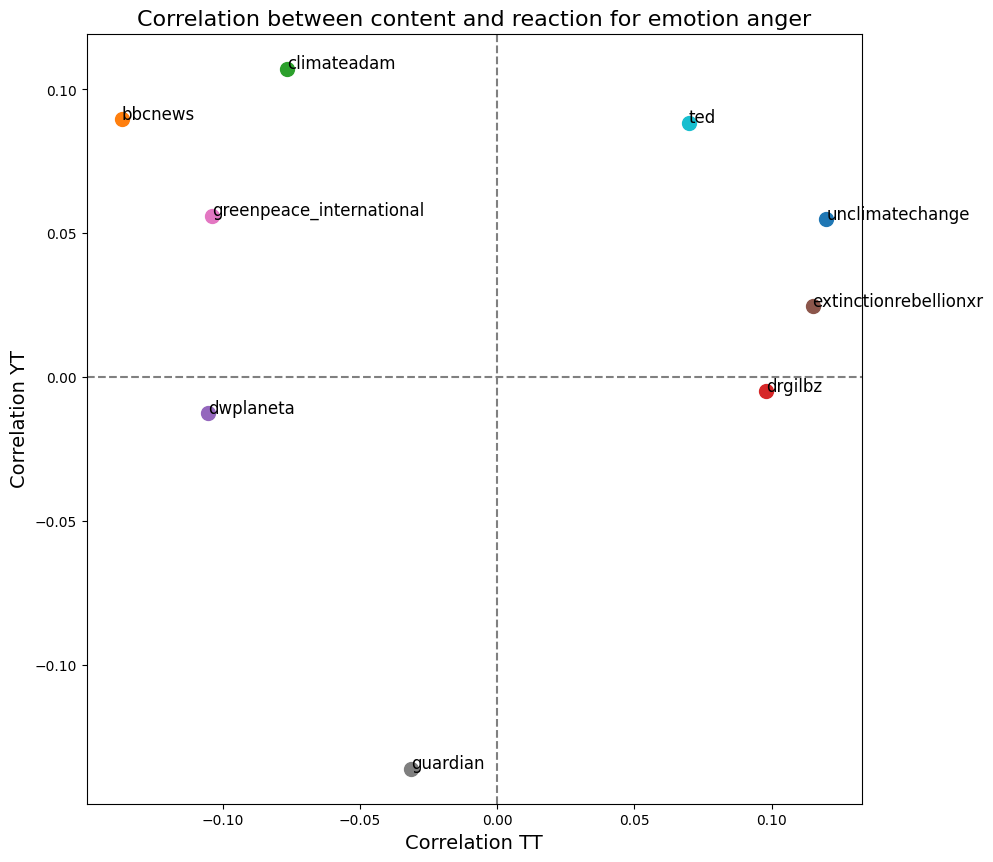

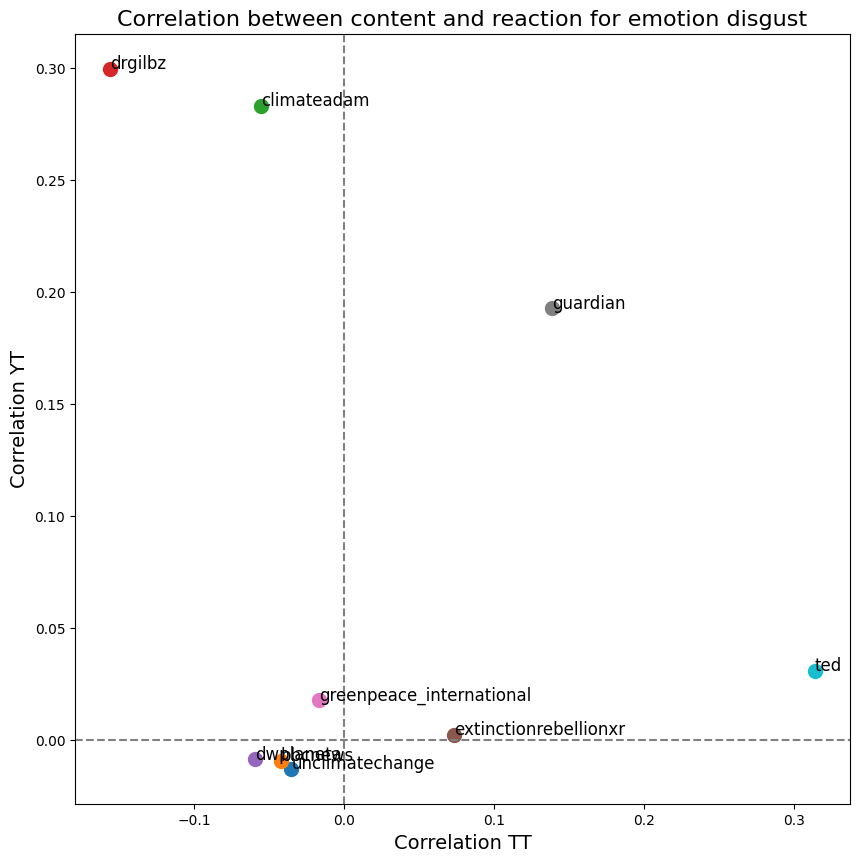

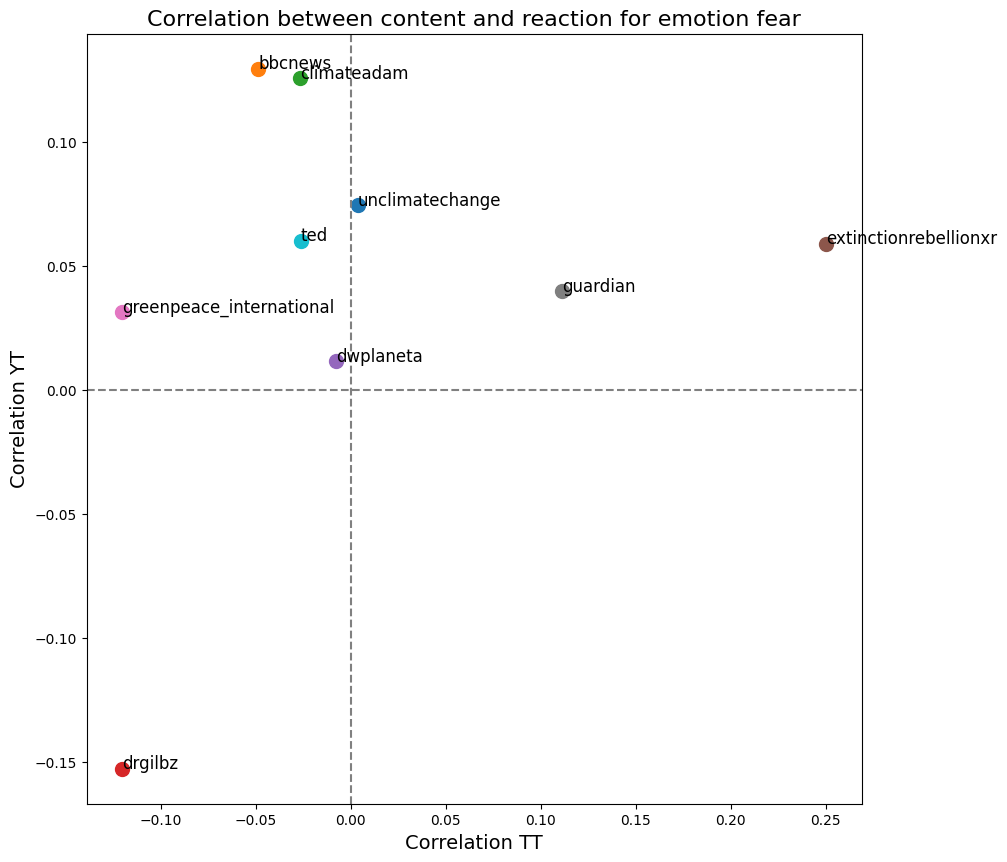

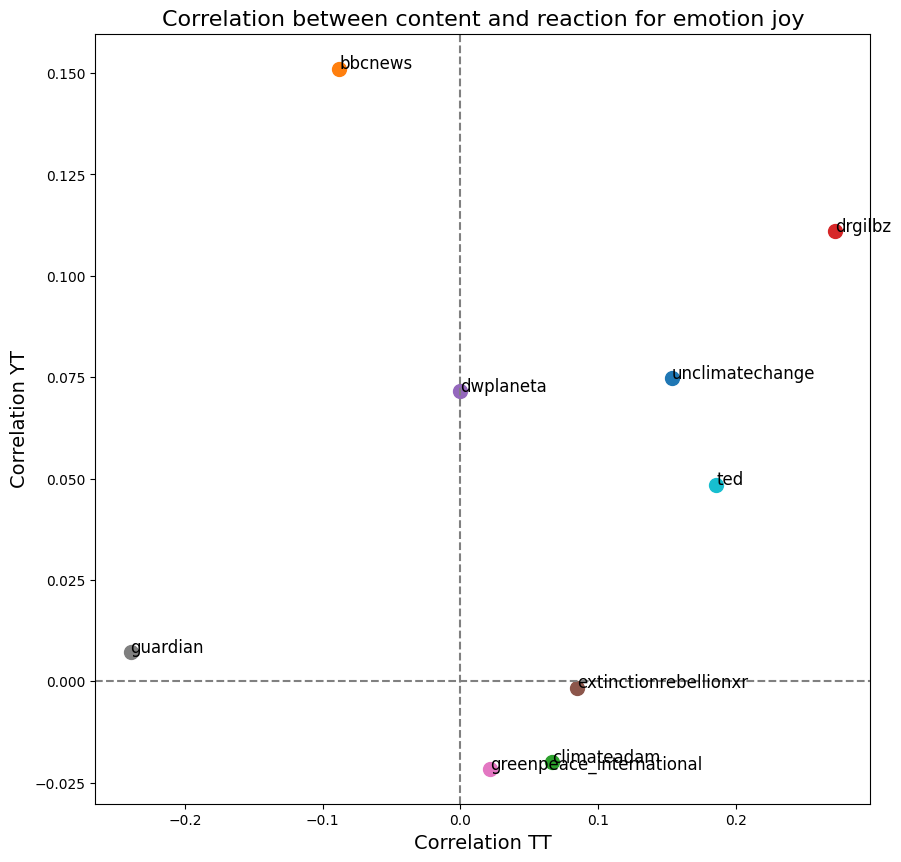

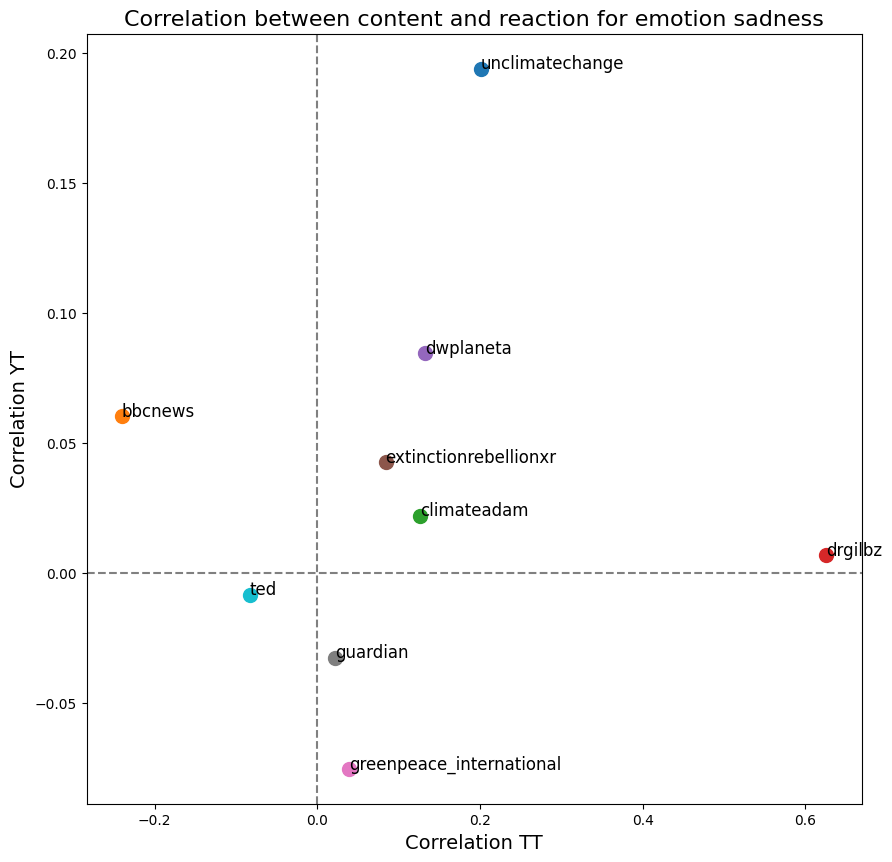

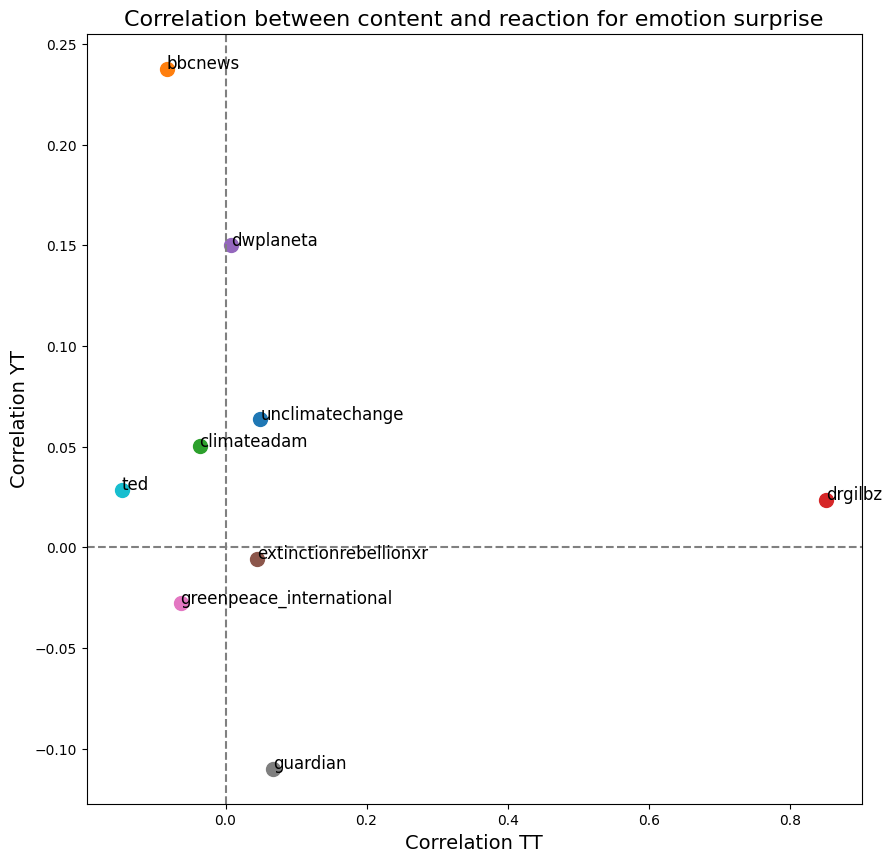

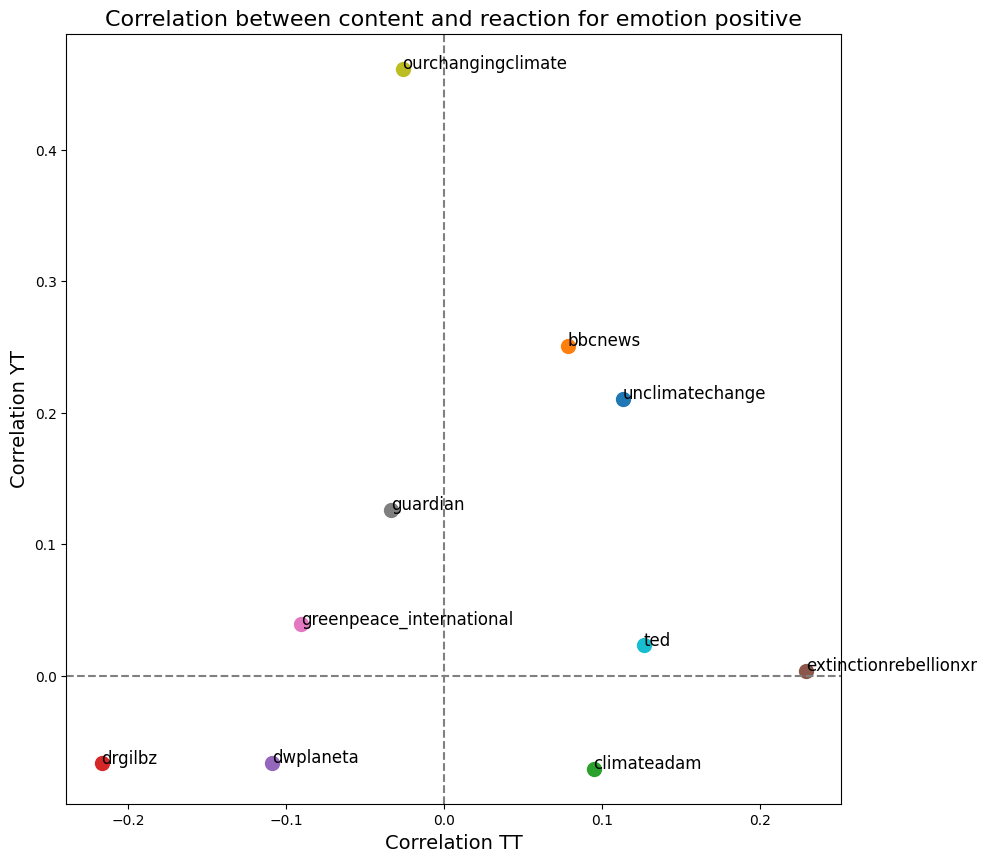

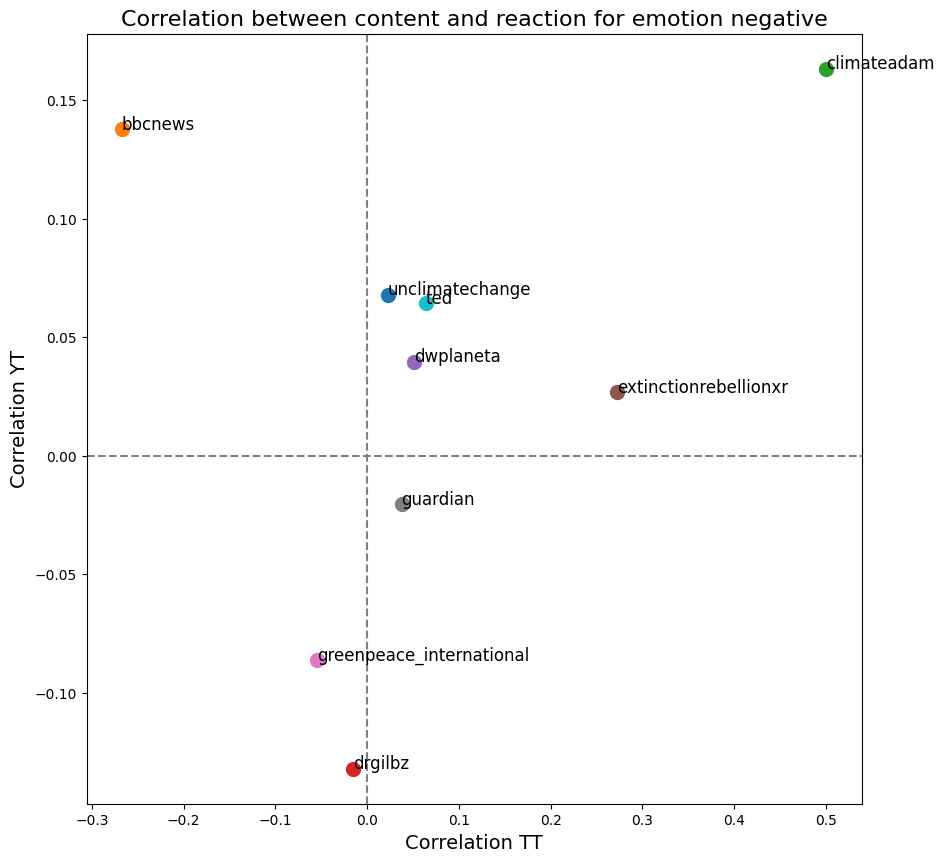

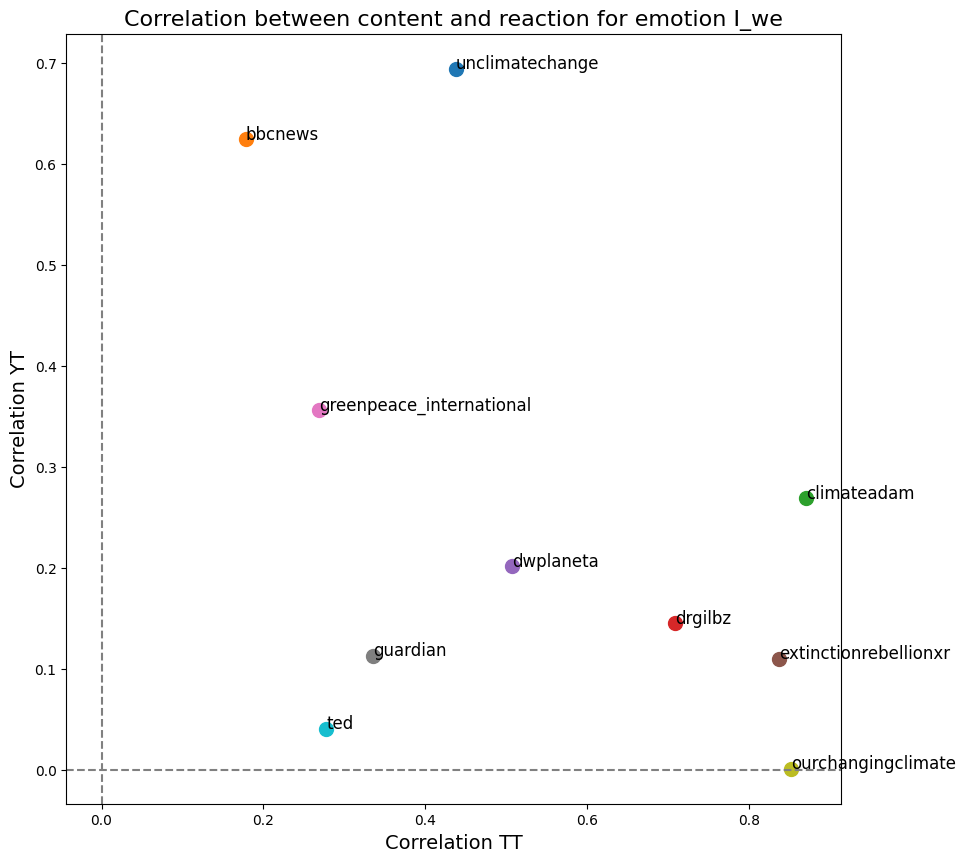

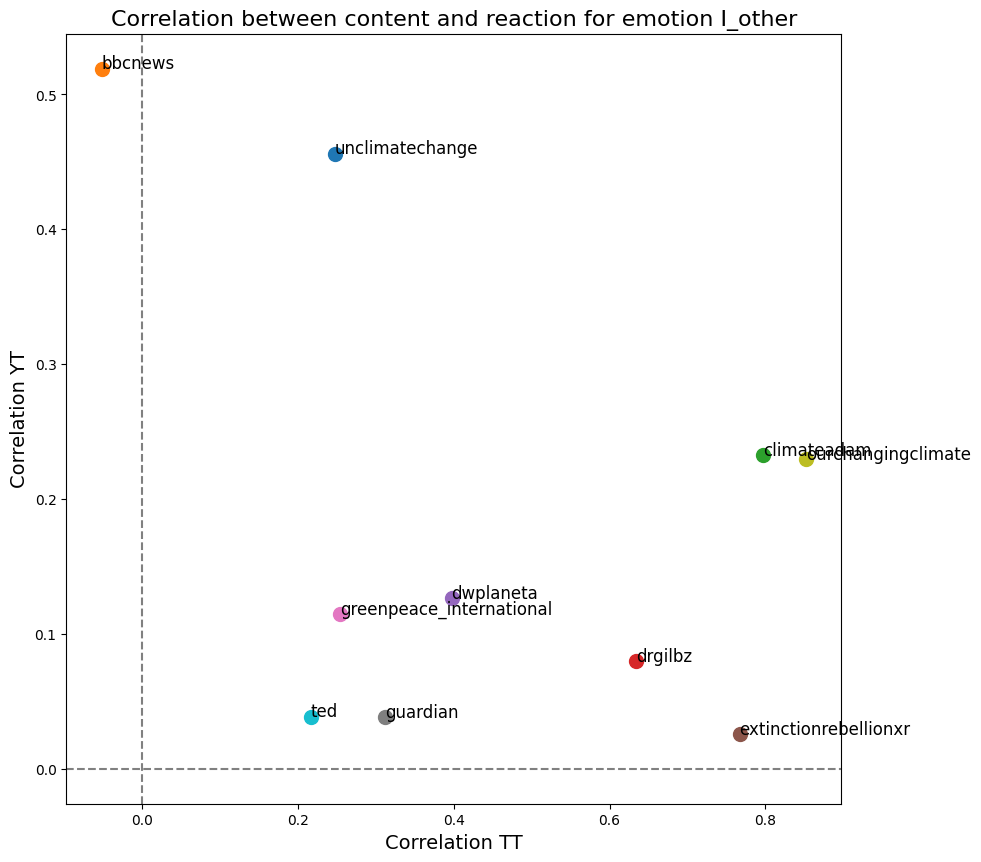

In [128]:
# plot dataframe in a useful way, to show the correlation between content and reaction for each creator and emotion taking into account the platform
list_creators = ["unclimatechange", "bbcnews", "climateadam", "drgilbz", "dwplaneta", "extinctionrebellionxr", "greenpeace_international", "guardian", "ourchangingclimate", "ted"]
list_emotions = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "positive", "negative", "I_we", "I_other"]

# plot
# iterate over emotions
for j in range(len(list_emotions)):
    fig, ax = plt.subplots(figsize=(10, 10))
    emotion = list_emotions[j]

    for i in range(len(list_creators)):
        creator = list_creators[i]
        df_creator = df_correlations[df_correlations["creator"]==creator]
        # plot correlation for TT vs YT for the given creator and emotion
        ax.scatter(df_creator[df_creator["emotion"]==emotion]["correlation_tt"], df_creator[df_creator["emotion"]==emotion]["correlation_yt"], marker="o", s=100)
        ax.annotate(creator, (df_creator[df_creator["emotion"]==emotion]["correlation_tt"], df_creator[df_creator["emotion"]==emotion]["correlation_yt"]), fontsize=12)

    # add hline and vline at 0
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    ax.set_xlabel("Correlation TT", fontsize=14)
    ax.set_ylabel("Correlation YT", fontsize=14)
    ax.set_title("Correlation between content and reaction for emotion "+emotion, fontsize=16)
    ax.grid(False)

    plt.show()
